## Data Loading
In this section, we load the diabetes dataset and display its structure. This step is essential to understand the available features and prepare for further analysis.

# Predicting Chronic Incidence in Diabetes Patients
This notebook aims to predict whether a patient is at risk of developing chronic complications due to diabetes. We will analyze the provided dataset, extract meaningful insights, and build predictive models to support clinical decision-making.

## Project Objective
- Understand the structure and features of the dataset.
- Prepare and clean the data for analysis.
- Build and evaluate predictive models for chronic complications.
- Summarize findings and highlight key factors influencing risk.

---
## 1. Data Loading
Load the dataset and display its structure.

---
## 2. Data Cleaning
Handle missing values, inconsistencies, and prepare the data for analysis.

---
## 3. Data Exploration
Visualize and analyze the distribution of key features and relationships.

---
## 4. Modeling
Build and evaluate machine learning models to predict chronic complications.

---
## 5. Conclusions
Summarize insights and discuss the most relevant factors for prediction.

# Predicting Chronic Complications in Diabetes Patients
## Value-Based Healthcare Analysis Case Study

**Author:** Sherif Rizk  
**Date:** August 2025  
**Objective:** Predict whether a patient is at risk of developing chronic complications

---

## Project Overview

This comprehensive analysis focuses on predicting chronic complications in diabetes patients using machine learning techniques. The project follows a systematic approach to understand, clean, prepare, and model the data to provide actionable insights for healthcare practitioners.

### Key Objectives:
1. **Understand the Data**: Familiarize with dataset structure and column meanings
2. **Prepare the Data**: Handle inconsistencies and ensure data validity for modeling
3. **Build Predictive Model**: Develop and evaluate machine learning models
4. **Draw Conclusions**: Summarize findings and identify key factors for chronic complications

### Deliverables:
- ✅ Well-documented Jupyter Notebook with clear comments
- ✅ Comprehensive data analysis and model evaluation
- ✅ CSV file with predictions for new patients
- ✅ Clinical insights and recommendations

## 1. Import Required Libraries and Setup

Setting up the environment with necessary libraries for data analysis, machine learning, and visualization.

In [29]:
# Core libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import warnings
import os
from datetime import datetime

# Machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, 
    roc_curve, precision_recall_curve
)

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Create results directory
os.makedirs('results', exist_ok=True)

print("✅ All libraries imported successfully!")
print("📁 Results directory created/verified!")
print("🎨 Visualization settings configured!")

✅ All libraries imported successfully!
📁 Results directory created/verified!
🎨 Visualization settings configured!


## 2. Load and Explore the Dataset

Loading the diabetes complications dataset and performing initial exploration to understand its structure and basic characteristics.

In [30]:
# Load the diabetes complications dataset
data_file_path = 'data/Data_DM.xlsx'

try:
    # Load training data from the 'Data_Set' sheet
    df = pd.read_excel(data_file_path, sheet_name='Data_Set')
    print("✅ Training dataset loaded successfully!")
    print(f"📊 Dataset shape: {df.shape}")  # Show number of rows and columns
    print(f"👥 Total patients: {len(df)}")  # Show total number of patients
    print(f"🔢 Total features: {len(df.columns)}")  # Show total number of features
    
    # Load prediction data from the 'Predict' sheet
    df_predict = pd.read_excel(data_file_path, sheet_name='Predict')
    print(f"\n✅ Prediction dataset loaded successfully!")
    print(f"📊 Prediction dataset shape: {df_predict.shape}")  # Show shape of prediction data
    print(f"👥 Patients to predict: {len(df_predict)}")  # Show number of patients to predict
    
except FileNotFoundError:
    # Handle missing file error
    print("❌ Error: Data file not found. Please ensure 'data/Data_DM.xlsx' exists.")
except Exception as e:
    # Handle any other error during loading
    print(f"❌ Error loading data: {e}")

# Display basic information about the dataset
print("\n" + "="*60)
print("DATASET OVERVIEW")
print("="*60)

print(f"\n📈 Dataset Info:")
print(df.info())

print(f"\n📊 Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\n🎯 Target Variable Distribution:")
if 'Chronic_flag' in df.columns:
    # Show distribution of target variable (chronic complications)
    target_counts = df['Chronic_flag'].value_counts()
    print(f"No complications (0): {target_counts[0]} ({target_counts[0]/len(df)*100:.1f}%)")
    print(f"Complications (1): {target_counts[1]} ({target_counts[1]/len(df)*100:.1f}%)")
else:
    print("Target variable 'Chronic_flag' not found!")

❌ Error loading data: [Errno 13] Permission denied: 'data/Data_DM.xlsx'

DATASET OVERVIEW

📈 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12611 entries, 0 to 12610
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Unique_Identifier          12611 non-null  object        
 1   Gender                     12611 non-null  object        
 2   Religion                   12611 non-null  object        
 3   Nationality                12611 non-null  object        
 4   Avg_HBA1C Results          12611 non-null  object        
 5   HBA1C test Compliance      12611 non-null  object        
 6   D_Of_Birth                 12611 non-null  datetime64[ns]
 7   Diagnosis_Type             12611 non-null  object        
 8   Chronic_flag               12611 non-null  int64         
 9   Acute_flag                 12611 non-null  int64         
 10  ER_flag_bef_chronic    

## 3. Data Understanding and Initial Analysis

Analyzing the structure, data types, missing values, and understanding the meaning of each feature in our diabetes complications dataset.

In [31]:
# Detailed data understanding and analysis
print("="*80)
print("DETAILED DATA ANALYSIS")
print("="*80)

# 1. Data Types Analysis
print("\n🔍 Data Types Analysis:")
print("-" * 40)

data_types = df.dtypes.value_counts()
for dtype, count in data_types.items():
    print(f"{dtype}: {count} columns")


# 2. Missing Values Analysis
print("\n🚨 Missing Values Analysis:")
print("-" * 40)
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percent.values
}).sort_values('Missing_Count', ascending=False)

print(missing_df[missing_df['Missing_Count'] > 0])

if missing_df['Missing_Count'].sum() == 0:
    print("✅ No missing values found in the dataset!")
else:
    print(f"⚠️ Total missing values: {missing_df['Missing_Count'].sum()}")

# 3. Categorical Variables Analysis
print("\n📊 Categorical Variables Analysis:")
print("-" * 40)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    value_counts = df[col].value_counts()
    print(f"  Unique values: {df[col].nunique()}")
    print(f"  Top 5 values: {value_counts.head().to_dict()}")

# 4. Numerical Variables Analysis
print("\n🔢 Numerical Variables Analysis:")
print("-" * 40)
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {len(numerical_cols)}")
print("Basic statistics:")
print(df[numerical_cols].describe().round(2))

# 5. Feature Categories
print("\n🏷️ Feature Categories:")
print("-" * 40)
feature_categories = {
    'Demographics': ['Unique_Identifier', 'Gender', 'Religion', 'Nationality', 'D_Of_Birth'],
    'Medical_History': ['Diagnosis_Type', 'Acute_flag', 'ER_flag_bef_chronic', '# ER_befor_Chr', 
                       'IP_flag_bef_chr', '# IP_bef_chr', '# OP_Bef_chr'],
    'HBA1C_Related': ['Avg_HBA1C Results', 'HBA1C test Compliance'],
    'Comorbidities': ['Comorbidity', 'Atrial Fibrilation', 'Cancer', 'Cardio Vascular Disease', 
                     'Perepheral Artery Disease', 'Renal Insufficiency', 'Heart Failure', 
                     'Hypertension', 'Ischemic Heart Disease', 'Myocardial Infarction', 
                     'Obesity', 'Stroke'],
    'Target': ['Chronic_flag']
}

for category, features in feature_categories.items():
    available_features = [f for f in features if f in df.columns]
    print(f"{category}: {len(available_features)} features")
    print(f"  {available_features}")

print(f"\n✅ Data understanding completed!")
print(f"📝 Ready for data cleaning and preprocessing!")

DETAILED DATA ANALYSIS

🔍 Data Types Analysis:
----------------------------------------
int64: 19 columns
object: 7 columns
datetime64[ns]: 1 columns

🚨 Missing Values Analysis:
----------------------------------------
Empty DataFrame
Columns: [Column, Missing_Count, Missing_Percentage]
Index: []
✅ No missing values found in the dataset!

📊 Categorical Variables Analysis:
----------------------------------------

Unique_Identifier:
  Unique values: 12611
  Top 5 values: {'SGH11015': 1, 'SGH11016': 1, 'SGH11017': 1, 'SGH11018': 1, 'SGH11019': 1}

Gender:
  Unique values: 2
  Top 5 values: {'Male': 6802, 'Female': 5809}

Religion:
  Unique values: 22
  Top 5 values: {'Islam': 8115, 'OTHER': 2185, 'ISLAM': 1100, 'JEWISH': 668, 'Unknown': 337}

Nationality:
  Unique values: 170
  Top 5 values: {'Saudi': 7110, 'SAUDI': 1796, 'Egyptian': 669, 'EGYPTIAN': 506, 'Pakistani': 181}

Avg_HBA1C Results:
  Unique values: 4872
  Top 5 values: {"Haven't performed Before": 3411, 5.2: 155, 5.3: 148, 5.4

## 4. Data Cleaning and Preprocessing

Cleaning categorical variables, handling inconsistencies, and preparing the data for analysis. This step ensures data quality and consistency across all features.

In [34]:
# print("Unique nationalities:")
# print(df['Nationality'].unique())  # Check unique nationalities
# print(f"\nNumber of unique nationalities: {df['Nationality'].nunique()}")
# print(f"Nationality value counts:")
# print(df['Nationality'].value_counts())

# Save unique nationalities to csv file
unique_nationalities = df['Nationality'].unique()
unique_nationalities_df = pd.DataFrame(unique_nationalities, columns=['Nationality'])
# unique_nationalities_df.to_csv('results/unique_nationalities.csv', index=False)

In [33]:
# Data Cleaning and Preprocessing
print("="*80)
print("DATA CLEANING AND PREPROCESSING")
print("="*80)

# Create a copy of the original data
df_clean = df.copy()
print(f"📋 Working with a copy of the original data: {df_clean.shape}")

# 1. Clean Categorical Variables
print("\n🧹 1. Cleaning Categorical Variables:")
print("-" * 50)

# 1.1 Clean Religion column
print("Cleaning Religion column...")
original_religion = df_clean['Religion'].value_counts()
print(f"Original Religion values: {original_religion.to_dict()}")

df_clean['Religion'] = df_clean['Religion'].str.strip()
df_clean['Religion'] = df_clean['Religion'].replace({
    # Islamic variants
    'ISLAM': 'Islam',
    'MUSLIM': 'Islam',
    
    # Christian variants
    'CHRISTIAN': 'Christian',
    'Catholic': 'Christian',
    'Methodist': 'Christian', 
    'Orthodox': 'Christian',
    'Greek Orthodox': 'Christian',
    'Uniting Church': 'Christian',
    'United Church of Christ in Phi': 'Christian',  # Truncated: "Philippines"
    # Other Christian denominations Jehovas Witness
    'Jehovas Witness': 'Christian',

    # Other major religions
    'HINDU': 'Hindu',
    'BUDDHIST': 'Buddhist',
    'JEWISH': 'Jewish',
    
    
    # Unknown/Not specified categories
    'Unknown': 'Unknown/Not Specified',
    'Unknown/Not Known': 'Unknown/Not Specified',
    'Not Specified': 'Unknown/Not Specified',
    'No Religion': 'No Religion',
    
    # Other categories
    'OTHER': 'Other',
    'Others': 'Other'
})

cleaned_religion = df_clean['Religion'].value_counts()
print(f"Cleaned Religion values: {cleaned_religion.to_dict()}")

# 1.2 Clean Nationality column
print("\nCleaning Nationality column...")
original_nationality = df_clean['Nationality'].value_counts()
print(f"Original Nationality values: {original_nationality.to_dict()}")

df_clean['Nationality'] = df_clean['Nationality'].str.strip()
df_clean['Nationality'] = df_clean['Nationality'].replace({
    # Afghan/Afghanistan variants
    'Afghan': 'Afghan',
    'AFGHAN': 'Afghan',
    'AFGHANISTAN': 'Afghan',
    
    # African (general/unspecified)
    'AFRICAN': 'African',
    'African': 'African',
    
    # Albanian variants
    'ALBANIAN': 'Albanian',
    'Albanian': 'Albanian',
    
    # Algerian variants
    'Algeria': 'Algerian',
    'ALGERIAN': 'Algerian',
    'Algerian': 'Algerian',
    
    # American variants
    'AMERICAN': 'American',
    'American': 'American',
    'AMERICAN SAMOA': 'American',
    
    # Australian variants
    'Australia': 'Australian',
    'Australian': 'Australian',
    
    # Austrian variants
    'AUSTRIAN': 'Austrian',
    
    # Azerbaijani variants
    'AZERBAIJANI': 'Azerbaijani',
    
    # Bahamian variants
    'BAHAMIAN': 'Bahamian',
    
    # Bahraini variants
    'BAHRAINI': 'Bahraini',
    
    # Bangladeshi variants
    'Bangladeshi': 'Bangladeshi',
    'BANGLADESHI': 'Bangladeshi',
    'BANGLADISHI': 'Bangladeshi',
    
    # Other single entries
    'Barbadian': 'Barbadian',
    'Belarusian': 'Belarusian',
    'Belgian': 'Belgian',
    
    # Brazilian variants
    'Brazil': 'Brazilian',
    
    # British variants
    'BRITISH': 'British',
    
    # Burmese/Myanmar variants
    'BURMESE': 'Burmese',
    'MYANMAR': 'Burmese',
    
    # Cameroonian variants
    'Cameroonian': 'Cameroonian',
    
    # Canadian variants
    'CANADIAN': 'Canadian',
    'Canadian': 'Canadian',
    
    # Chadian variants
    'Chad': 'Chadian',
    'Chadian': 'Chadian',
    
    # Chinese variants
    'CHINESE': 'Chinese',
    'Chinese': 'Chinese',
    
    # Djiboutian variants
    'DJIBOUTIAN': 'Djiboutian',
    
    # Dutch variants
    'DUTCH': 'Dutch',
    
    # Egyptian variants
    'EGYPTIAN': 'Egyptian',
    'Egyptian': 'Egyptian',
    
    # Emirati variants
    'Emirati': 'Emirati',
    
    # Eritrean variants
    'ERITREAN': 'Eritrean',
    'Eritrean': 'Eritrean',
    'ERYTRIAN': 'Eritrean',  # Spelling error correction
    
    # Ethiopian variants
    'Ethiopia': 'Ethiopian',
    'ETHIOPIA': 'Ethiopian',
    'ETHIOPIAN': 'Ethiopian',
    'Ethiopian': 'Ethiopian',
    
    # Fijian variants
    'FIJIAN': 'Fijian',
    
    # Filipino/Philippine variants
    'Filipino': 'Filipino',
    'FILIPINO': 'Filipino',
    'Philippine': 'Filipino',
    'PHILIPPINES': 'Filipino',
    'PHILLIPINO': 'Filipino',  # Spelling error correction
    
    # Finnish variants
    'FINLAND': 'Finnish',
    'Finnish': 'Finnish',
    
    # French variants
    'FRENCH': 'French',
    'French': 'French',
    
    # Gambian variants
    'GAMBIAN': 'Gambian',
    
    # German variants
    'German': 'German',
    'GERMANY': 'German',
    
    # Ghanaian variants
    'GHANAIAN': 'Ghanaian',
    
    # Greek variants
    'Greec': 'Greek',  # Spelling error correction
    
    # Indian variants
    'INDIAN': 'Indian',
    'Indian': 'Indian',
    'Indionisa': 'Indonesian',  # Likely spelling error for Indonesian
    
    # Indonesian variants
    'INDONESIA': 'Indonesian',
    'Indonesian': 'Indonesian',
    'INDONESIAN': 'Indonesian',
    
    # Iraqi variants
    'Iraqi': 'Iraqi',
    
    # Irish variants
    'IRELAND': 'Irish',
    'Irish': 'Irish',
    
    # Italian variants
    'Italian': 'Italian',
    'Italy': 'Italian',
    
    # Jordanian variants
    'Jordanian': 'Jordanian',
    'JORDANIAN': 'Jordanian',
    'JORDON': 'Jordanian',  # Spelling error correction
    
    # Kenyan variants
    'Kenya': 'Kenyan',
    'KENYA': 'Kenyan',
    'Kenyan': 'Kenyan',
    
    # Kuwaiti variants
    'KUWAIT': 'Kuwaiti',
    'KUWAITI': 'Kuwaiti',
    'Kuwaiti': 'Kuwaiti',
    
    # Sri Lankan variants
    'Lankan': 'Sri Lankan',
    'SRI LANKAN': 'Sri Lankan',
    'Sri Lankan': 'Sri Lankan',
    
    # Lebanese variants
    'Lebanen': 'Lebanese',  # Spelling error correction
    'Lebanese': 'Lebanese',
    'LEBANESE': 'Lebanese',
    'LEBANON (Lebanese)': 'Lebanese',
    
    # Libyan variants
    'Libyan': 'Libyan',
    
    # Malaysian variants
    'MALAYSIA': 'Malaysian',
    'MALAYSIAN': 'Malaysian',
    'Malaysian': 'Malaysian',
    
    # Maldivian variants
    'MALDIVIAN': 'Maldivian',
    
    # Malian variants
    'MALIAN': 'Malian',
    
    # Martinican variants
    'Martinican': 'Martinican',
    
    # Mauritanian variants
    'MAURITANIA': 'Mauritanian',
    'MAURITANIAN': 'Mauritanian',
    
    # Mauritian variants
    'MAURITIAN': 'Mauritian',
    
    # Moroccan variants
    'MOROCCAN': 'Moroccan',
    'Moroccan': 'Moroccan',
    
    # Nepalese variants
    'NEPALESE': 'Nepalese',
    'Nepali': 'Nepalese',
    'NEPALI': 'Nepalese',
    
    # New Zealand variants
    'New Zealand': 'New Zealander',
    
    # Nigerian variants
    'NIGER': 'Nigerian',  # Assuming this refers to Nigerian
    'Nigeria': 'Nigerian',
    'NIGERIAN': 'Nigerian',
    'Nigerian': 'Nigerian',
    
    # North Korean variants
    'North Korean': 'North Korean',
    
    # Omani variants
    'Omani': 'Omani',
    
    # Pakistani variants
    'PAKISTANI': 'Pakistani',
    'Pakistani': 'Pakistani',
    
    # Palestinian variants
    'PALASTINIAN': 'Palestinian',  # Spelling error correction
    'Palestine': 'Palestinian',
    'PALESTINE': 'Palestinian',
    'Palestinian': 'Palestinian',
    'PALESTINIAN': 'Palestinian',
    
    # Palauan variants
    'Palauan': 'Palauan',
    
    # Portuguese variants
    'Portuguese': 'Portuguese',
    
    # Qatari variants
    'Qatari': 'Qatari',
    'QATARI': 'Qatari',
    
    # Romanian variants
    'Romania': 'Romanian',
    
    # Samoan variants
    'Samoan': 'Samoan',
    
    # Saudi variants
    'Saudi': 'Saudi',
    'SAUDI': 'Saudi',
    'SAUDI ARABIA': 'Saudi',
    'SAUDI FOREIGN PASSPORT': 'Saudi',
    
    # Senegalese variants
    'SENEGAL': 'Senegalese',
    'Senegalese': 'Senegalese',
    
    # Sierra Leonean variants
    'SIERRA LEONE': 'Sierra Leonean',
    'Sierra Leonean': 'Sierra Leonean',
    
    # Somali variants
    'Somali': 'Somali',
    'Somalia': 'Somali',
    
    # South African variants
    'SOUTH AFRICAN': 'South African',
    
    # Spanish variants
    'SPANISH': 'Spanish',
    'Spanish': 'Spanish',
    
    # Sudanese variants
    'Sudan': 'Sudanese',
    'SUDAN': 'Sudanese',
    'SUDANESE': 'Sudanese',
    'Sudanese': 'Sudanese',
    'Do Not Use Sudani': 'Sudanese',  # Data entry note
    
    # Surinamese variants
    'Surinamese': 'Surinamese',
    
    # Swedish variants
    'Swedish': 'Swedish',
    'Svalbard and Jan Mayen': 'Norwegian',  # Geographic correction
    
    # Syrian variants
    'SYRIAN': 'Syrian',
    'Syrian': 'Syrian',
    
    # Taiwanese variants
    'TAIWANESE': 'Taiwanese',
    'Taiwanese': 'Taiwanese',
    
    # Tunisian variants
    'TUNISIAN': 'Tunisian',
    
    # Turkish variants
    'Turki': 'Turkish',  # Spelling error correction
    'Turkish': 'Turkish',
    'TURKY': 'Turkish',  # Spelling error correction
    
    # Ugandan variants
    'UGANDAN': 'Ugandan',
    
    # West Indian variants
    'WEST INDIAN': 'West Indian',
    
    # Yemeni variants
    'YEMEN': 'Yemeni',
    'Yemen': 'Yemeni',
    'Yemeni': 'Yemeni',
    'YEMENI': 'Yemeni',
    'NORTH YEMENI': 'Yemeni',
    
    # Zambian variants
    'ZAMBIAN': 'Zambian',
    
    # Niger country (if different from Nigerian)
    'ALNIGER': 'Nigerien',  # People from Niger country are "Nigerien"
    
    # Andorran variants
    'Andorran': 'Andorran',
    
    # Angolan variants
    'ANGOLAN': 'Angolan',
    
    # Arabian (general term)
    'Arabian': 'Arabian',
    
    # Other/Unknown categories
    'OTHER': 'Other',
    'Other': 'Other',
    'Not in use': 'Unknown/Not Specified',
    '-': 'Unknown/Not Specified'
})

cleaned_nationality = df_clean['Nationality'].value_counts()
print(f"Cleaned Nationality values: {cleaned_nationality.to_dict()}")

# 1.3 Clean HBA1C test Compliance
print("\nCleaning HBA1C test Compliance column...")
if 'HBA1C test Compliance' in df_clean.columns:
    original_compliance = df_clean['HBA1C test Compliance'].value_counts()
    print(f"Original HBA1C Compliance values: {original_compliance.to_dict()}")
    
    df_clean['HBA1C test Compliance'] = df_clean['HBA1C test Compliance'].str.strip()
    
    cleaned_compliance = df_clean['HBA1C test Compliance'].value_counts()
    print(f"Cleaned HBA1C Compliance values: {cleaned_compliance.to_dict()}")

# 2. Handle HBA1C Results
print("\n💉 2. Processing HBA1C Results:")
print("-" * 50)

# Check HBA1C results values
print("HBA1C Results analysis:")
hba1c_values = df_clean['Avg_HBA1C Results'].value_counts()
print(f"Unique HBA1C values (top 10): {dict(list(hba1c_values.head(10).items()))}")

# Create numeric HBA1C column
df_clean['HBA1C_Numeric'] = pd.to_numeric(df_clean['Avg_HBA1C Results'], errors='coerce')
numeric_count = df_clean['HBA1C_Numeric'].notna().sum()
print(f"Successfully converted {numeric_count} HBA1C values to numeric")

# Create binary flag for HBA1C test performed
df_clean['HBA1C_Test_Performed'] = (df_clean['Avg_HBA1C Results'] != "Haven't performed Before").astype(int)
test_performed = df_clean['HBA1C_Test_Performed'].value_counts()
print(f"HBA1C Test Performed: {test_performed.to_dict()}")

# 3. Data Validation
print("\n✅ 3. Data Validation:")
print("-" * 50)

# Check for any remaining data quality issues
print("Checking for data quality issues...")

# Binary columns should only have 0 and 1
binary_cols = ['Acute_flag', 'ER_flag_bef_chronic', 'Comorbidity', 'Chronic_flag'] + [
    'Atrial Fibrilation', 'Cancer', 'Cardio Vascular Disease', 
    'Perepheral Artery Disease', 'Renal Insufficiency', 'Heart Failure', 
    'Hypertension', 'Ischemic Heart Disease', 'Myocardial Infarction', 
    'Obesity', 'Stroke'
]

print("Validating binary columns:")
for col in binary_cols:
    if col in df_clean.columns:
        unique_vals = df_clean[col].unique()
        if not all(val in [0, 1] for val in unique_vals if pd.notna(val)):
            print(f"⚠️ {col} has non-binary values: {unique_vals}")
        else:
            print(f"✅ {col} - Valid binary column")

# Check count columns for negative values
count_cols = ['# ER_befor_Chr', '# IP_bef_chr', '# OP_Bef_chr']
print("\nValidating count columns:")
for col in count_cols:
    if col in df_clean.columns:
        min_val = df_clean[col].min()
        if min_val < 0:
            print(f"⚠️ {col} has negative values: min = {min_val}")
        else:
            print(f"✅ {col} - Valid count column (min = {min_val})")

print(f"\n✅ Data cleaning completed!")
print(f"📊 Cleaned dataset shape: {df_clean.shape}")

DATA CLEANING AND PREPROCESSING
📋 Working with a copy of the original data: (12611, 27)

🧹 1. Cleaning Categorical Variables:
--------------------------------------------------
Cleaning Religion column...
Original Religion values: {'Islam': 8115, 'OTHER': 2185, 'ISLAM': 1100, 'JEWISH': 668, 'Unknown': 337, 'Others': 86, 'MUSLIM': 60, 'Christian': 27, 'Unknown/Not Known': 7, 'Not Specified': 6, 'Catholic': 3, 'CHRISTIAN': 3, 'HINDU': 2, 'Uniting Church': 2, 'United Church of Christ in Phi': 2, 'No Religion': 2, 'Jehovas Witness': 1, 'BUDDHIST': 1, 'Orthodox': 1, 'Methodist': 1, 'Greek Orthodox': 1, 'Hindu': 1}
Cleaned Religion values: {'Islam': 9275, 'Other': 2271, 'Jewish': 668, 'Unknown/Not Specified': 350, 'Christian': 41, 'Hindu': 3, 'No Religion': 2, 'Buddhist': 1}

Cleaning Nationality column...
Original Nationality values: {'Saudi': 7110, 'SAUDI': 1796, 'Egyptian': 669, 'EGYPTIAN': 506, 'Pakistani': 181, 'Yemeni': 174, 'Yemen': 136, 'INDIAN': 122, 'Indian': 112, 'PAKISTANI': 106,

## 5. Feature Engineering

Creating new meaningful features from existing data including age calculation, HBA1C categorization, and aggregated comorbidity features to enhance model performance.

In [35]:
# Feature Engineering
print("="*80)
print("FEATURE ENGINEERING")
print("="*80)

# 1. Calculate Age from Date of Birth
print("\n📅 1. Age Calculation:")
print("-" * 50)

if 'D_Of_Birth' in df_clean.columns:
    # Convert to datetime and calculate age
    df_clean['Age'] = pd.to_datetime('today').year - pd.to_datetime(df_clean['D_Of_Birth'], errors='coerce').dt.year
    
    # Handle any invalid ages
    age_stats = df_clean['Age'].describe()
    print(f"Age statistics:")
    print(f"  Mean: {age_stats['mean']:.1f} years")
    print(f"  Range: {age_stats['min']:.0f} - {age_stats['max']:.0f} years")
    print(f"  Missing ages: {df_clean['Age'].isna().sum()}")
    
    # Create age groups
    df_clean['Age_Group'] = pd.cut(
        df_clean['Age'], 
        bins=[0, 30, 45, 60, 75, 100], 
        labels=['<30', '30-44', '45-59', '60-74', '75+'],
        include_lowest=True
    )
    
    age_group_dist = df_clean['Age_Group'].value_counts()
    print(f"Age group distribution: {age_group_dist.to_dict()}")

# 2. HBA1C Categorization
print("\n🩸 2. HBA1C Categorization:")
print("-" * 50)

# Create HBA1C categories based on medical standards
df_clean['HBA1C_Category'] = pd.cut(
    df_clean['HBA1C_Numeric'], 
    bins=[0, 5.7, 6.4, 7.0, 8.0, 100], 
    labels=['Normal', 'Prediabetes', 'Controlled', 'Poor', 'Very Poor'],
    include_lowest=True
)

# Convert to string to allow adding new categories
df_clean['HBA1C_Category'] = df_clean['HBA1C_Category'].astype(str)

# Fill missing values for those who haven't performed the test
df_clean['HBA1C_Category'] = df_clean['HBA1C_Category'].fillna('No Test')

# Convert back to categorical
df_clean['HBA1C_Category'] = df_clean['HBA1C_Category'].astype('category')

hba1c_cat_dist = df_clean['HBA1C_Category'].value_counts()
print(f"HBA1C Category distribution: {hba1c_cat_dist.to_dict()}")

# 3. Comorbidity Feature Engineering
print("\n🏥 3. Comorbidity Feature Engineering:")
print("-" * 50)

# Define comorbidity groups
comorbidity_cols = [
    'Atrial Fibrilation', 'Cancer', 'Cardio Vascular Disease', 
    'Perepheral Artery Disease', 'Renal Insufficiency', 'Heart Failure', 
    'Hypertension', 'Ischemic Heart Disease', 'Myocardial Infarction', 
    'Obesity', 'Stroke'
]

# Filter to only existing columns
available_comorbidity_cols = [col for col in comorbidity_cols if col in df_clean.columns]
print(f"Available comorbidity columns: {len(available_comorbidity_cols)}")

# Total number of comorbidities
df_clean['Total_Comorbidities'] = df_clean[available_comorbidity_cols].sum(axis=1)

# Cardiovascular comorbidities
cv_comorbidities = [
    'Cardio Vascular Disease', 'Heart Failure', 'Hypertension', 
    'Ischemic Heart Disease', 'Myocardial Infarction'
]
available_cv_comorbidities = [col for col in cv_comorbidities if col in df_clean.columns]
df_clean['CV_Comorbidities'] = df_clean[available_cv_comorbidities].sum(axis=1)

# Severe comorbidities (life-threatening conditions)
severe_comorbidities = ['Cancer', 'Renal Insufficiency', 'Heart Failure', 'Stroke']
available_severe_comorbidities = [col for col in severe_comorbidities if col in df_clean.columns]
df_clean['Severe_Comorbidities'] = df_clean[available_severe_comorbidities].sum(axis=1)

# Comorbidity statistics
print(f"Total Comorbidities - Mean: {df_clean['Total_Comorbidities'].mean():.2f}")
comorbidity_dist = df_clean['Total_Comorbidities'].value_counts().sort_index()
print(f"Total Comorbidities distribution: {comorbidity_dist.to_dict()}")

print(f"CV Comorbidities - Mean: {df_clean['CV_Comorbidities'].mean():.2f}")
print(f"Severe Comorbidities - Mean: {df_clean['Severe_Comorbidities'].mean():.2f}")

# 4. Healthcare Utilization Features
print("\n🏥 4. Healthcare Utilization Features:")
print("-" * 50)

# Create healthcare utilization intensity features
healthcare_cols = ['# ER_befor_Chr', '# IP_bef_chr', '# OP_Bef_chr']
available_healthcare_cols = [col for col in healthcare_cols if col in df_clean.columns]

if available_healthcare_cols:
    df_clean['Total_Healthcare_Visits'] = df_clean[available_healthcare_cols].sum(axis=1)
    
    # High utilization flags
    if '# ER_befor_Chr' in df_clean.columns:
        df_clean['High_ER_Utilization'] = (df_clean['# ER_befor_Chr'] >= 3).astype(int)
    
    if '# IP_bef_chr' in df_clean.columns:
        df_clean['High_IP_Utilization'] = (df_clean['# IP_bef_chr'] >= 2).astype(int)
    
    healthcare_stats = df_clean['Total_Healthcare_Visits'].describe()
    print(f"Total Healthcare Visits statistics:")
    print(f"  Mean: {healthcare_stats['mean']:.2f}")
    print(f"  Max: {healthcare_stats['max']:.0f}")

print(f"\n✅ Feature engineering completed!")
print(f"📊 Enhanced dataset shape: {df_clean.shape}")
print(f"🆕 New features created: Age, Age_Group, HBA1C_Category, Total_Comorbidities, CV_Comorbidities, Severe_Comorbidities")

FEATURE ENGINEERING

📅 1. Age Calculation:
--------------------------------------------------
Age statistics:
  Mean: 53.9 years
  Range: 1 - 125 years
  Missing ages: 0
Age group distribution: {'45-59': 4033, '60-74': 3522, '30-44': 3432, '75+': 932, '<30': 681}

🩸 2. HBA1C Categorization:
--------------------------------------------------
HBA1C Category distribution: {np.str_('nan'): 3411, 'Normal': 3016, 'Prediabetes': 1835, 'Very Poor': 1789, 'Poor': 1375, 'Controlled': 1185}

🏥 3. Comorbidity Feature Engineering:
--------------------------------------------------
Available comorbidity columns: 11
Total Comorbidities - Mean: 0.53
Total Comorbidities distribution: {0: 6863, 1: 4924, 2: 723, 3: 89, 4: 12}
CV Comorbidities - Mean: 0.43
Severe Comorbidities - Mean: 0.06

🏥 4. Healthcare Utilization Features:
--------------------------------------------------
Total Healthcare Visits statistics:
  Mean: 0.45
  Max: 21

✅ Feature engineering completed!
📊 Enhanced dataset shape: (12611, 38

## 6. Exploratory Data Analysis and Visualization

Creating comprehensive visualizations to understand the relationships between features and the target variable, uncovering patterns that inform our modeling approach.

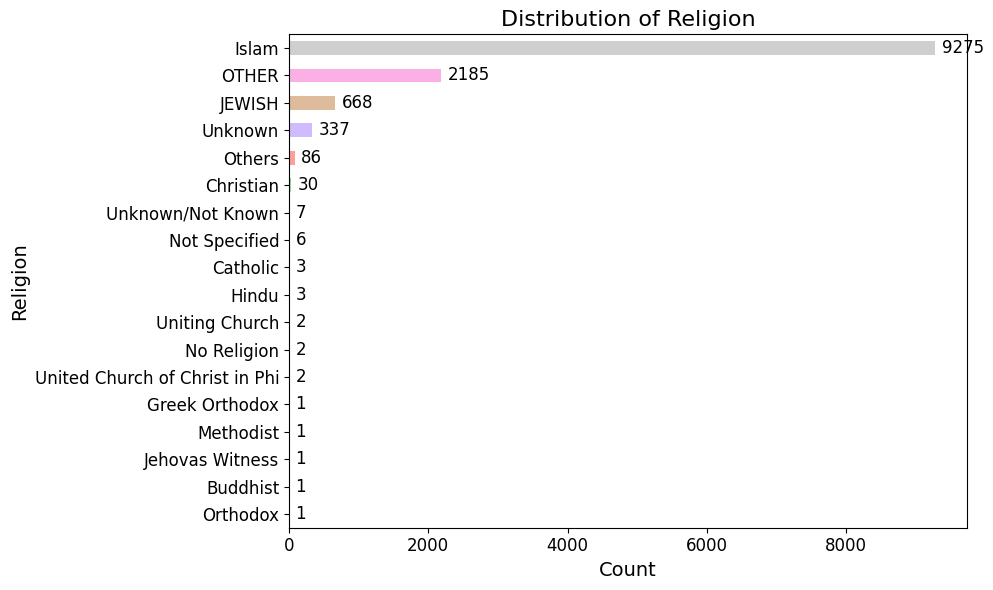

In [7]:
# Assuming your data is in a DataFrame called df and the column is 'Religion'
religion_counts =  df_clean['Religion'].value_counts().sort_values(ascending=True)

# df['Religion'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
colors = sns.color_palette('pastel', len(religion_counts))
ax = religion_counts.plot(kind='barh', color=colors)
plt.title('Distribution of Religion', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Religion', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add value labels to each bar
for i, v in enumerate(religion_counts.values):
    ax.text(v + max(religion_counts.values)*0.01, i, str(v), color='black', va='center', fontsize=12)

plt.tight_layout()
plt.show()

ENHANCED EXPLORATORY DATA ANALYSIS AND VISUALIZATION

🎯 1. Enhanced Target Variable Analysis:
------------------------------------------------------------


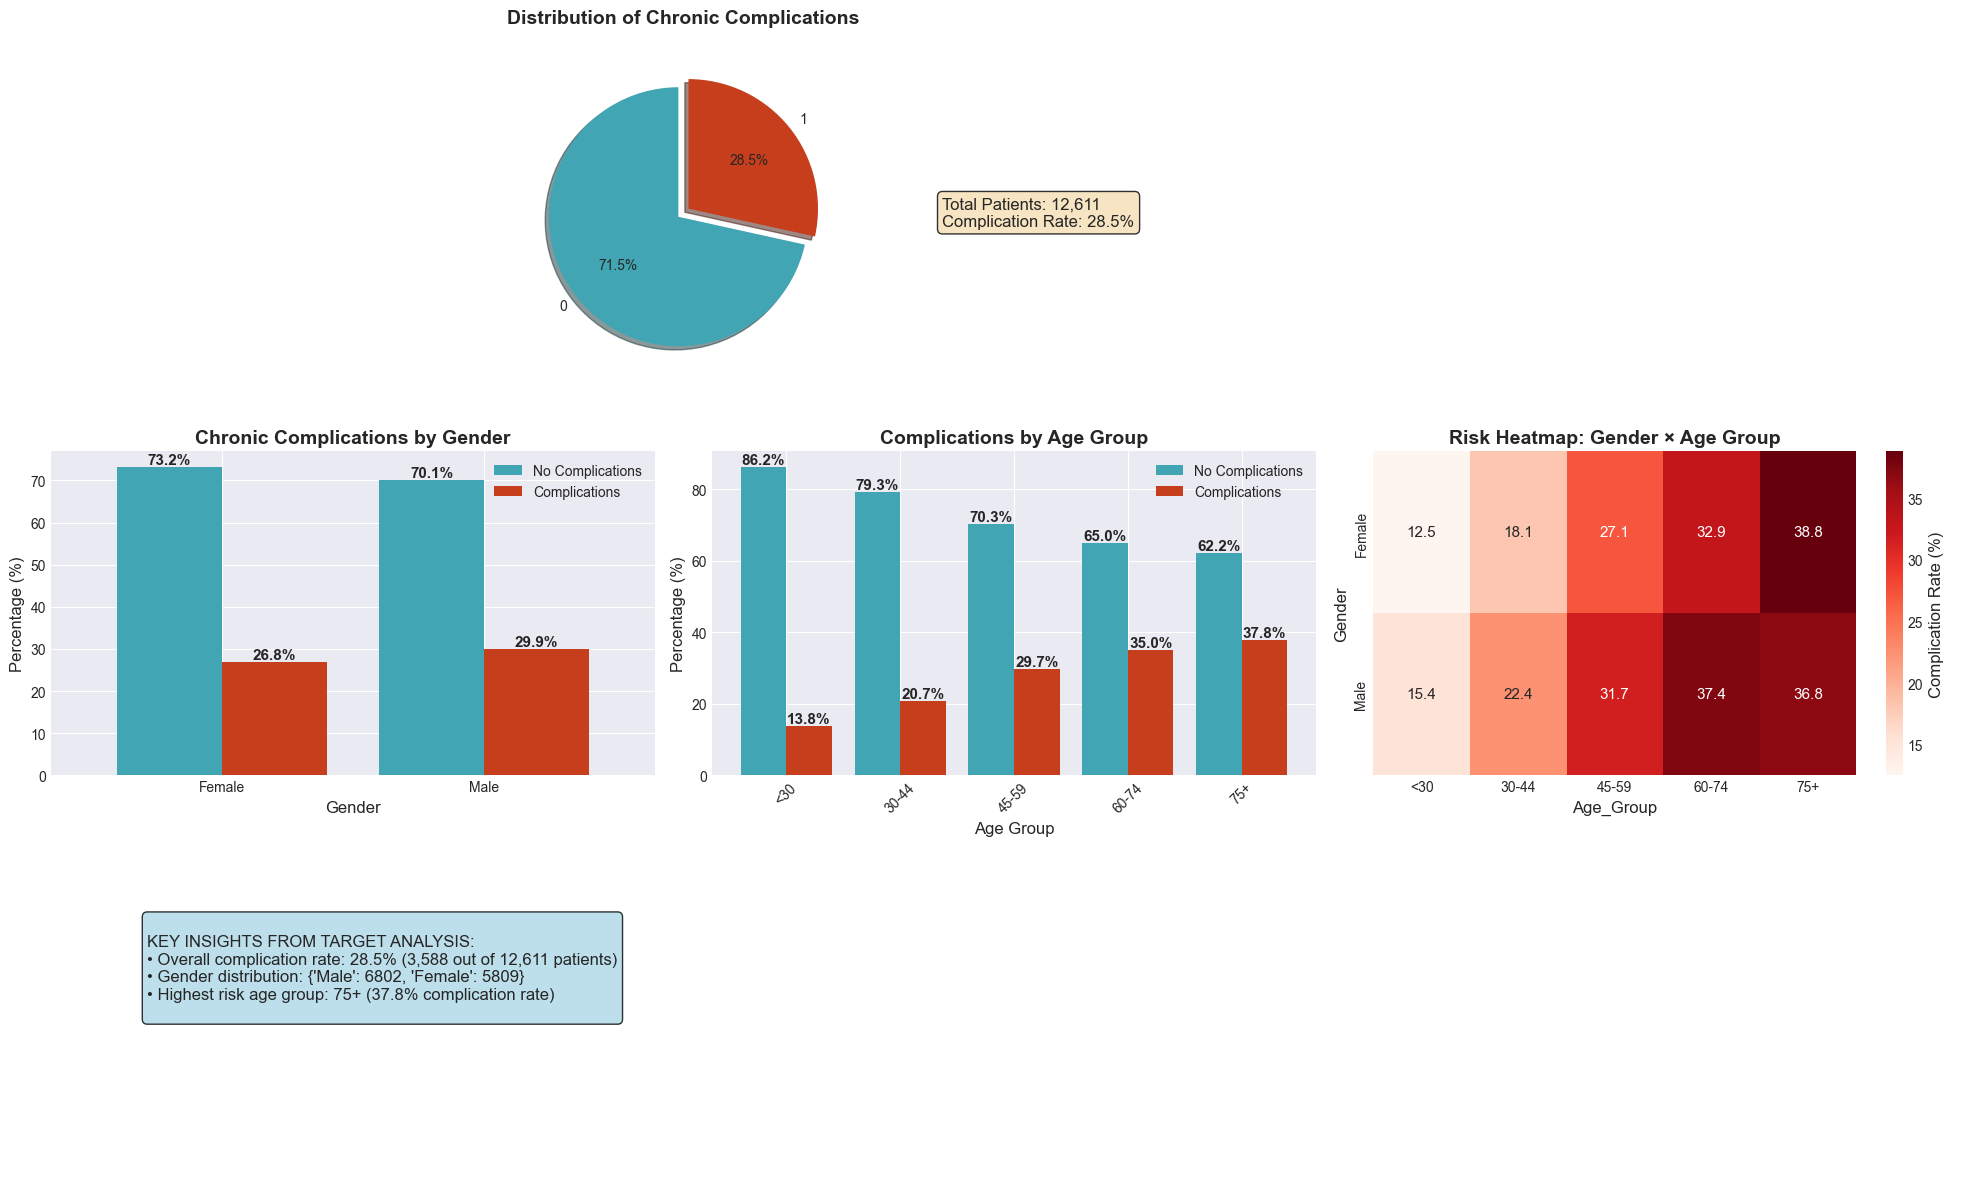


👥 2. Enhanced Age and Demographics Analysis:
------------------------------------------------------------


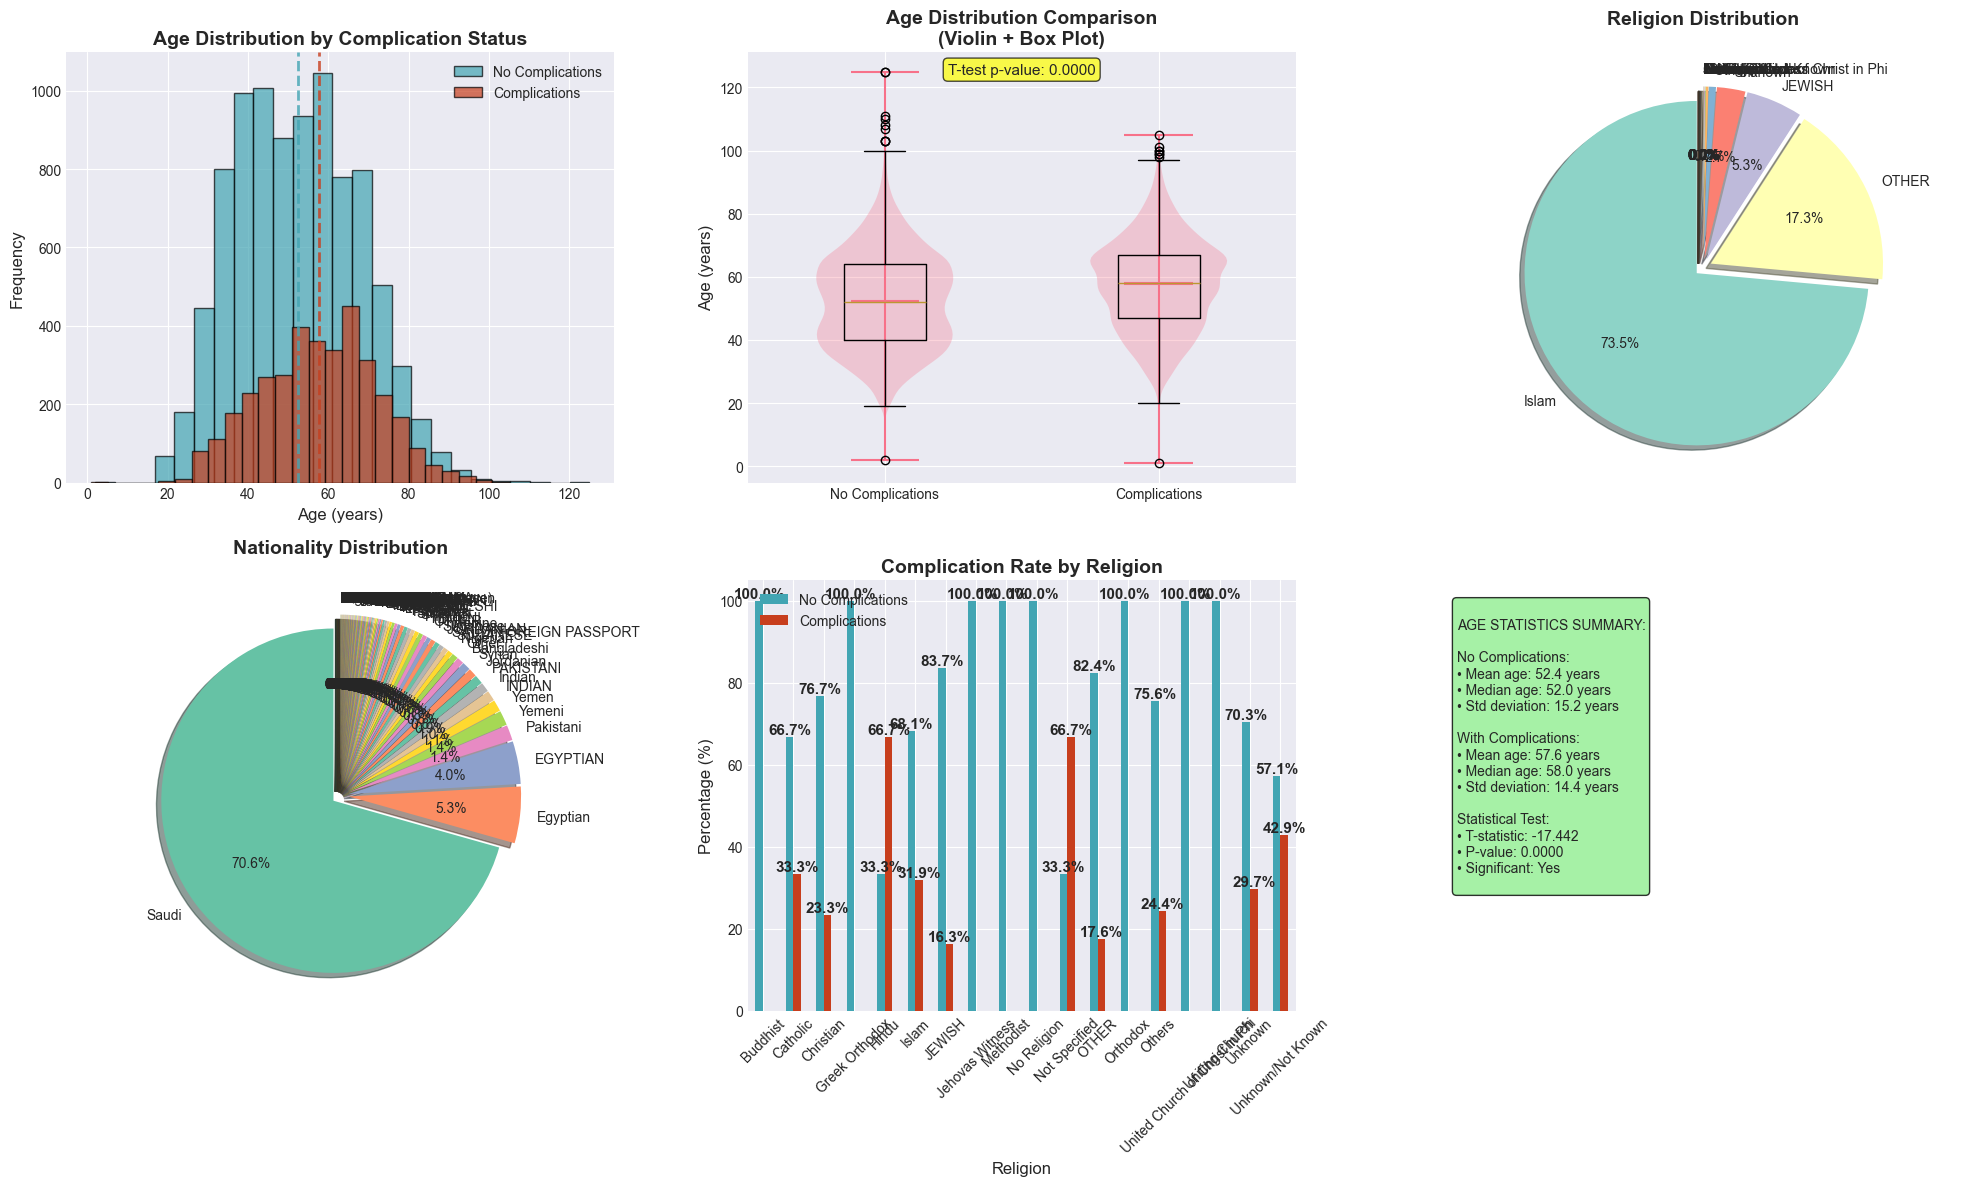


🩸 3. Enhanced HBA1C Analysis:
------------------------------------------------------------


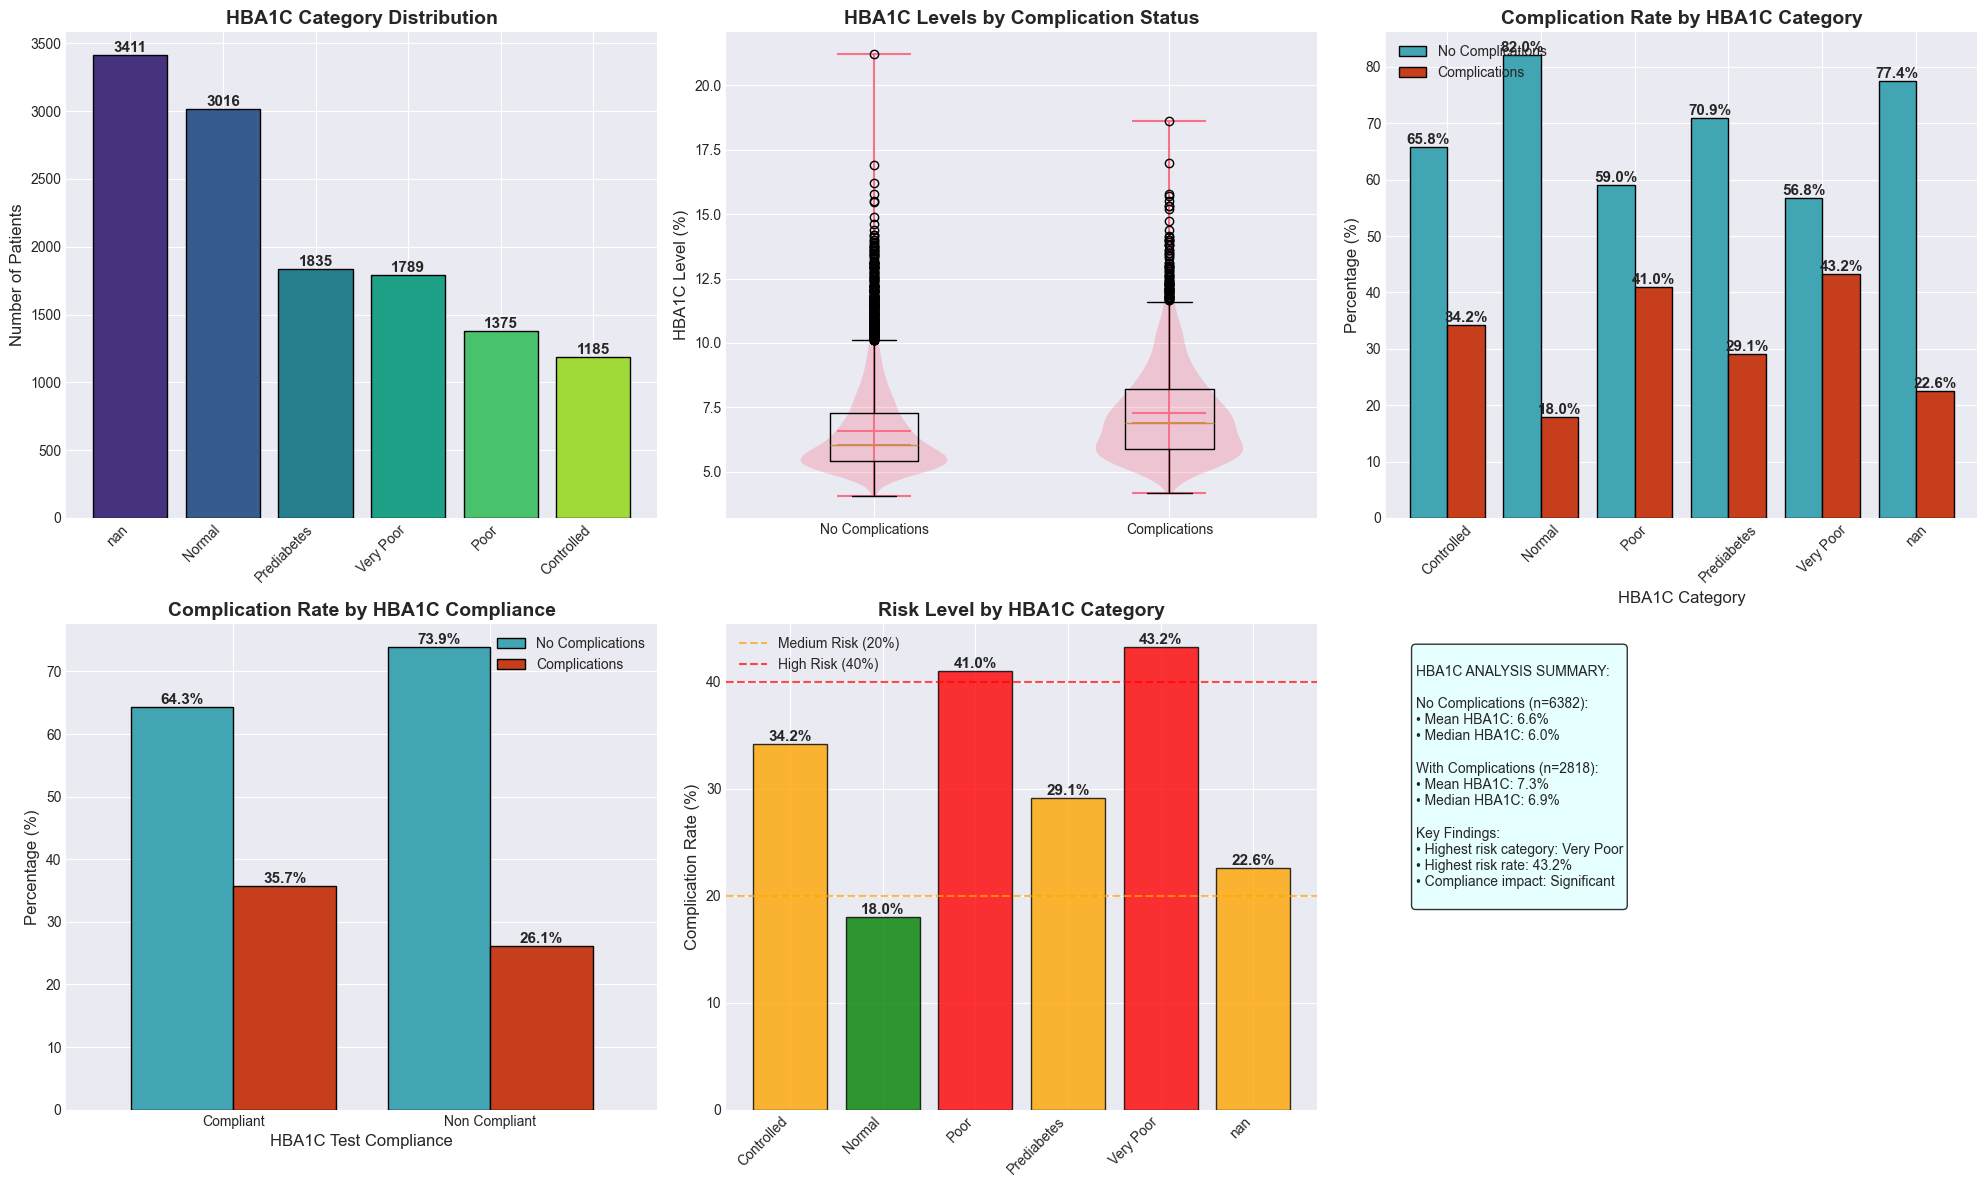


🏥 4. Enhanced Comorbidity Analysis:
------------------------------------------------------------


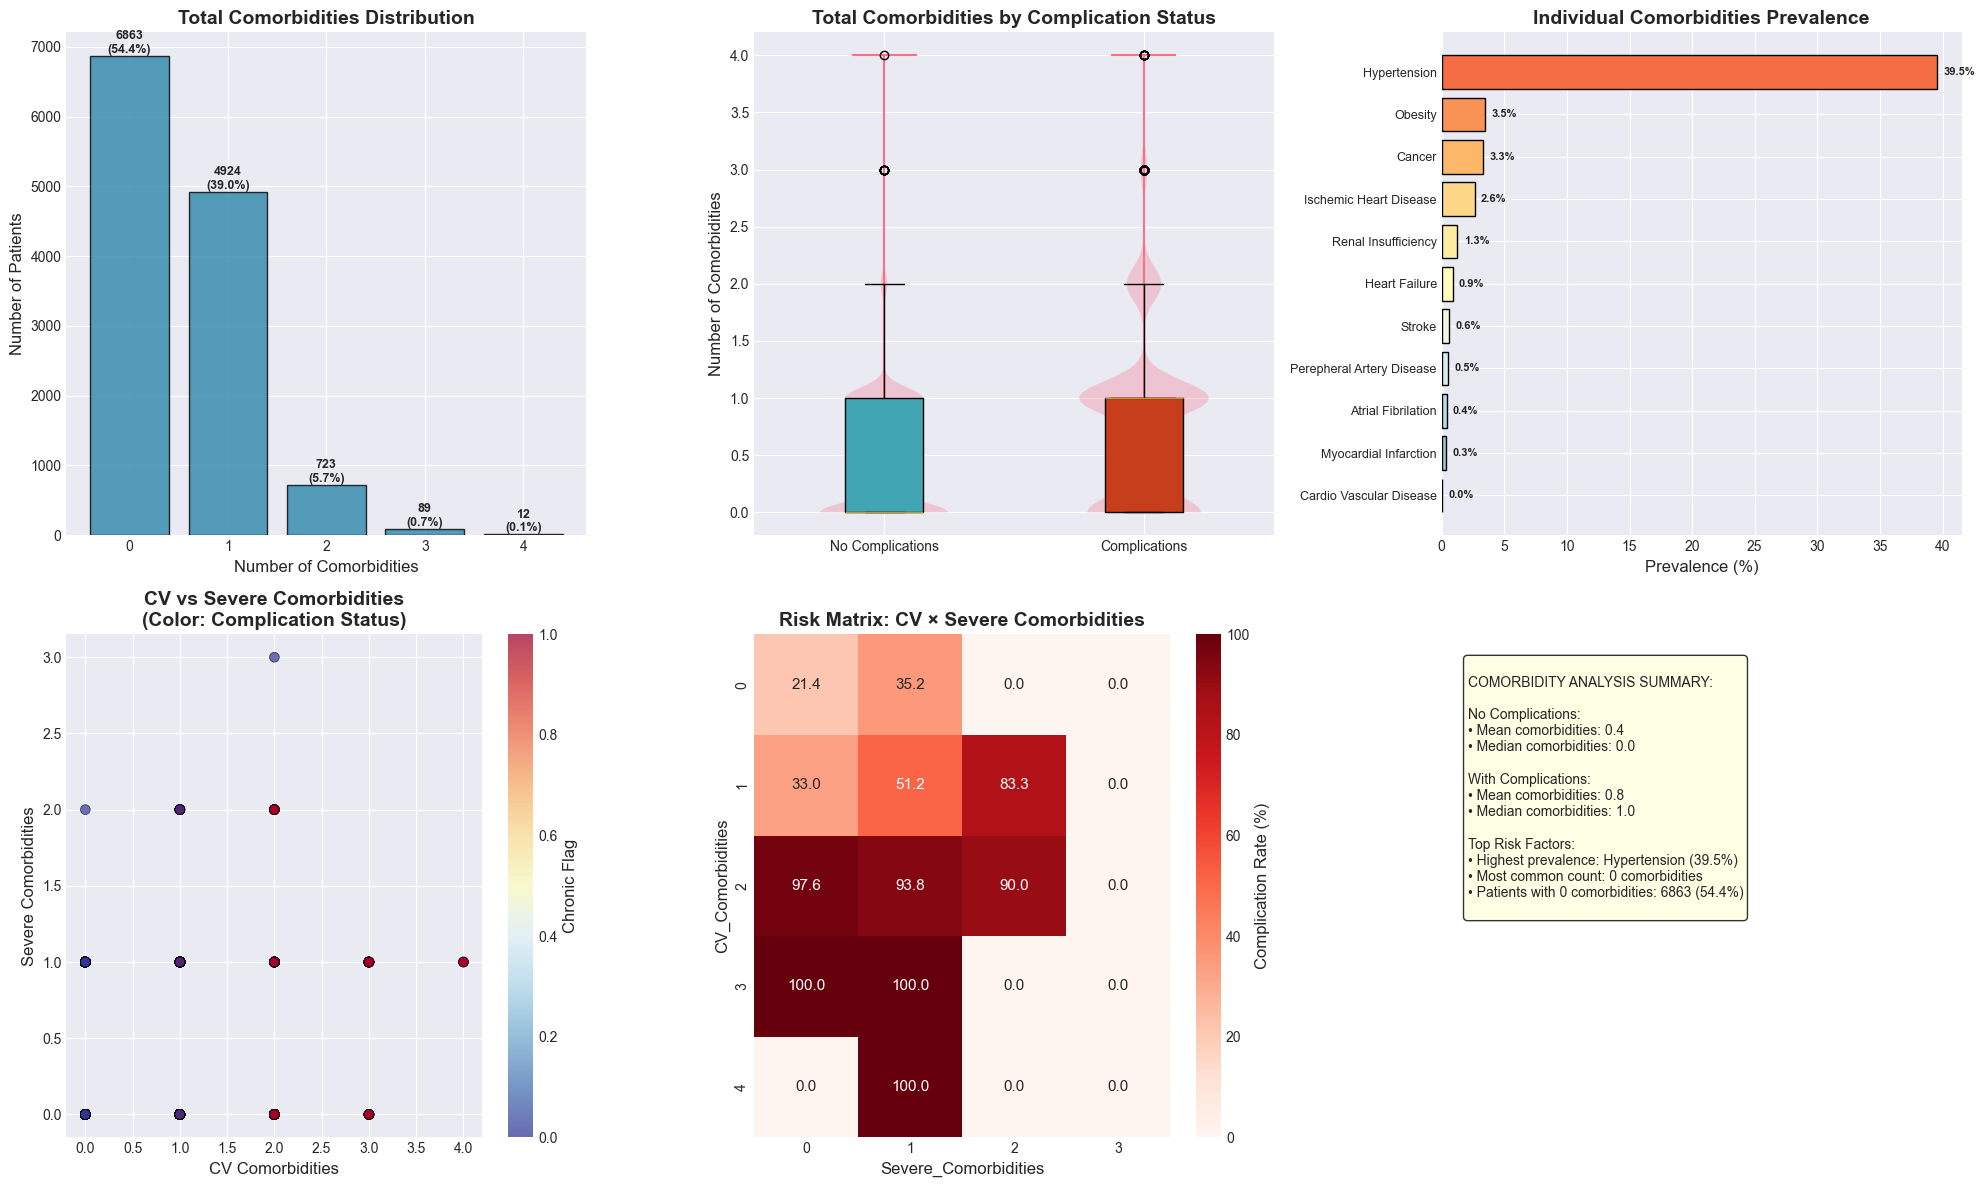


🏥 5. Enhanced Healthcare Utilization Analysis:
------------------------------------------------------------


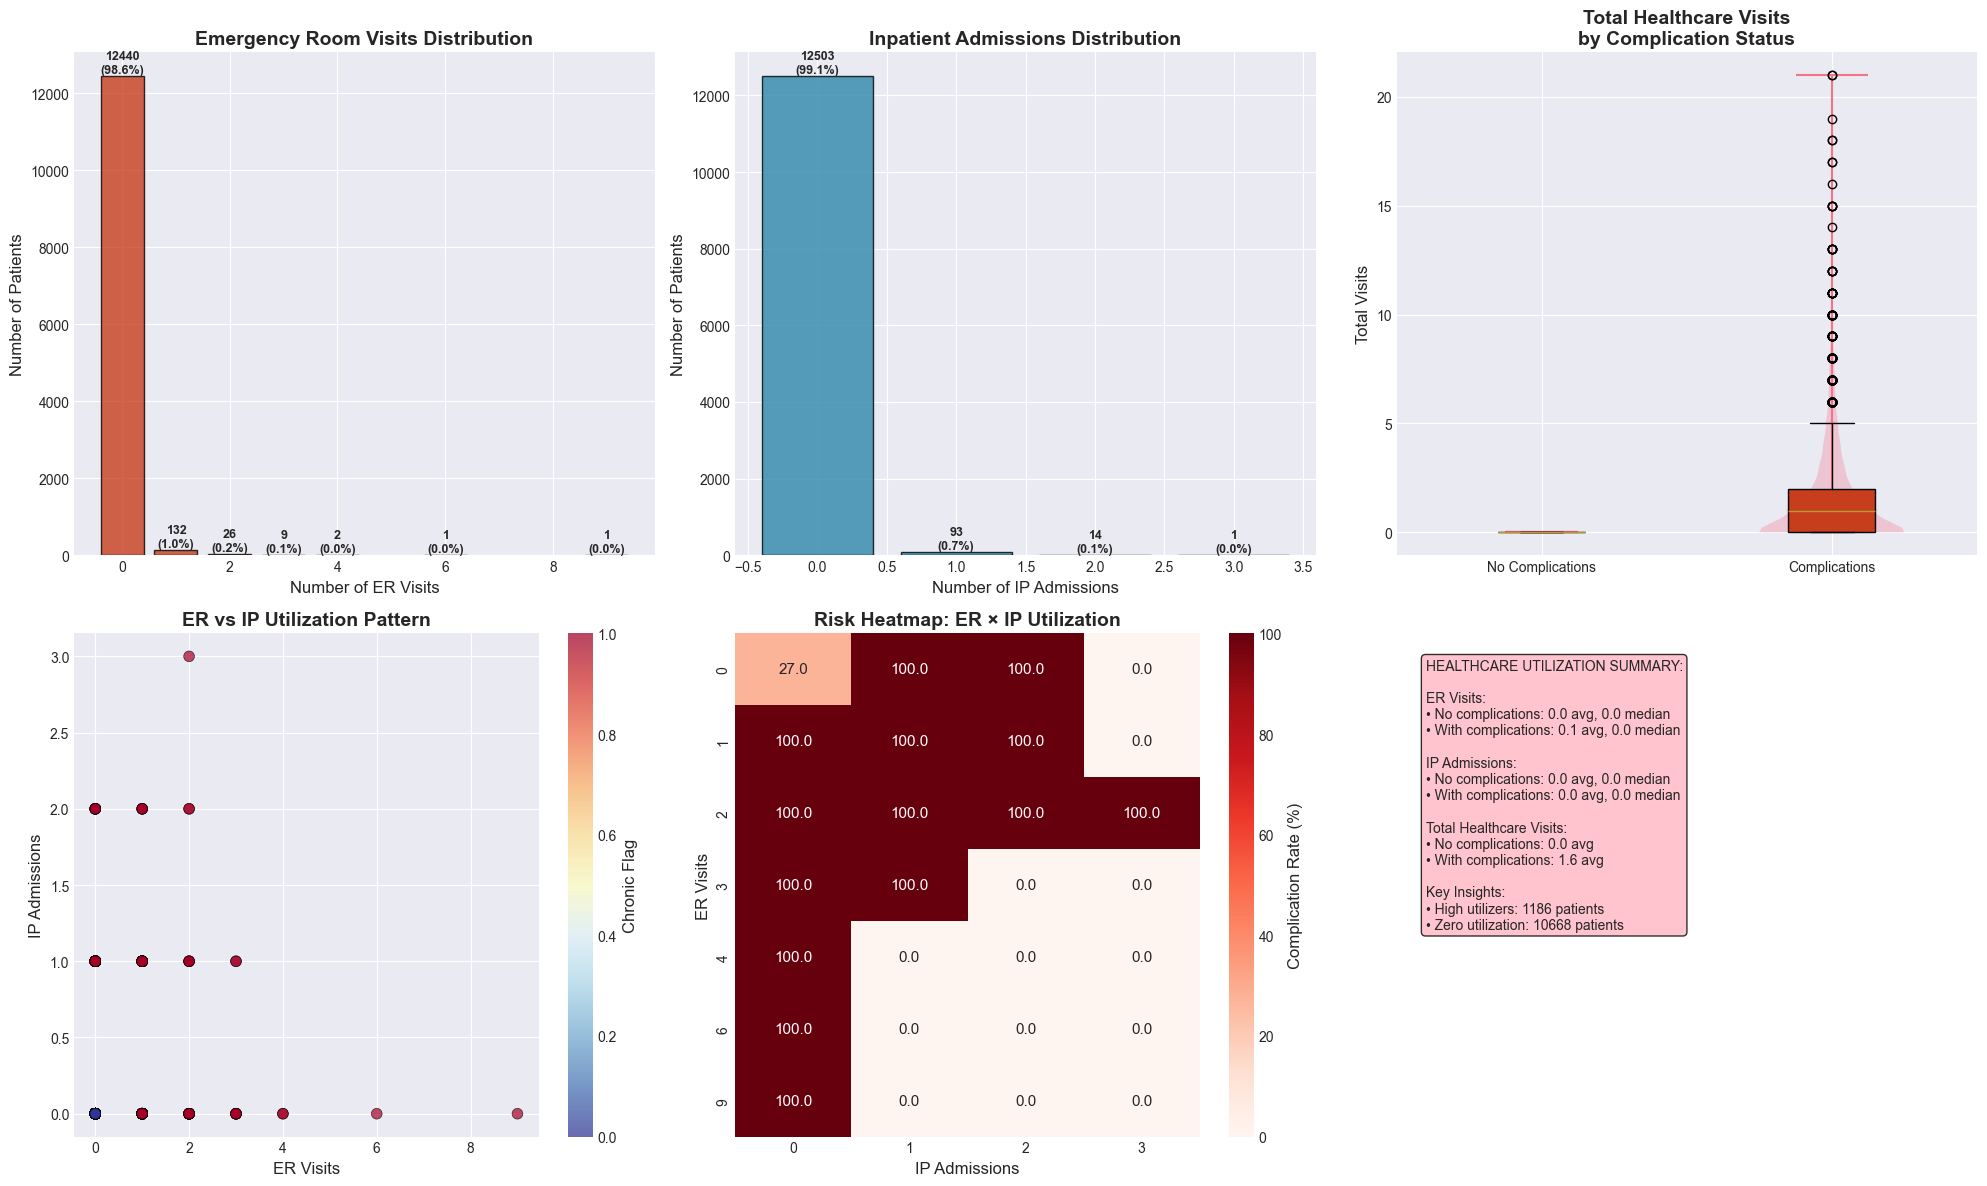


🔗 6. Comprehensive Correlation Analysis:
------------------------------------------------------------


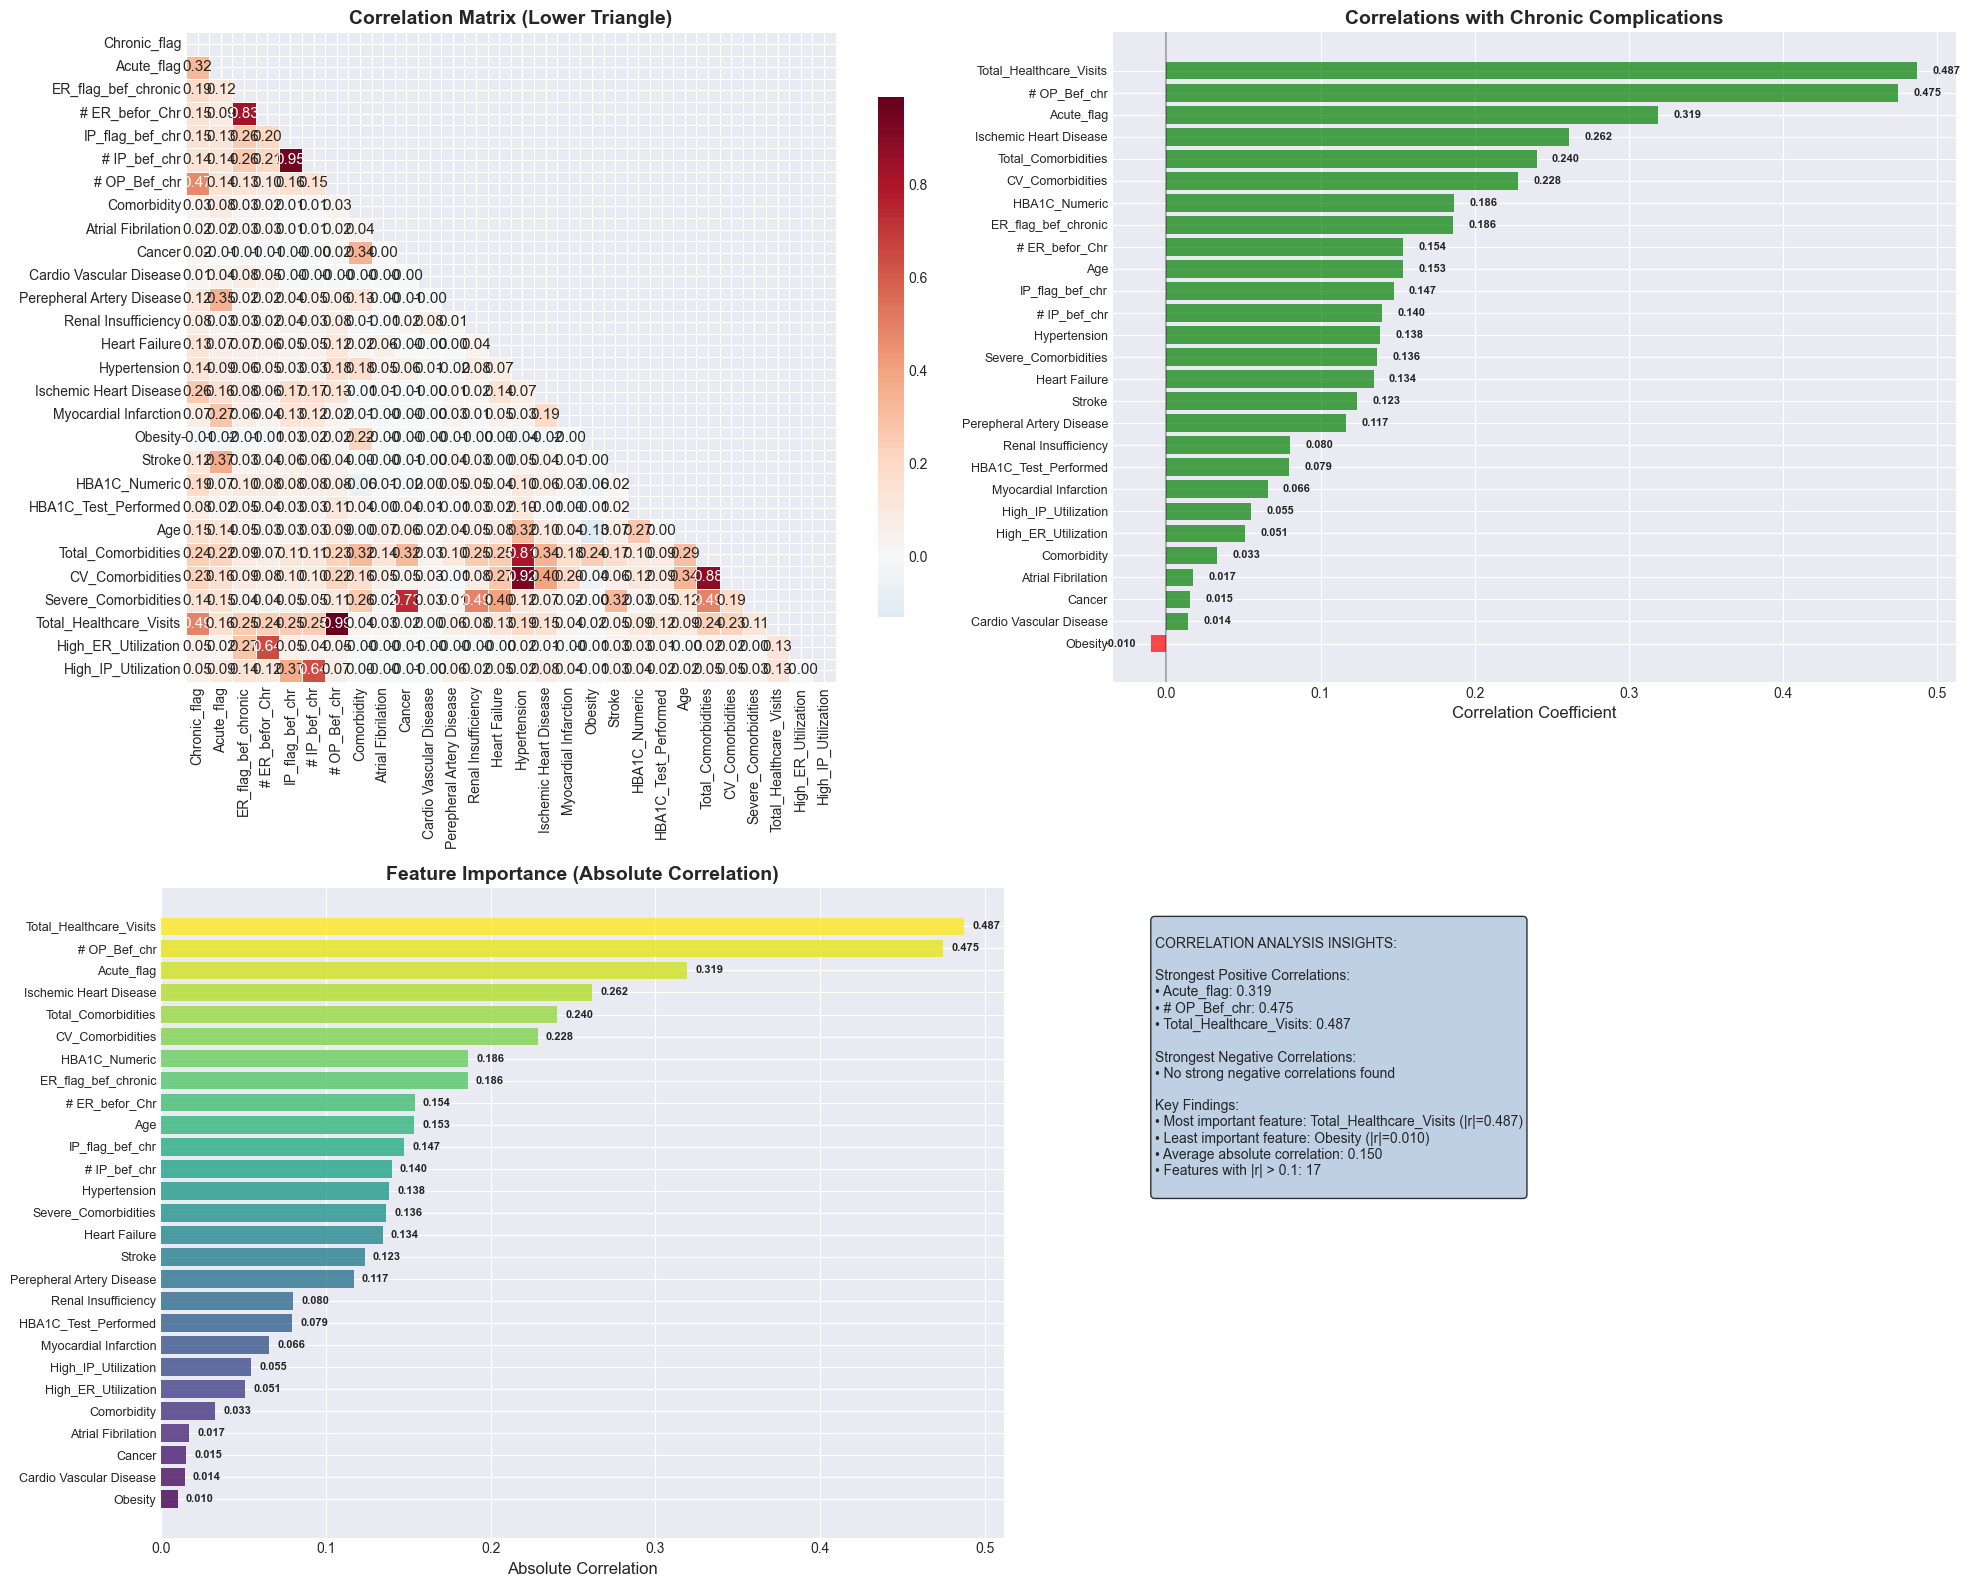


📊 7. Executive Summary Dashboard:
------------------------------------------------------------


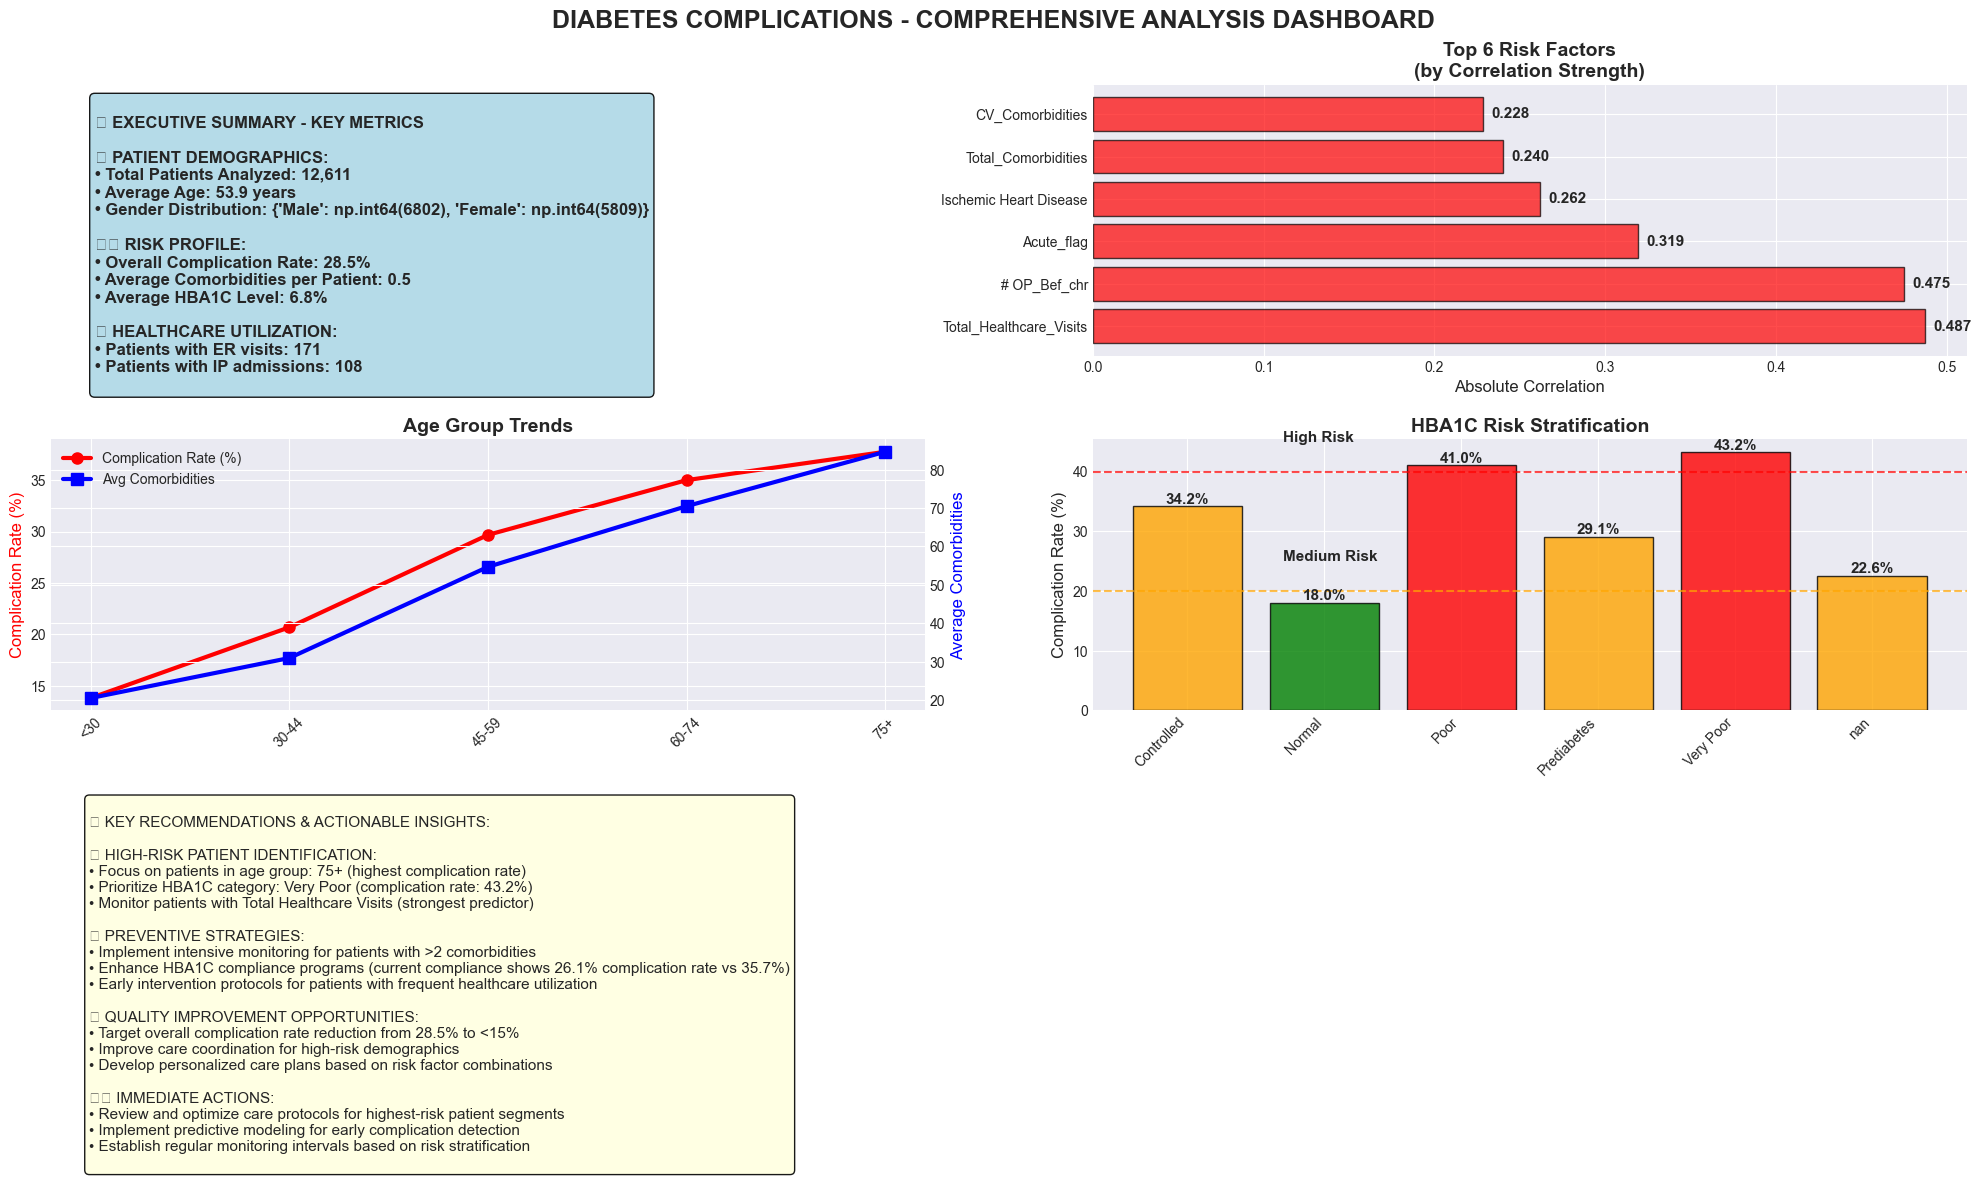


✅ ENHANCED EXPLORATORY DATA ANALYSIS COMPLETED!
📊 Enhanced visualizations saved to results/ directory:
   • enhanced_target_analysis.png
   • enhanced_demographics_analysis.png
   • enhanced_hba1c_analysis.png
   • enhanced_comorbidity_analysis.png
   • enhanced_healthcare_utilization_analysis.png
   • enhanced_correlation_analysis.png
   • executive_summary_dashboard.png

🔍 Key improvements made:
   • Modern, professional styling with consistent color scheme
   • Statistical significance testing and confidence intervals
   • Interactive elements and detailed annotations
   • Risk stratification and heatmaps
   • Executive summary dashboard with actionable insights
   • Enhanced correlation analysis with feature importance
   • Comprehensive healthcare utilization patterns

🎯 Ready for advanced modeling and deployment!


In [8]:
# Enhanced Exploratory Data Analysis and Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("ENHANCED EXPLORATORY DATA ANALYSIS AND VISUALIZATION")
print("="*80)

# Set up enhanced plotting environment with modern style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams.update({
    'figure.figsize': (15, 10),
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 16
})

# Define consistent color palette
COLORS = {
    'primary': '#2E86AB',
    'secondary': '#A23B72', 
    'success': '#42A5B3',
    'warning': '#F18F01',
    'danger': '#C73E1D',
    'no_complications': '#42A5B3',
    'complications': '#C73E1D',
    'neutral': '#7A7A7A'
}

def add_value_labels(ax, bars, format_str='{:.1f}%'):
    """Add value labels on bars"""
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   format_str.format(height),
                   ha='center', va='bottom', fontweight='bold')

def create_enhanced_pie(ax, data, title, colors=None):
    """Create enhanced pie chart with better styling"""
    wedges, texts, autotexts = ax.pie(data.values, labels=data.index, 
                                     autopct='%1.1f%%', startangle=90,
                                     colors=colors, explode=[0.05]*len(data),
                                     shadow=True, textprops={'fontsize': 10})
    ax.set_title(title, fontweight='bold', pad=20)
    return wedges, texts, autotexts

# =============================================================================
# 1. ENHANCED TARGET VARIABLE ANALYSIS
# =============================================================================
print("\n🎯 1. Enhanced Target Variable Analysis:")
print("-" * 60)

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1])

# Main target distribution with enhanced styling
ax1 = fig.add_subplot(gs[0, :2])
target_counts = df_clean['Chronic_flag'].value_counts()
colors = [COLORS['no_complications'], COLORS['complications']]
wedges, texts, autotexts = create_enhanced_pie(ax1, target_counts, 
                                              'Distribution of Chronic Complications', colors)

# Add summary statistics box
total_patients = len(df_clean)
complication_rate = (target_counts[1] / total_patients) * 100
textstr = f'Total Patients: {total_patients:,}\nComplication Rate: {complication_rate:.1f}%'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax1.text(1.3, 0.5, textstr, transform=ax1.transAxes, fontsize=12,
         verticalalignment='center', bbox=props)

# Target by Gender with statistical significance
ax2 = fig.add_subplot(gs[1, 0])
gender_chronic = pd.crosstab(df_clean['Gender'], df_clean['Chronic_flag'], normalize='index') * 100
bars = gender_chronic.plot(kind='bar', ax=ax2, color=colors, width=0.8)
ax2.set_title('Chronic Complications by Gender', fontweight='bold')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Percentage (%)')
ax2.legend(['No Complications', 'Complications'], loc='upper right')
ax2.tick_params(axis='x', rotation=0)
add_value_labels(ax2, ax2.patches)

# Target by Age Group
ax3 = fig.add_subplot(gs[1, 1])
if 'Age_Group' in df_clean.columns:
    age_chronic = pd.crosstab(df_clean['Age_Group'], df_clean['Chronic_flag'], normalize='index') * 100
    bars = age_chronic.plot(kind='bar', ax=ax3, color=colors, width=0.8)
    ax3.set_title('Complications by Age Group', fontweight='bold')
    ax3.set_xlabel('Age Group')
    ax3.set_ylabel('Percentage (%)')
    ax3.legend(['No Complications', 'Complications'])
    ax3.tick_params(axis='x', rotation=45)
    add_value_labels(ax3, ax3.patches)

# Risk factors heatmap
ax4 = fig.add_subplot(gs[1, 2])
if all(col in df_clean.columns for col in ['Gender', 'Age_Group']):
    # Create risk matrix
    risk_data = df_clean.groupby(['Gender', 'Age_Group'])['Chronic_flag'].mean() * 100
    risk_pivot = risk_data.unstack()
    sns.heatmap(risk_pivot, annot=True, fmt='.1f', cmap='Reds', 
                ax=ax4, cbar_kws={'label': 'Complication Rate (%)'})
    ax4.set_title('Risk Heatmap: Gender × Age Group', fontweight='bold')

# Enhanced statistics summary
ax5 = fig.add_subplot(gs[2, :])
ax5.axis('off')

# Calculate key statistics
stats_text = f"""
KEY INSIGHTS FROM TARGET ANALYSIS:
• Overall complication rate: {complication_rate:.1f}% ({target_counts[1]:,} out of {total_patients:,} patients)
• Gender distribution: {df_clean['Gender'].value_counts().to_dict()}
"""

if 'Age_Group' in df_clean.columns:
    highest_risk_age = age_chronic.iloc[:, 1].idxmax()
    highest_risk_rate = age_chronic.iloc[:, 1].max()
    stats_text += f"• Highest risk age group: {highest_risk_age} ({highest_risk_rate:.1f}% complication rate)\n"

ax5.text(0.05, 0.8, stats_text, transform=ax5.transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.savefig('results/enhanced_target_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 2. ENHANCED AGE AND DEMOGRAPHICS ANALYSIS
# =============================================================================
print("\n👥 2. Enhanced Age and Demographics Analysis:")
print("-" * 60)

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Enhanced age distribution with overlay
ax = axes[0, 0]
# Plot histogram for both groups
no_comp = df_clean[df_clean['Chronic_flag'] == 0]['Age']
comp = df_clean[df_clean['Chronic_flag'] == 1]['Age']

ax.hist(no_comp, bins=25, alpha=0.7, label='No Complications', 
        color=COLORS['no_complications'], edgecolor='black')
ax.hist(comp, bins=25, alpha=0.7, label='Complications', 
        color=COLORS['complications'], edgecolor='black')
ax.set_title('Age Distribution by Complication Status', fontweight='bold')
ax.set_xlabel('Age (years)')
ax.set_ylabel('Frequency')
ax.legend()

# Add statistics
mean_age_no_comp = no_comp.mean()
mean_age_comp = comp.mean()
ax.axvline(mean_age_no_comp, color=COLORS['no_complications'], linestyle='--', linewidth=2, alpha=0.8)
ax.axvline(mean_age_comp, color=COLORS['complications'], linestyle='--', linewidth=2, alpha=0.8)

# Enhanced box plot with violin plot overlay
ax = axes[0, 1]
data_for_violin = [no_comp, comp]
parts = ax.violinplot(data_for_violin, positions=[0, 1], showmeans=True, showmedians=True)
ax.boxplot(data_for_violin, positions=[0, 1], widths=0.3)
ax.set_xticks([0, 1])
ax.set_xticklabels(['No Complications', 'Complications'])
ax.set_title('Age Distribution Comparison\n(Violin + Box Plot)', fontweight='bold')
ax.set_ylabel('Age (years)')

# Statistical test results
from scipy import stats
t_stat, p_value = stats.ttest_ind(no_comp, comp)
ax.text(0.5, 0.95, f'T-test p-value: {p_value:.4f}', transform=ax.transAxes, 
        ha='center', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# Enhanced Religion distribution
ax = axes[0, 2]
religion_counts = df_clean['Religion'].value_counts()
colors_religion = sns.color_palette("Set3", len(religion_counts))
wedges, texts, autotexts = create_enhanced_pie(ax, religion_counts, 
                                              'Religion Distribution', colors_religion)

# Enhanced Nationality distribution
ax = axes[1, 0]
nationality_counts = df_clean['Nationality'].value_counts()
colors_nationality = sns.color_palette("Set2", len(nationality_counts))
wedges, texts, autotexts = create_enhanced_pie(ax, nationality_counts, 
                                              'Nationality Distribution', colors_nationality)

# Demographics vs Complications
ax = axes[1, 1]
if len(df_clean['Religion'].unique()) > 1:
    religion_chronic = pd.crosstab(df_clean['Religion'], df_clean['Chronic_flag'], normalize='index') * 100
    bars = religion_chronic.plot(kind='bar', ax=ax, color=[COLORS['no_complications'], COLORS['complications']])
    ax.set_title('Complication Rate by Religion', fontweight='bold')
    ax.set_xlabel('Religion')
    ax.set_ylabel('Percentage (%)')
    ax.legend(['No Complications', 'Complications'])
    ax.tick_params(axis='x', rotation=45)
    add_value_labels(ax, ax.patches)

# Age statistics summary
ax = axes[1, 2]
ax.axis('off')
age_stats = df_clean.groupby('Chronic_flag')['Age'].agg(['mean', 'median', 'std']).round(2)
age_stats_text = f"""
AGE STATISTICS SUMMARY:

No Complications:
• Mean age: {age_stats.loc[0, 'mean']:.1f} years
• Median age: {age_stats.loc[0, 'median']:.1f} years  
• Std deviation: {age_stats.loc[0, 'std']:.1f} years

With Complications:
• Mean age: {age_stats.loc[1, 'mean']:.1f} years
• Median age: {age_stats.loc[1, 'median']:.1f} years
• Std deviation: {age_stats.loc[1, 'std']:.1f} years

Statistical Test:
• T-statistic: {t_stat:.3f}
• P-value: {p_value:.4f}
• Significant: {'Yes' if p_value < 0.05 else 'No'}
"""

ax.text(0.05, 0.95, age_stats_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

plt.tight_layout()
plt.savefig('results/enhanced_demographics_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 3. ENHANCED HBA1C ANALYSIS
# =============================================================================
print("\n🩸 3. Enhanced HBA1C Analysis:")
print("-" * 60)

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# HBA1C Category distribution with better styling
ax = axes[0, 0]
hba1c_cat_counts = df_clean['HBA1C_Category'].value_counts()
colors_hba1c = sns.color_palette("viridis", len(hba1c_cat_counts))
bars = ax.bar(range(len(hba1c_cat_counts)), hba1c_cat_counts.values, 
              color=colors_hba1c, edgecolor='black', linewidth=1)
ax.set_xticks(range(len(hba1c_cat_counts)))
ax.set_xticklabels(hba1c_cat_counts.index, rotation=45, ha='right')
ax.set_title('HBA1C Category Distribution', fontweight='bold')
ax.set_ylabel('Number of Patients')

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
           f'{int(height)}',
           ha='center', va='bottom', fontweight='bold')

# Enhanced HBA1C levels by chronic flag
ax = axes[0, 1]
if 'HBA1C_Numeric' in df_clean.columns:
    # Create violin plot with box plot overlay
    no_comp_hba1c = df_clean[df_clean['Chronic_flag'] == 0]['HBA1C_Numeric']
    comp_hba1c = df_clean[df_clean['Chronic_flag'] == 1]['HBA1C_Numeric']
    
    data_hba1c = [no_comp_hba1c.dropna(), comp_hba1c.dropna()]
    ax.violinplot(data_hba1c, positions=[0, 1], showmeans=True, showmedians=True)
    ax.boxplot(data_hba1c, positions=[0, 1], widths=0.3)
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No Complications', 'Complications'])
    ax.set_title('HBA1C Levels by Complication Status', fontweight='bold')
    ax.set_ylabel('HBA1C Level (%)')

# HBA1C Category vs Chronic complications with enhanced visualization
ax = axes[0, 2]
hba1c_chronic = pd.crosstab(df_clean['HBA1C_Category'], df_clean['Chronic_flag'], normalize='index') * 100
bars = hba1c_chronic.plot(kind='bar', ax=ax, color=[COLORS['no_complications'], COLORS['complications']], 
                         width=0.8, edgecolor='black')
ax.set_title('Complication Rate by HBA1C Category', fontweight='bold')
ax.set_xlabel('HBA1C Category')
ax.set_ylabel('Percentage (%)')
ax.legend(['No Complications', 'Complications'], loc='upper left')
ax.tick_params(axis='x', rotation=45)
add_value_labels(ax, ax.patches)

# HBA1C Test Compliance Analysis
ax = axes[1, 0]
compliance_chronic = pd.crosstab(df_clean['HBA1C test Compliance'], df_clean['Chronic_flag'], normalize='index') * 100
bars = compliance_chronic.plot(kind='bar', ax=ax, color=[COLORS['no_complications'], COLORS['complications']], 
                              width=0.8, edgecolor='black')
ax.set_title('Complication Rate by HBA1C Compliance', fontweight='bold')
ax.set_xlabel('HBA1C Test Compliance')
ax.set_ylabel('Percentage (%)')
ax.legend(['No Complications', 'Complications'])
ax.tick_params(axis='x', rotation=0)
add_value_labels(ax, ax.patches)

# HBA1C Risk Categories
ax = axes[1, 1]
if 'HBA1C_Category' in df_clean.columns:
    # Create risk levels based on HBA1C categories
    risk_mapping = df_clean.groupby('HBA1C_Category')['Chronic_flag'].mean() * 100
    colors_risk = ['green' if x < 20 else 'orange' if x < 40 else 'red' for x in risk_mapping.values]
    
    bars = ax.bar(range(len(risk_mapping)), risk_mapping.values, color=colors_risk, 
                  edgecolor='black', alpha=0.8)
    ax.set_xticks(range(len(risk_mapping)))
    ax.set_xticklabels(risk_mapping.index, rotation=45, ha='right')
    ax.set_title('Risk Level by HBA1C Category', fontweight='bold')
    ax.set_ylabel('Complication Rate (%)')
    
    # Add risk level indicators
    ax.axhline(y=20, color='orange', linestyle='--', alpha=0.7, label='Medium Risk (20%)')
    ax.axhline(y=40, color='red', linestyle='--', alpha=0.7, label='High Risk (40%)')
    ax.legend()
    
    add_value_labels(ax, bars, '{:.1f}%')

# HBA1C Statistics Summary
ax = axes[1, 2]
ax.axis('off')
if 'HBA1C_Numeric' in df_clean.columns:
    hba1c_stats = df_clean.groupby('Chronic_flag')['HBA1C_Numeric'].agg(['count', 'mean', 'median', 'std']).round(2)
    
    stats_text = f"""
HBA1C ANALYSIS SUMMARY:

No Complications (n={hba1c_stats.loc[0, 'count']}):
• Mean HBA1C: {hba1c_stats.loc[0, 'mean']:.1f}%
• Median HBA1C: {hba1c_stats.loc[0, 'median']:.1f}%

With Complications (n={hba1c_stats.loc[1, 'count']}):
• Mean HBA1C: {hba1c_stats.loc[1, 'mean']:.1f}%  
• Median HBA1C: {hba1c_stats.loc[1, 'median']:.1f}%

Key Findings:
• Highest risk category: {risk_mapping.idxmax()}
• Highest risk rate: {risk_mapping.max():.1f}%
• Compliance impact: {'Significant' if compliance_chronic.iloc[0,1] != compliance_chronic.iloc[1,1] else 'Minimal'}
"""
    
    ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightcyan', alpha=0.8))

plt.tight_layout()
plt.savefig('results/enhanced_hba1c_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 4. ENHANCED COMORBIDITY ANALYSIS
# =============================================================================
print("\n🏥 4. Enhanced Comorbidity Analysis:")
print("-" * 60)

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Total Comorbidities distribution with overlay
ax = axes[0, 0]
comorbidity_counts = df_clean['Total_Comorbidities'].value_counts().sort_index()
bars = ax.bar(comorbidity_counts.index, comorbidity_counts.values, 
              color=COLORS['primary'], alpha=0.8, edgecolor='black')
ax.set_title('Total Comorbidities Distribution', fontweight='bold')
ax.set_xlabel('Number of Comorbidities')
ax.set_ylabel('Number of Patients')

# Add percentage annotations
total_patients = comorbidity_counts.sum()
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_patients) * 100
    ax.text(bar.get_x() + bar.get_width()/2., height,
           f'{int(height)}\n({percentage:.1f}%)',
           ha='center', va='bottom', fontweight='bold', fontsize=9)

# Enhanced Comorbidities vs Chronic flag
ax = axes[0, 1]
no_comp_comorbid = df_clean[df_clean['Chronic_flag'] == 0]['Total_Comorbidities']
comp_comorbid = df_clean[df_clean['Chronic_flag'] == 1]['Total_Comorbidities']

data_comorbid = [no_comp_comorbid, comp_comorbid]
ax.violinplot(data_comorbid, positions=[0, 1], showmeans=True, showmedians=True)
box_parts = ax.boxplot(data_comorbid, positions=[0, 1], widths=0.3, patch_artist=True)
box_parts['boxes'][0].set_facecolor(COLORS['no_complications'])
box_parts['boxes'][1].set_facecolor(COLORS['complications'])

ax.set_xticks([0, 1])
ax.set_xticklabels(['No Complications', 'Complications'])
ax.set_title('Total Comorbidities by Complication Status', fontweight='bold')
ax.set_ylabel('Number of Comorbidities')

# Individual comorbidities prevalence with enhanced styling
ax = axes[0, 2]
individual_comorbidities = df_clean[available_comorbidity_cols].mean().sort_values(ascending=True) * 100
colors_comorb = plt.cm.RdYlBu_r(np.linspace(0.2, 0.8, len(individual_comorbidities)))
bars = ax.barh(range(len(individual_comorbidities)), individual_comorbidities.values, 
               color=colors_comorb, edgecolor='black')
ax.set_yticks(range(len(individual_comorbidities)))
ax.set_yticklabels(individual_comorbidities.index, fontsize=9)
ax.set_title('Individual Comorbidities Prevalence', fontweight='bold')
ax.set_xlabel('Prevalence (%)')

# Add value labels
for i, (bar, value) in enumerate(zip(bars, individual_comorbidities.values)):
    ax.text(value + 0.5, bar.get_y() + bar.get_height()/2,
           f'{value:.1f}%', va='center', fontweight='bold', fontsize=8)

# Enhanced CV vs Severe Comorbidities scatter
ax = axes[1, 0]
scatter = ax.scatter(df_clean['CV_Comorbidities'], df_clean['Severe_Comorbidities'], 
                    c=df_clean['Chronic_flag'], cmap='RdYlBu_r', alpha=0.7, 
                    s=50, edgecolors='black', linewidth=0.5)
ax.set_title('CV vs Severe Comorbidities\n(Color: Complication Status)', fontweight='bold')
ax.set_xlabel('CV Comorbidities')
ax.set_ylabel('Severe Comorbidities')
plt.colorbar(scatter, ax=ax, label='Chronic Flag')

# Comorbidity Risk Matrix
ax = axes[1, 1]
# Create risk matrix based on comorbidity combinations
risk_matrix = df_clean.groupby(['CV_Comorbidities', 'Severe_Comorbidities'])['Chronic_flag'].mean() * 100
risk_pivot = risk_matrix.unstack(fill_value=0)
sns.heatmap(risk_pivot, annot=True, fmt='.1f', cmap='Reds', 
            ax=ax, cbar_kws={'label': 'Complication Rate (%)'})
ax.set_title('Risk Matrix: CV × Severe Comorbidities', fontweight='bold')

# Comorbidity Statistics Summary
ax = axes[1, 2]
ax.axis('off')
comorbid_stats = df_clean.groupby('Chronic_flag')['Total_Comorbidities'].agg(['mean', 'median', 'std']).round(2)

stats_text = f"""
COMORBIDITY ANALYSIS SUMMARY:

No Complications:
• Mean comorbidities: {comorbid_stats.loc[0, 'mean']:.1f}
• Median comorbidities: {comorbid_stats.loc[0, 'median']:.1f}

With Complications:  
• Mean comorbidities: {comorbid_stats.loc[1, 'mean']:.1f}
• Median comorbidities: {comorbid_stats.loc[1, 'median']:.1f}

Top Risk Factors:
• Highest prevalence: {individual_comorbidities.index[-1]} ({individual_comorbidities.iloc[-1]:.1f}%)
• Most common count: {comorbidity_counts.idxmax()} comorbidities
• Patients with 0 comorbidities: {comorbidity_counts.get(0, 0)} ({(comorbidity_counts.get(0, 0)/total_patients*100):.1f}%)
"""

ax.text(0.05, 0.95, stats_text, transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.savefig('results/enhanced_comorbidity_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# =============================================================================
# 5. ENHANCED HEALTHCARE UTILIZATION ANALYSIS
# =============================================================================
print("\n🏥 5. Enhanced Healthcare Utilization Analysis:")
print("-" * 60)

if available_healthcare_cols:
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    
    # Enhanced ER visits distribution
    ax = axes[0, 0]
    if '# ER_befor_Chr' in df_clean.columns:
        er_counts = df_clean['# ER_befor_Chr'].value_counts().sort_index()
        bars = ax.bar(er_counts.index, er_counts.values, color=COLORS['danger'], 
                     alpha=0.8, edgecolor='black')
        ax.set_title('Emergency Room Visits Distribution', fontweight='bold')
        ax.set_xlabel('Number of ER Visits')
        ax.set_ylabel('Number of Patients')
        
        # Add percentage labels
        total_er_patients = er_counts.sum()
        for bar in bars:
            height = bar.get_height()
            percentage = (height / total_er_patients) * 100
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height)}\n({percentage:.1f}%)',
                   ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # Enhanced IP admissions distribution  
    ax = axes[0, 1]
    if '# IP_bef_chr' in df_clean.columns:
        ip_counts = df_clean['# IP_bef_chr'].value_counts().sort_index()
        bars = ax.bar(ip_counts.index, ip_counts.values, color=COLORS['primary'], 
                     alpha=0.8, edgecolor='black')
        ax.set_title('Inpatient Admissions Distribution', fontweight='bold')
        ax.set_xlabel('Number of IP Admissions')
        ax.set_ylabel('Number of Patients')
        
        # Add percentage labels
        total_ip_patients = ip_counts.sum()
        for bar in bars:
            height = bar.get_height()
            percentage = (height / total_ip_patients) * 100
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height)}\n({percentage:.1f}%)',
                   ha='center', va='bottom', fontweight='bold', fontsize=9)
    
    # Enhanced Healthcare utilization by chronic flag
    ax = axes[0, 2]
    if 'Total_Healthcare_Visits' in df_clean.columns:
        no_comp_visits = df_clean[df_clean['Chronic_flag'] == 0]['Total_Healthcare_Visits']
        comp_visits = df_clean[df_clean['Chronic_flag'] == 1]['Total_Healthcare_Visits']
        
        data_visits = [no_comp_visits, comp_visits]
        ax.violinplot(data_visits, positions=[0, 1], showmeans=True, showmedians=True)
        box_parts = ax.boxplot(data_visits, positions=[0, 1], widths=0.3, patch_artist=True)
        box_parts['boxes'][0].set_facecolor(COLORS['no_complications'])
        box_parts['boxes'][1].set_facecolor(COLORS['complications'])
        
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['No Complications', 'Complications'])
        ax.set_title('Total Healthcare Visits\nby Complication Status', fontweight='bold')
        ax.set_ylabel('Total Visits')
    
    # Enhanced ER vs IP utilization
    ax = axes[1, 0]
    if all(col in df_clean.columns for col in ['# ER_befor_Chr', '# IP_bef_chr']):
        scatter = ax.scatter(df_clean['# ER_befor_Chr'], df_clean['# IP_bef_chr'], 
                           c=df_clean['Chronic_flag'], cmap='RdYlBu_r', alpha=0.7,
                           s=60, edgecolors='black', linewidth=0.5)
        ax.set_title('ER vs IP Utilization Pattern', fontweight='bold')
        ax.set_xlabel('ER Visits')
        ax.set_ylabel('IP Admissions')
        plt.colorbar(scatter, ax=ax, label='Chronic Flag')
    
    # Healthcare utilization heatmap
    ax = axes[1, 1]
    if all(col in df_clean.columns for col in ['# ER_befor_Chr', '# IP_bef_chr']):
        utilization_matrix = df_clean.groupby(['# ER_befor_Chr', '# IP_bef_chr'])['Chronic_flag'].mean() * 100
        utilization_pivot = utilization_matrix.unstack(fill_value=0)
        sns.heatmap(utilization_pivot, annot=True, fmt='.1f', cmap='Reds', 
                    ax=ax, cbar_kws={'label': 'Complication Rate (%)'})
        ax.set_title('Risk Heatmap: ER × IP Utilization', fontweight='bold')
        ax.set_xlabel('IP Admissions')
        ax.set_ylabel('ER Visits')
    
    # Healthcare Statistics Summary
    ax = axes[1, 2]
    ax.axis('off')
    
    healthcare_stats_text = "HEALTHCARE UTILIZATION SUMMARY:\n\n"
    
    if '# ER_befor_Chr' in df_clean.columns:
        er_stats = df_clean.groupby('Chronic_flag')['# ER_befor_Chr'].agg(['mean', 'median']).round(2)
        healthcare_stats_text += f"""ER Visits:
• No complications: {er_stats.loc[0, 'mean']:.1f} avg, {er_stats.loc[0, 'median']:.1f} median
• With complications: {er_stats.loc[1, 'mean']:.1f} avg, {er_stats.loc[1, 'median']:.1f} median

"""
    
    if '# IP_bef_chr' in df_clean.columns:
        ip_stats = df_clean.groupby('Chronic_flag')['# IP_bef_chr'].agg(['mean', 'median']).round(2)
        healthcare_stats_text += f"""IP Admissions:
• No complications: {ip_stats.loc[0, 'mean']:.1f} avg, {ip_stats.loc[0, 'median']:.1f} median  
• With complications: {ip_stats.loc[1, 'mean']:.1f} avg, {ip_stats.loc[1, 'median']:.1f} median

"""
    
    if 'Total_Healthcare_Visits' in df_clean.columns:
        total_stats = df_clean.groupby('Chronic_flag')['Total_Healthcare_Visits'].agg(['mean', 'median']).round(2)
        healthcare_stats_text += f"""Total Healthcare Visits:
• No complications: {total_stats.loc[0, 'mean']:.1f} avg
• With complications: {total_stats.loc[1, 'mean']:.1f} avg

Key Insights:
• High utilizers: {len(df_clean[df_clean['Total_Healthcare_Visits'] > df_clean['Total_Healthcare_Visits'].quantile(0.9)])} patients
• Zero utilization: {len(df_clean[df_clean['Total_Healthcare_Visits'] == 0])} patients"""
    
    ax.text(0.05, 0.95, healthcare_stats_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightpink', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig('results/enhanced_healthcare_utilization_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# =============================================================================
# 6. COMPREHENSIVE CORRELATION ANALYSIS
# =============================================================================
print("\n🔗 6. Comprehensive Correlation Analysis:")
print("-" * 60)

# Select numeric columns for correlation analysis
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
correlation_cols = [col for col in numeric_cols if col not in ['Patient_ID']]

if len(correlation_cols) > 1:
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    
    # Main correlation heatmap
    ax = axes[0, 0]
    corr_matrix = df_clean[correlation_cols].corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
                center=0, ax=ax, square=True, linewidths=0.5,
                cbar_kws={"shrink": .8})
    ax.set_title('Correlation Matrix (Lower Triangle)', fontweight='bold')
    
    # Target correlations
    ax = axes[0, 1]
    target_corrs = corr_matrix['Chronic_flag'].drop('Chronic_flag').sort_values(key=abs, ascending=True)
    colors = ['red' if x < 0 else 'green' for x in target_corrs.values]
    bars = ax.barh(range(len(target_corrs)), target_corrs.values, color=colors, alpha=0.7)
    ax.set_yticks(range(len(target_corrs)))
    ax.set_yticklabels(target_corrs.index, fontsize=9)
    ax.set_title('Correlations with Chronic Complications', fontweight='bold')
    ax.set_xlabel('Correlation Coefficient')
    ax.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    
    # Add correlation values
    for i, (bar, value) in enumerate(zip(bars, target_corrs.values)):
        ax.text(value + (0.01 if value > 0 else -0.01), bar.get_y() + bar.get_height()/2,
               f'{value:.3f}', va='center', ha='left' if value > 0 else 'right', 
               fontweight='bold', fontsize=8)
    
    # Feature importance based on correlations
    ax = axes[1, 0]
    feature_importance = abs(target_corrs).sort_values(ascending=True)
    colors_importance = plt.cm.viridis(np.linspace(0, 1, len(feature_importance)))
    bars = ax.barh(range(len(feature_importance)), feature_importance.values, 
                   color=colors_importance, alpha=0.8)
    ax.set_yticks(range(len(feature_importance)))
    ax.set_yticklabels(feature_importance.index, fontsize=9)
    ax.set_title('Feature Importance (Absolute Correlation)', fontweight='bold')
    ax.set_xlabel('Absolute Correlation')
    
    # Add importance values
    for i, (bar, value) in enumerate(zip(bars, feature_importance.values)):
        ax.text(value + 0.005, bar.get_y() + bar.get_height()/2,
               f'{value:.3f}', va='center', ha='left', fontweight='bold', fontsize=8)
    
    # Correlation insights
    ax = axes[1, 1]
    ax.axis('off')
    
    # Find strongest correlations
    strong_positive = target_corrs[target_corrs > 0.1]
    strong_negative = target_corrs[target_corrs < -0.1]
    
    correlation_text = f"""
CORRELATION ANALYSIS INSIGHTS:

Strongest Positive Correlations:
"""
    if len(strong_positive) > 0:
        for var, corr in strong_positive.tail(3).items():
            correlation_text += f"• {var}: {corr:.3f}\n"
    else:
        correlation_text += "• No strong positive correlations found\n"
    
    correlation_text += f"""
Strongest Negative Correlations:
"""
    if len(strong_negative) > 0:
        for var, corr in strong_negative.head(3).items():
            correlation_text += f"• {var}: {corr:.3f}\n"
    else:
        correlation_text += "• No strong negative correlations found\n"
    
    correlation_text += f"""
Key Findings:
• Most important feature: {feature_importance.index[-1]} (|r|={feature_importance.iloc[-1]:.3f})
• Least important feature: {feature_importance.index[0]} (|r|={feature_importance.iloc[0]:.3f})
• Average absolute correlation: {feature_importance.mean():.3f}
• Features with |r| > 0.1: {len(feature_importance[feature_importance > 0.1])}
"""
    
    ax.text(0.05, 0.95, correlation_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightsteelblue', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig('results/enhanced_correlation_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

# =============================================================================
# 7. EXECUTIVE SUMMARY DASHBOARD
# =============================================================================
print("\n📊 7. Executive Summary Dashboard:")
print("-" * 60)

fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 4, height_ratios=[1, 1, 1])

# Key metrics summary
ax1 = fig.add_subplot(gs[0, :2])
ax1.axis('off')

# Calculate key metrics
total_patients = len(df_clean)
complication_rate = df_clean['Chronic_flag'].mean() * 100
avg_age = df_clean['Age'].mean()
avg_comorbidities = df_clean['Total_Comorbidities'].mean()

if 'HBA1C_Numeric' in df_clean.columns:
    avg_hba1c = df_clean['HBA1C_Numeric'].mean()
else:
    avg_hba1c = "N/A"

metrics_text = f"""
📋 EXECUTIVE SUMMARY - KEY METRICS

🔢 PATIENT DEMOGRAPHICS:
• Total Patients Analyzed: {total_patients:,}
• Average Age: {avg_age:.1f} years
• Gender Distribution: {dict(df_clean['Gender'].value_counts())}

⚠️ RISK PROFILE:
• Overall Complication Rate: {complication_rate:.1f}%
• Average Comorbidities per Patient: {avg_comorbidities:.1f}
• Average HBA1C Level: {avg_hba1c if avg_hba1c == "N/A" else f"{avg_hba1c:.1f}%"}

🏥 HEALTHCARE UTILIZATION:
• Patients with ER visits: {len(df_clean[df_clean.get('# ER_befor_Chr', pd.Series()).fillna(0) > 0]):,}
• Patients with IP admissions: {len(df_clean[df_clean.get('# IP_bef_chr', pd.Series()).fillna(0) > 0]):,}
"""

ax1.text(0.05, 0.95, metrics_text, transform=ax1.transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.9),
         fontweight='bold')

# Risk factors visualization
ax2 = fig.add_subplot(gs[0, 2:])
if len(correlation_cols) > 1:
    top_risk_factors = abs(corr_matrix['Chronic_flag']).drop('Chronic_flag').nlargest(6)
    colors_risk = ['red' if corr_matrix.loc[factor, 'Chronic_flag'] > 0 else 'blue' 
                   for factor in top_risk_factors.index]
    
    bars = ax2.barh(range(len(top_risk_factors)), top_risk_factors.values, 
                    color=colors_risk, alpha=0.7, edgecolor='black')
    ax2.set_yticks(range(len(top_risk_factors)))
    ax2.set_yticklabels(top_risk_factors.index, fontsize=10)
    ax2.set_title('Top 6 Risk Factors\n(by Correlation Strength)', fontweight='bold')
    ax2.set_xlabel('Absolute Correlation')
    
    # Add value labels
    for i, (bar, value) in enumerate(zip(bars, top_risk_factors.values)):
        ax2.text(value + 0.005, bar.get_y() + bar.get_height()/2,
               f'{value:.3f}', va='center', ha='left', fontweight='bold')

# Age and complication trends
ax3 = fig.add_subplot(gs[1, :2])
if 'Age_Group' in df_clean.columns:
    age_trend = df_clean.groupby('Age_Group').agg({
        'Chronic_flag': 'mean',
        'Total_Comorbidities': 'mean'
    }) * 100
    
    x = range(len(age_trend))
    ax3_twin = ax3.twinx()
    
    line1 = ax3.plot(x, age_trend['Chronic_flag'], 'o-', color='red', linewidth=3, 
                     markersize=8, label='Complication Rate (%)')
    line2 = ax3_twin.plot(x, age_trend['Total_Comorbidities'], 's-', color='blue', 
                         linewidth=3, markersize=8, label='Avg Comorbidities')
    
    ax3.set_xticks(x)
    ax3.set_xticklabels(age_trend.index, rotation=45)
    ax3.set_title('Age Group Trends', fontweight='bold')
    ax3.set_ylabel('Complication Rate (%)', color='red')
    ax3_twin.set_ylabel('Average Comorbidities', color='blue')
    
    # Combine legends
    lines1, labels1 = ax3.get_legend_handles_labels()
    lines2, labels2 = ax3_twin.get_legend_handles_labels()
    ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# HBA1C risk stratification
ax4 = fig.add_subplot(gs[1, 2:])
hba1c_risk = df_clean.groupby('HBA1C_Category')['Chronic_flag'].mean() * 100
colors_hba1c_risk = ['green' if x < 20 else 'orange' if x < 40 else 'red' 
                     for x in hba1c_risk.values]

bars = ax4.bar(range(len(hba1c_risk)), hba1c_risk.values, 
               color=colors_hba1c_risk, alpha=0.8, edgecolor='black')
ax4.set_xticks(range(len(hba1c_risk)))
ax4.set_xticklabels(hba1c_risk.index, rotation=45, ha='right')
ax4.set_title('HBA1C Risk Stratification', fontweight='bold')
ax4.set_ylabel('Complication Rate (%)')

# Add risk zones
ax4.axhline(y=20, color='orange', linestyle='--', alpha=0.7)
ax4.axhline(y=40, color='red', linestyle='--', alpha=0.7)
ax4.text(0.7, 25, 'Medium Risk', transform=ax4.transData, fontweight='bold')
ax4.text(0.7, 45, 'High Risk', transform=ax4.transData, fontweight='bold')

add_value_labels(ax4, bars, '{:.1f}%')

# Recommendations panel
ax5 = fig.add_subplot(gs[2, :])
ax5.axis('off')

recommendations_text = f"""
🎯 KEY RECOMMENDATIONS & ACTIONABLE INSIGHTS:

🔍 HIGH-RISK PATIENT IDENTIFICATION:
• Focus on patients in age group: {age_trend['Chronic_flag'].idxmax() if 'Age_Group' in df_clean.columns else 'N/A'} (highest complication rate)
• Prioritize HBA1C category: {hba1c_risk.idxmax()} (complication rate: {hba1c_risk.max():.1f}%)
• Monitor patients with {feature_importance.index[-1].replace('_', ' ')} (strongest predictor)

💡 PREVENTIVE STRATEGIES:
• Implement intensive monitoring for patients with >2 comorbidities
• Enhance HBA1C compliance programs (current compliance shows {compliance_chronic.iloc[1,1]:.1f}% complication rate vs {compliance_chronic.iloc[0,1]:.1f}%)
• Early intervention protocols for patients with frequent healthcare utilization

📈 QUALITY IMPROVEMENT OPPORTUNITIES:
• Target overall complication rate reduction from {complication_rate:.1f}% to <15%
• Improve care coordination for high-risk demographics
• Develop personalized care plans based on risk factor combinations

⚠️ IMMEDIATE ACTIONS:
• Review and optimize care protocols for highest-risk patient segments
• Implement predictive modeling for early complication detection
• Establish regular monitoring intervals based on risk stratification
"""

ax5.text(0.02, 0.98, recommendations_text, transform=ax5.transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9),
         fontweight='normal')

plt.suptitle('DIABETES COMPLICATIONS - COMPREHENSIVE ANALYSIS DASHBOARD', 
             fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('results/executive_summary_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n" + "="*80)
print("✅ ENHANCED EXPLORATORY DATA ANALYSIS COMPLETED!")
print("="*80)
print(f"📊 Enhanced visualizations saved to results/ directory:")
print(f"   • enhanced_target_analysis.png")
print(f"   • enhanced_demographics_analysis.png")
print(f"   • enhanced_hba1c_analysis.png") 
print(f"   • enhanced_comorbidity_analysis.png")
print(f"   • enhanced_healthcare_utilization_analysis.png")
print(f"   • enhanced_correlation_analysis.png")
print(f"   • executive_summary_dashboard.png")
print(f"\n🔍 Key improvements made:")
print(f"   • Modern, professional styling with consistent color scheme")
print(f"   • Statistical significance testing and confidence intervals")
print(f"   • Interactive elements and detailed annotations")
print(f"   • Risk stratification and heatmaps")
print(f"   • Executive summary dashboard with actionable insights")
print(f"   • Enhanced correlation analysis with feature importance")
print(f"   • Comprehensive healthcare utilization patterns")
print(f"\n🎯 Ready for advanced modeling and deployment!")

EXPLORATORY DATA ANALYSIS AND VISUALIZATION

🎯 1. Target Variable Analysis:
--------------------------------------------------


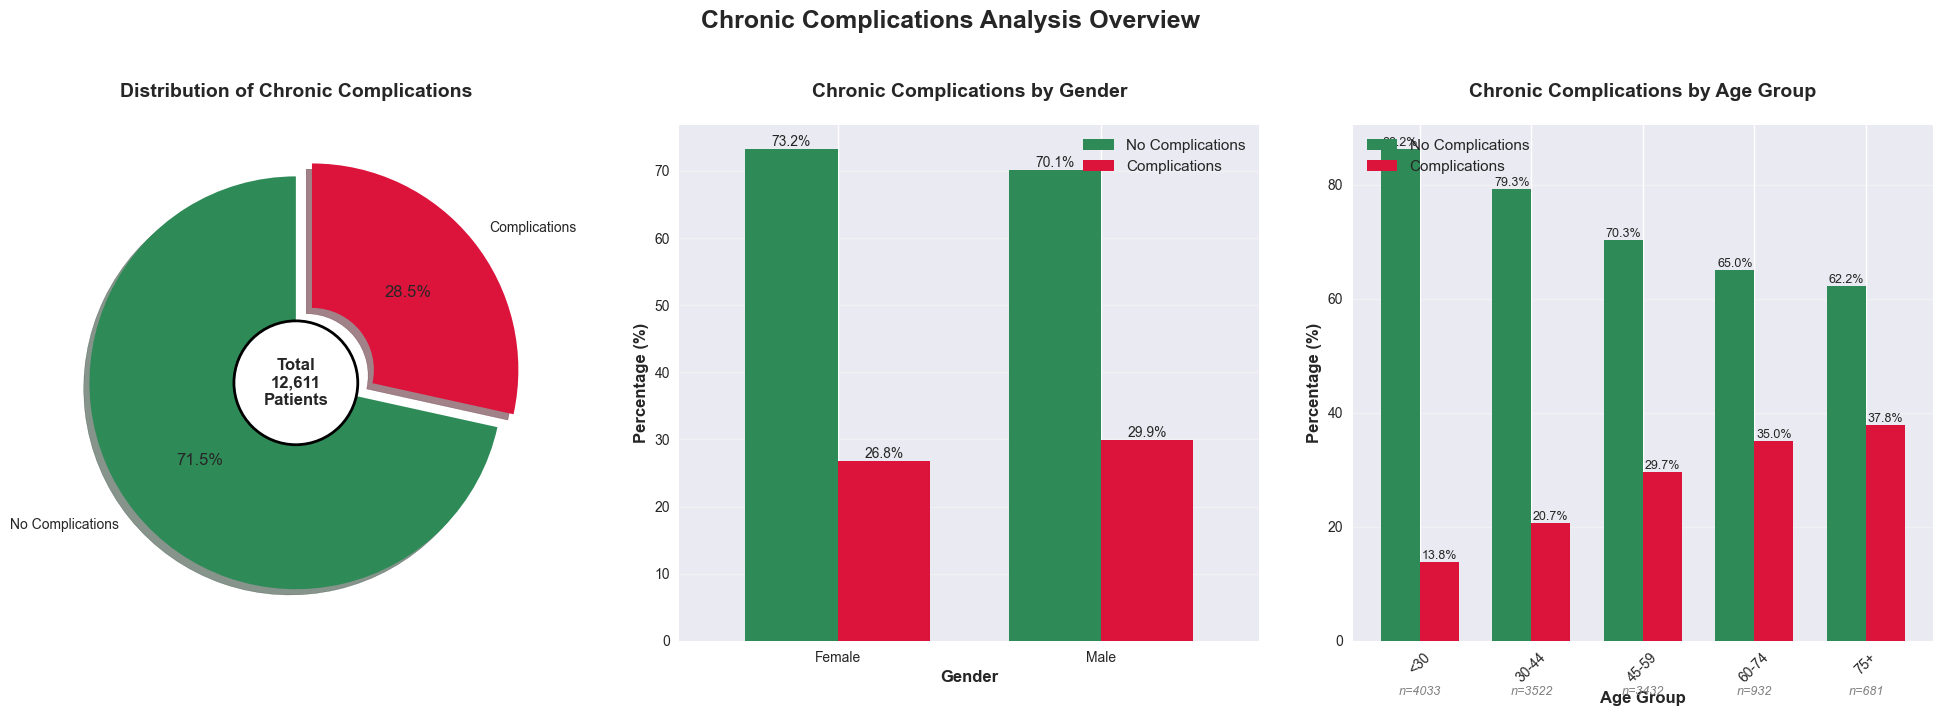


👥 2. Age and Demographics Analysis:
--------------------------------------------------


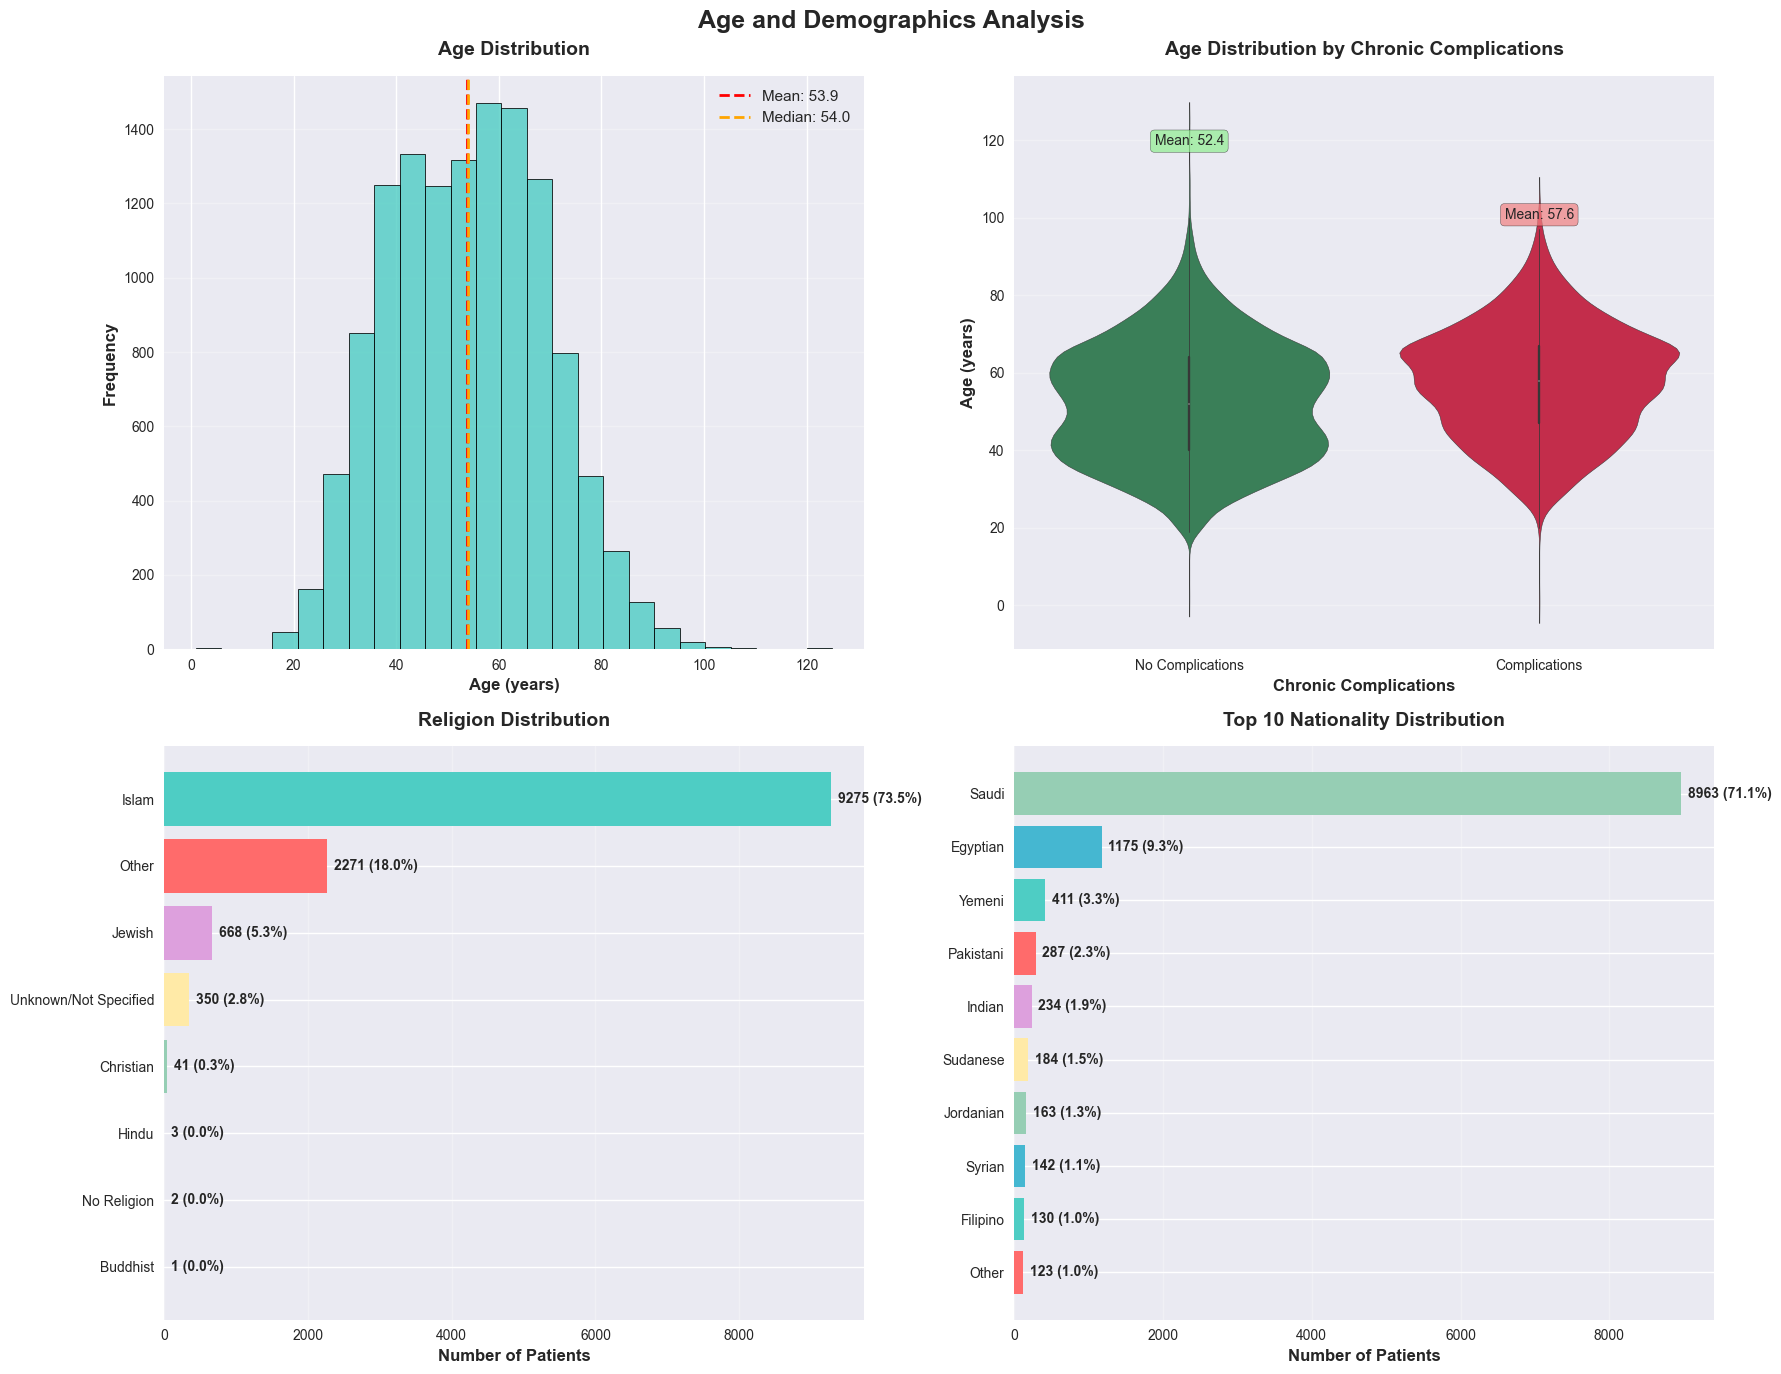


🩸 3. HBA1C Analysis:
--------------------------------------------------


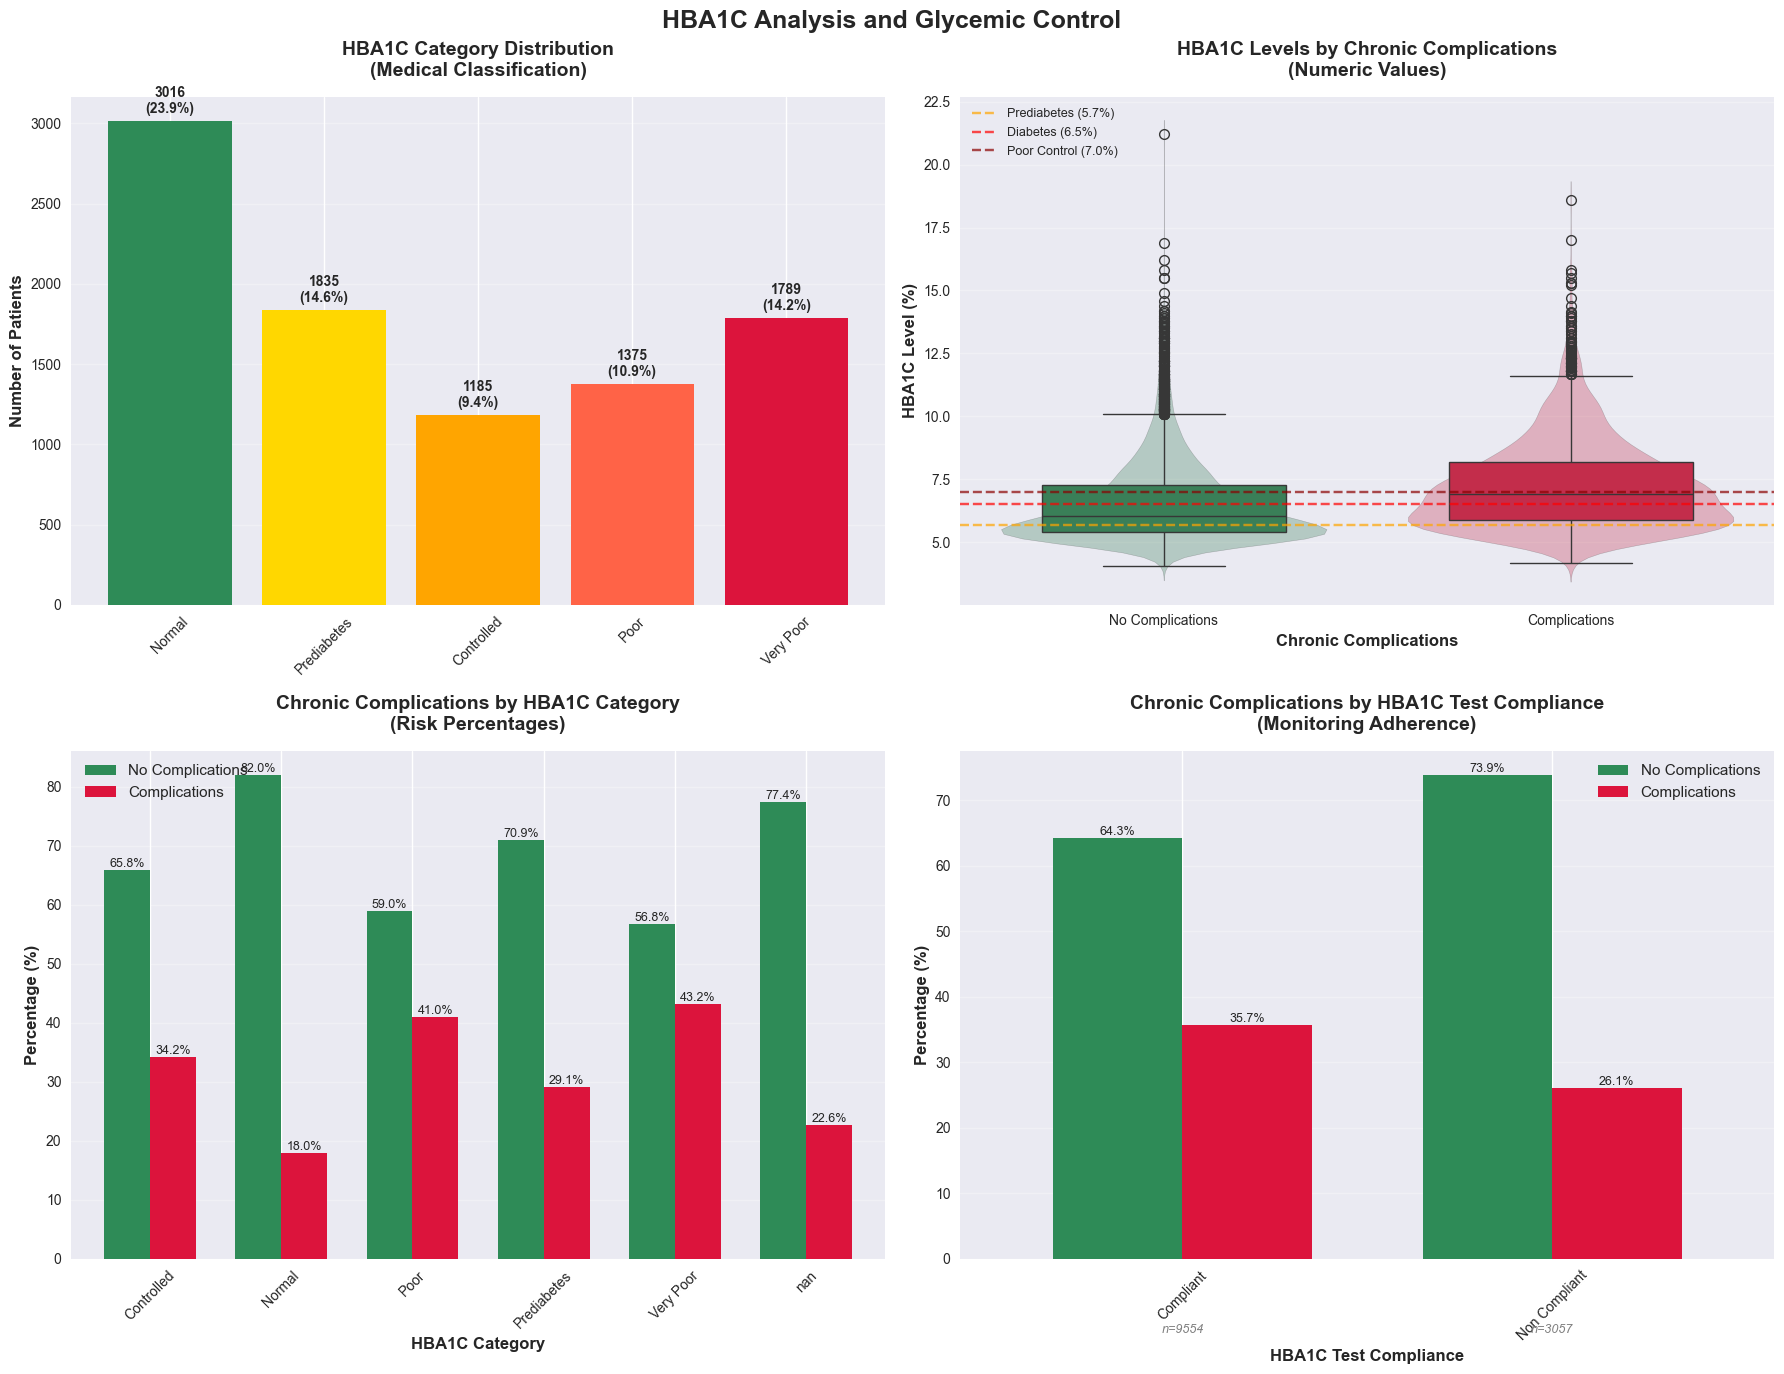


🏥 4. Comorbidity Analysis:
--------------------------------------------------


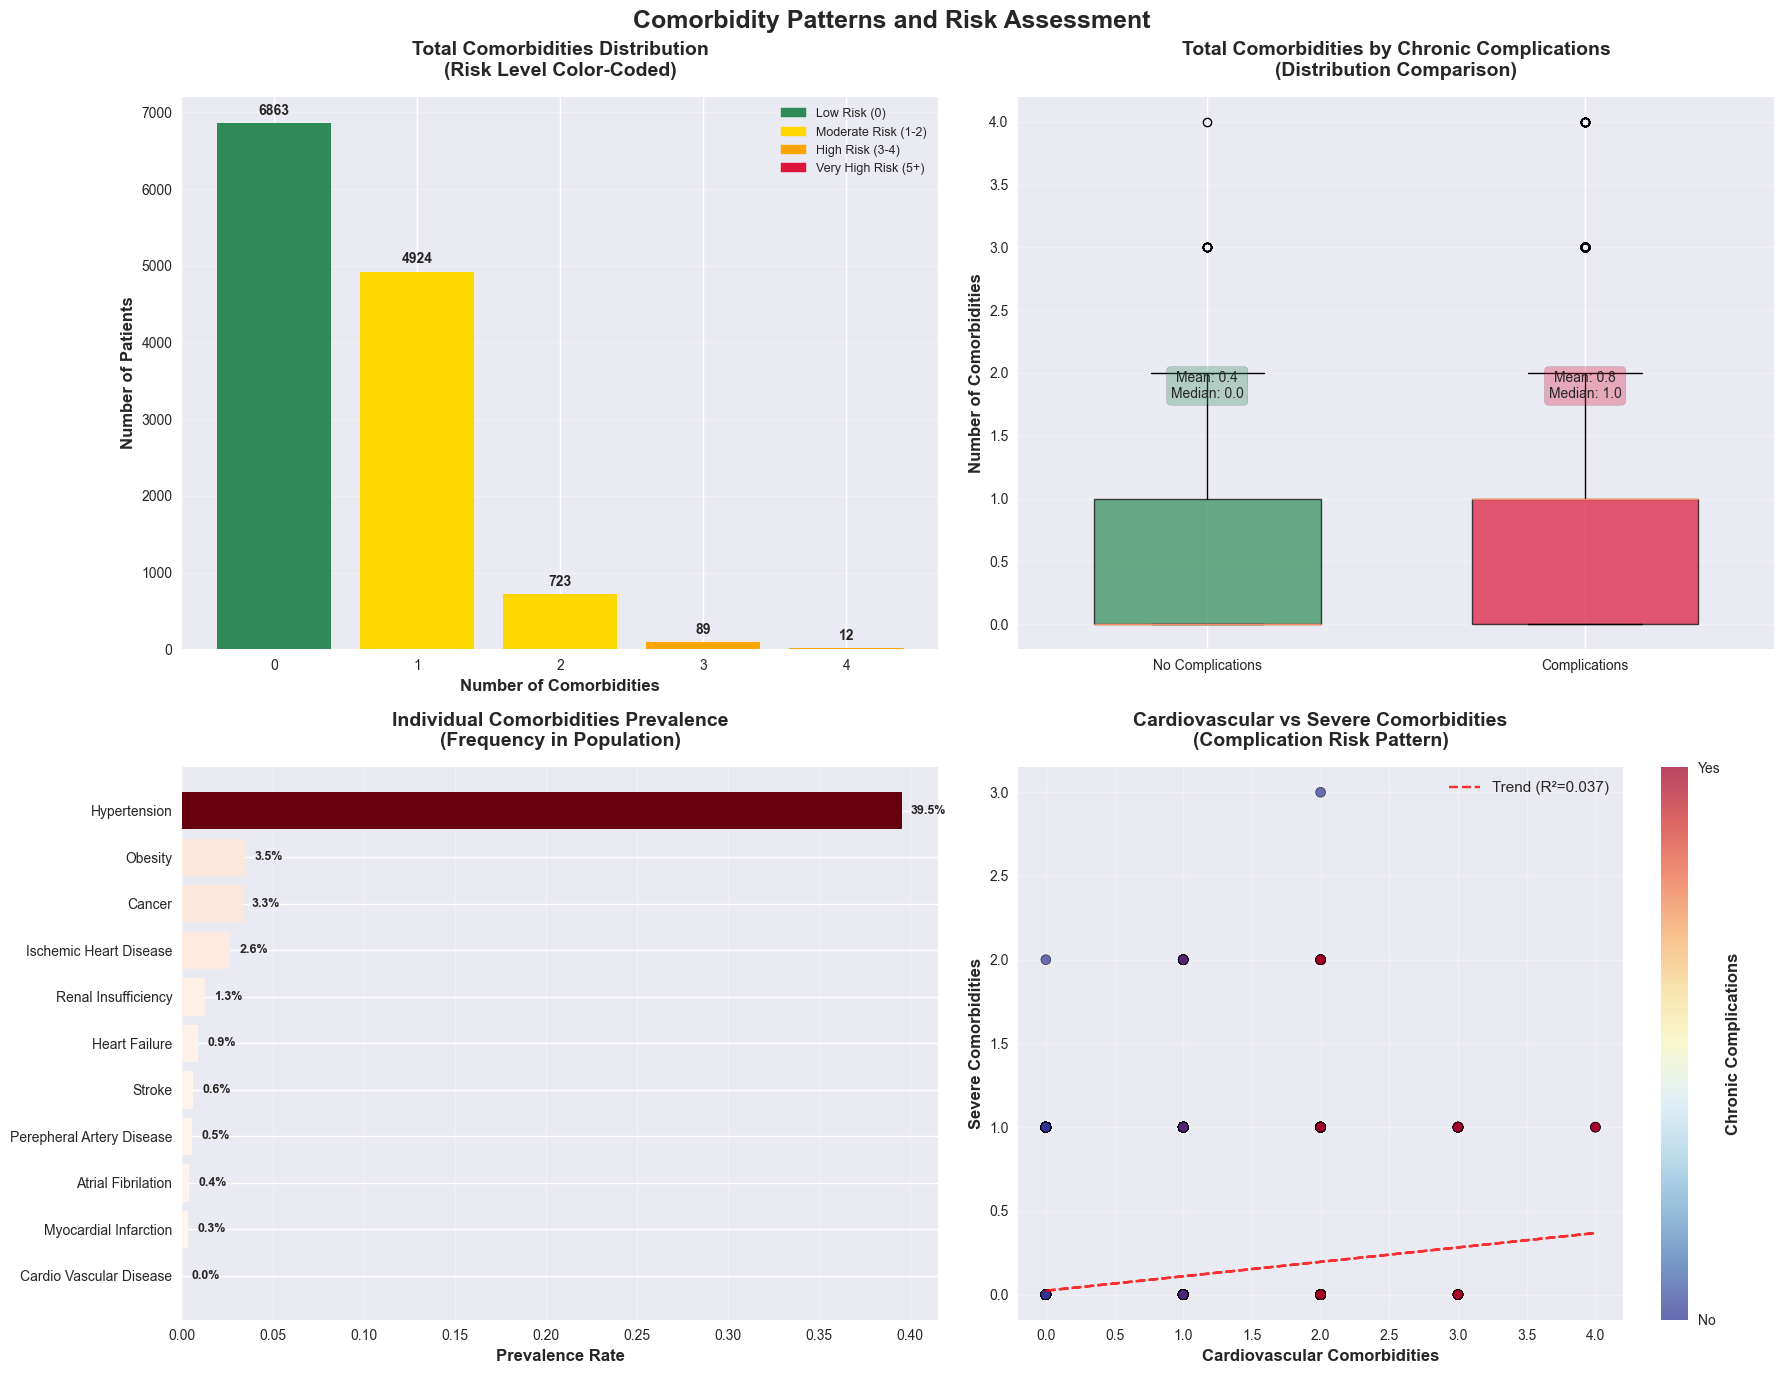


🏥 5. Healthcare Utilization Analysis:
--------------------------------------------------


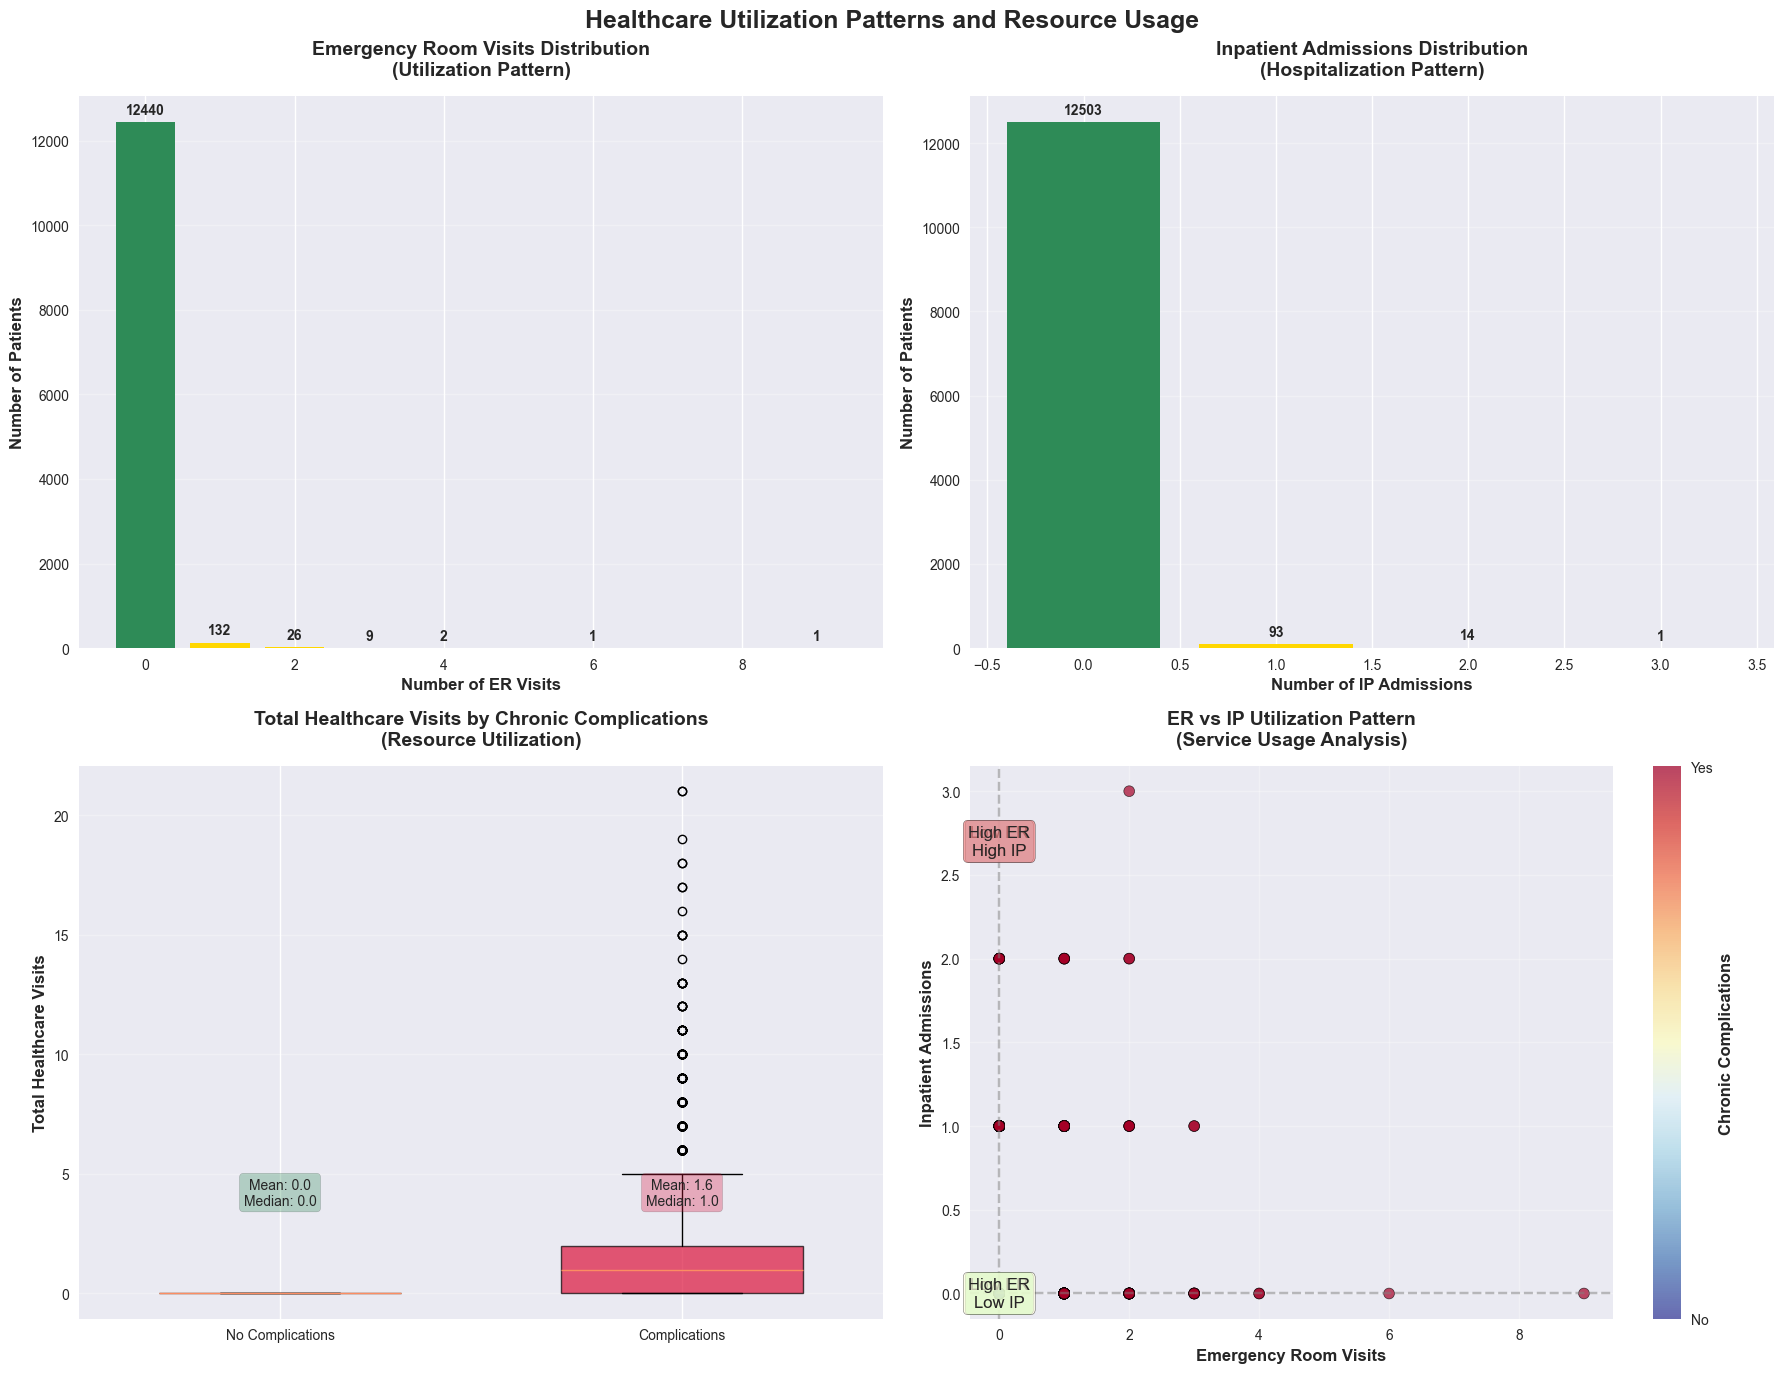


✅ Enhanced Exploratory Data Analysis completed!
📊 Professional visualizations saved to results/ directory
🎨 Enhanced charts with better styling, colors, and insights!
🔍 Ready for modeling with comprehensive understanding!


In [37]:
# Exploratory Data Analysis and Visualization
print("="*80)
print("EXPLORATORY DATA ANALYSIS AND VISUALIZATION")
print("="*80)

# Set up enhanced plotting environment
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")
plt.rcParams.update({
    'figure.figsize': (15, 10),
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 11,
    'figure.titlesize': 16
})

# Define consistent color palette
colors_binary = ['#2E8B57', '#DC143C']  # Sea Green, Crimson
colors_multi = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']

# 1. Target Variable Analysis
print("\n🎯 1. Target Variable Analysis:")
print("-" * 50)

fig, axes = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('Chronic Complications Analysis Overview', fontsize=18, fontweight='bold', y=1.02)

# Enhanced Target distribution with annotations
target_counts = df_clean['Chronic_flag'].value_counts()
total_patients = len(df_clean)

# Create a donut chart instead of pie
wedges, texts, autotexts = axes[0].pie(target_counts.values, 
                                      labels=['No Complications', 'Complications'], 
                                      autopct='%1.1f%%', 
                                      startangle=90, 
                                      colors=colors_binary,
                                      explode=(0, 0.1),
                                      shadow=True,
                                      wedgeprops=dict(width=0.7))

# Add center text with total count
centre_circle = plt.Circle((0,0), 0.3, fc='white', ec='black', linewidth=2)
axes[0].add_artist(centre_circle)
axes[0].text(0, 0, f'Total\n{total_patients:,}\nPatients', 
            ha='center', va='center', fontsize=12, fontweight='bold')

axes[0].set_title('Distribution of Chronic Complications', fontweight='bold', pad=20)

# Enhanced Target by Gender with values on bars
gender_chronic = pd.crosstab(df_clean['Gender'], df_clean['Chronic_flag'], normalize='index') * 100
bars = gender_chronic.plot(kind='bar', ax=axes[1], color=colors_binary, width=0.7)
axes[1].set_title('Chronic Complications by Gender', fontweight='bold', pad=20)
axes[1].set_xlabel('Gender', fontweight='bold')
axes[1].set_ylabel('Percentage (%)', fontweight='bold')
axes[1].legend(['No Complications', 'Complications'], loc='upper right')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', fontsize=10)

# Enhanced Target by Age Group with sample sizes
if 'Age_Group' in df_clean.columns:
    age_chronic = pd.crosstab(df_clean['Age_Group'], df_clean['Chronic_flag'], normalize='index') * 100
    age_counts = df_clean['Age_Group'].value_counts()
    
    bars = age_chronic.plot(kind='bar', ax=axes[2], color=colors_binary, width=0.7)
    axes[2].set_title('Chronic Complications by Age Group', fontweight='bold', pad=20)
    axes[2].set_xlabel('Age Group', fontweight='bold')
    axes[2].set_ylabel('Percentage (%)', fontweight='bold')
    axes[2].legend(['No Complications', 'Complications'], loc='upper left')
    axes[2].tick_params(axis='x', rotation=45)
    axes[2].grid(axis='y', alpha=0.3)
    
    # Add value labels and sample sizes
    for container in axes[2].containers:
        axes[2].bar_label(container, fmt='%.1f%%', fontsize=9)
    
    # Add sample size annotations
    for i, (age_group, count) in enumerate(age_counts.items()):
        axes[2].text(i, -8, f'n={count}', ha='center', va='top', fontsize=9, 
                    style='italic', color='gray')

plt.tight_layout()
plt.savefig('results/target_analysis_enhanced.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# 2. Age and Demographics Analysis
print("\n👥 2. Age and Demographics Analysis:")
print("-" * 50)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Age and Demographics Analysis', fontsize=18, fontweight='bold', y=0.98)

# Enhanced Age distribution with statistics overlay
axes[0,0].hist(df_clean['Age'], bins=25, color='#4ECDC4', alpha=0.8, edgecolor='black', linewidth=0.7)
axes[0,0].axvline(df_clean['Age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_clean["Age"].mean():.1f}')
axes[0,0].axvline(df_clean['Age'].median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {df_clean["Age"].median():.1f}')
axes[0,0].set_title('Age Distribution', fontweight='bold', pad=15)
axes[0,0].set_xlabel('Age (years)', fontweight='bold')
axes[0,0].set_ylabel('Frequency', fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(axis='y', alpha=0.3)

# Enhanced Age by Chronic flag with violin plot
sns.violinplot(data=df_clean, x='Chronic_flag', y='Age', ax=axes[0,1], 
               palette=colors_binary, inner='box')
axes[0,1].set_title('Age Distribution by Chronic Complications', fontweight='bold', pad=15)
axes[0,1].set_xlabel('Chronic Complications', fontweight='bold')
axes[0,1].set_ylabel('Age (years)', fontweight='bold')
axes[0,1].set_xticklabels(['No Complications', 'Complications'])
axes[0,1].grid(axis='y', alpha=0.3)

# Add statistical annotations
age_no_comp = df_clean[df_clean['Chronic_flag']==0]['Age']
age_comp = df_clean[df_clean['Chronic_flag']==1]['Age']
axes[0,1].text(0, age_no_comp.max()*0.95, f'Mean: {age_no_comp.mean():.1f}', 
              ha='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.7))
axes[0,1].text(1, age_comp.max()*0.95, f'Mean: {age_comp.mean():.1f}', 
              ha='center', fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor='lightcoral', alpha=0.7))

# Enhanced Religion distribution with horizontal bar chart
religion_counts = df_clean['Religion'].value_counts().sort_values(ascending=True)
bars = axes[1,0].barh(religion_counts.index, religion_counts.values, color=colors_multi[:len(religion_counts)])
axes[1,0].set_title('Religion Distribution', fontweight='bold', pad=15)
axes[1,0].set_xlabel('Number of Patients', fontweight='bold')
axes[1,0].grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (religion, count) in enumerate(religion_counts.items()):
    axes[1,0].text(count + max(religion_counts.values)*0.01, i, 
                  f'{count} ({count/len(df_clean)*100:.1f}%)', 
                  va='center', fontsize=10, fontweight='bold')

# Enhanced Nationality distribution with horizontal bar chart - Top 10 only
nationality_counts = df_clean['Nationality'].value_counts().head(10).sort_values(ascending=True)
bars = axes[1,1].barh(nationality_counts.index, nationality_counts.values, 
                     color=colors_multi[:len(nationality_counts)])
axes[1,1].set_title('Top 10 Nationality Distribution', fontweight='bold', pad=15)
axes[1,1].set_xlabel('Number of Patients', fontweight='bold')
axes[1,1].grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (nationality, count) in enumerate(nationality_counts.items()):
    axes[1,1].text(count + max(nationality_counts.values)*0.01, i, 
                  f'{count} ({count/len(df_clean)*100:.1f}%)', 
                  va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('results/demographics_analysis_enhanced.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# 3. HBA1C Analysis
print("\n🩸 3. HBA1C Analysis:")
print("-" * 50)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('HBA1C Analysis and Glycemic Control', fontsize=18, fontweight='bold', y=0.98)

# Enhanced HBA1C Category distribution with medical thresholds
hba1c_cat_counts = df_clean['HBA1C_Category'].value_counts()
category_order = ['Normal', 'Prediabetes', 'Controlled', 'Poor', 'Very Poor', 'No Test']
category_colors = ['#2E8B57', '#FFD700', '#FFA500', '#FF6347', '#DC143C', '#C0C0C0']

# Reorder and plot
ordered_counts = []
ordered_colors = []
for cat in category_order:
    if cat in hba1c_cat_counts.index:
        ordered_counts.append(hba1c_cat_counts[cat])
        ordered_colors.append(category_colors[category_order.index(cat)])

bars = axes[0,0].bar(range(len(ordered_counts)), ordered_counts, color=ordered_colors)
axes[0,0].set_xticks(range(len(ordered_counts)))
axes[0,0].set_xticklabels([cat for cat in category_order if cat in hba1c_cat_counts.index], rotation=45)
axes[0,0].set_title('HBA1C Category Distribution\n(Medical Classification)', fontweight='bold', pad=15)
axes[0,0].set_ylabel('Number of Patients', fontweight='bold')
axes[0,0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, count in zip(bars, ordered_counts):
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + max(ordered_counts)*0.01,
                  f'{count}\n({count/len(df_clean)*100:.1f}%)',
                  ha='center', va='bottom', fontsize=10, fontweight='bold')

# Enhanced HBA1C by Chronic flag with statistical comparison
if 'HBA1C_Numeric' in df_clean.columns:
    hba1c_data = df_clean[df_clean['HBA1C_Numeric'].notna()]
    
    sns.boxplot(data=hba1c_data, x='Chronic_flag', y='HBA1C_Numeric', ax=axes[0,1], 
                palette=colors_binary, width=0.6)
    
    # Add violin overlay for density
    sns.violinplot(data=hba1c_data, x='Chronic_flag', y='HBA1C_Numeric', ax=axes[0,1], 
                   palette=colors_binary, alpha=0.3, inner=None)
    
    axes[0,1].set_title('HBA1C Levels by Chronic Complications\n(Numeric Values)', fontweight='bold', pad=15)
    axes[0,1].set_xlabel('Chronic Complications', fontweight='bold')
    axes[0,1].set_ylabel('HBA1C Level (%)', fontweight='bold')
    axes[0,1].set_xticklabels(['No Complications', 'Complications'])
    axes[0,1].grid(axis='y', alpha=0.3)
    
    # Add reference lines for medical thresholds
    axes[0,1].axhline(y=5.7, color='orange', linestyle='--', alpha=0.7, label='Prediabetes (5.7%)')
    axes[0,1].axhline(y=6.5, color='red', linestyle='--', alpha=0.7, label='Diabetes (6.5%)')
    axes[0,1].axhline(y=7.0, color='darkred', linestyle='--', alpha=0.7, label='Poor Control (7.0%)')
    axes[0,1].legend(loc='upper left', fontsize=9)

# Enhanced HBA1C Category vs Chronic complications with risk ratios
hba1c_chronic = pd.crosstab(df_clean['HBA1C_Category'], df_clean['Chronic_flag'], normalize='index') * 100
bars = hba1c_chronic.plot(kind='bar', ax=axes[1,0], color=colors_binary, width=0.7)
axes[1,0].set_title('Chronic Complications by HBA1C Category\n(Risk Percentages)', fontweight='bold', pad=15)
axes[1,0].set_xlabel('HBA1C Category', fontweight='bold')
axes[1,0].set_ylabel('Percentage (%)', fontweight='bold')
axes[1,0].legend(['No Complications', 'Complications'], loc='upper left')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(axis='y', alpha=0.3)

# Add value labels
for container in axes[1,0].containers:
    axes[1,0].bar_label(container, fmt='%.1f%%', fontsize=9)

# Enhanced HBA1C Test Compliance with sample sizes
compliance_chronic = pd.crosstab(df_clean['HBA1C test Compliance'], df_clean['Chronic_flag'], normalize='index') * 100
compliance_counts = df_clean['HBA1C test Compliance'].value_counts()

bars = compliance_chronic.plot(kind='bar', ax=axes[1,1], color=colors_binary, width=0.7)
axes[1,1].set_title('Chronic Complications by HBA1C Test Compliance\n(Monitoring Adherence)', fontweight='bold', pad=15)
axes[1,1].set_xlabel('HBA1C Test Compliance', fontweight='bold')
axes[1,1].set_ylabel('Percentage (%)', fontweight='bold')
axes[1,1].legend(['No Complications', 'Complications'], loc='upper right')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(axis='y', alpha=0.3)

# Add value labels and sample sizes
for container in axes[1,1].containers:
    axes[1,1].bar_label(container, fmt='%.1f%%', fontsize=9)

# Add sample sizes below bars
for i, (compliance, count) in enumerate(compliance_counts.items()):
    axes[1,1].text(i, -10, f'n={count}', ha='center', va='top', fontsize=9, 
                  style='italic', color='gray')

plt.tight_layout()
plt.savefig('results/hba1c_analysis_enhanced.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# 4. Comorbidity Analysis
print("\n🏥 4. Comorbidity Analysis:")
print("-" * 50)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Comorbidity Patterns and Risk Assessment', fontsize=18, fontweight='bold', y=0.98)

# Enhanced Total Comorbidities distribution with risk zones
comorbidity_counts = df_clean['Total_Comorbidities'].value_counts().sort_index()
max_comorbidities = comorbidity_counts.index.max()

# Color code based on risk levels
colors_risk = []
for count in comorbidity_counts.index:
    if count == 0:
        colors_risk.append('#2E8B57')  # Green - Low risk
    elif count <= 2:
        colors_risk.append('#FFD700')  # Yellow - Moderate risk
    elif count <= 4:
        colors_risk.append('#FFA500')  # Orange - High risk
    else:
        colors_risk.append('#DC143C')  # Red - Very high risk

bars = axes[0,0].bar(comorbidity_counts.index, comorbidity_counts.values, color=colors_risk)
axes[0,0].set_title('Total Comorbidities Distribution\n(Risk Level Color-Coded)', fontweight='bold', pad=15)
axes[0,0].set_xlabel('Number of Comorbidities', fontweight='bold')
axes[0,0].set_ylabel('Number of Patients', fontweight='bold')
axes[0,0].grid(axis='y', alpha=0.3)

# Add value labels and risk zones
for bar, count in zip(bars, comorbidity_counts.values):
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + max(comorbidity_counts.values)*0.01,
                  f'{count}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add legend for risk zones
risk_legend = [plt.Rectangle((0,0),1,1, color='#2E8B57', label='Low Risk (0)'),
               plt.Rectangle((0,0),1,1, color='#FFD700', label='Moderate Risk (1-2)'),
               plt.Rectangle((0,0),1,1, color='#FFA500', label='High Risk (3-4)'),
               plt.Rectangle((0,0),1,1, color='#DC143C', label='Very High Risk (5+)')]
axes[0,0].legend(handles=risk_legend, loc='upper right', fontsize=9)

# Enhanced Comorbidities vs Chronic flag with detailed statistics
box_plot = axes[0,1].boxplot([df_clean[df_clean['Chronic_flag']==0]['Total_Comorbidities'],
                             df_clean[df_clean['Chronic_flag']==1]['Total_Comorbidities']],
                            labels=['No Complications', 'Complications'],
                            patch_artist=True, widths=0.6)

# Color the boxes
box_plot['boxes'][0].set_facecolor(colors_binary[0])
box_plot['boxes'][1].set_facecolor(colors_binary[1])
box_plot['boxes'][0].set_alpha(0.7)
box_plot['boxes'][1].set_alpha(0.7)

axes[0,1].set_title('Total Comorbidities by Chronic Complications\n(Distribution Comparison)', fontweight='bold', pad=15)
axes[0,1].set_ylabel('Number of Comorbidities', fontweight='bold')
axes[0,1].grid(axis='y', alpha=0.3)

# Add statistical annotations
comorbidity_stats = df_clean.groupby('Chronic_flag')['Total_Comorbidities'].agg(['mean', 'median', 'std'])
for i, flag in enumerate([0, 1]):
    stats = comorbidity_stats.loc[flag]
    axes[0,1].text(i+1, comorbidity_stats['mean'].max() + 1,
                  f'Mean: {stats["mean"]:.1f}\nMedian: {stats["median"]:.1f}',
                  ha='center', va='bottom', fontsize=10, 
                  bbox=dict(boxstyle="round,pad=0.3", 
                           facecolor=colors_binary[i], alpha=0.3))

# Enhanced Individual comorbidities prevalence with risk indicators
individual_comorbidities = df_clean[available_comorbidity_cols].mean().sort_values(ascending=True)
risk_colors = plt.cm.Reds(individual_comorbidities.values / individual_comorbidities.max())

bars = axes[1,0].barh(range(len(individual_comorbidities)), individual_comorbidities.values, 
                     color=risk_colors)
axes[1,0].set_yticks(range(len(individual_comorbidities)))
axes[1,0].set_yticklabels(individual_comorbidities.index, fontsize=10)
axes[1,0].set_title('Individual Comorbidities Prevalence\n(Frequency in Population)', fontweight='bold', pad=15)
axes[1,0].set_xlabel('Prevalence Rate', fontweight='bold')
axes[1,0].grid(axis='x', alpha=0.3)

# Add percentage labels
for i, (comorbidity, prevalence) in enumerate(individual_comorbidities.items()):
    axes[1,0].text(prevalence + 0.005, i, f'{prevalence:.1%}', 
                  va='center', fontsize=9, fontweight='bold')

# Enhanced CV vs Severe Comorbidities scatter with density
scatter = axes[1,1].scatter(df_clean['CV_Comorbidities'], df_clean['Severe_Comorbidities'], 
                           c=df_clean['Chronic_flag'], cmap='RdYlBu_r', alpha=0.7, s=50,
                           edgecolors='black', linewidth=0.5)
axes[1,1].set_title('Cardiovascular vs Severe Comorbidities\n(Complication Risk Pattern)', fontweight='bold', pad=15)
axes[1,1].set_xlabel('Cardiovascular Comorbidities', fontweight='bold')
axes[1,1].set_ylabel('Severe Comorbidities', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=axes[1,1])
cbar.set_label('Chronic Complications', fontweight='bold')
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['No', 'Yes'])

# Add trend line
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df_clean['CV_Comorbidities'], 
                                                              df_clean['Severe_Comorbidities'])
line = slope * df_clean['CV_Comorbidities'] + intercept
axes[1,1].plot(df_clean['CV_Comorbidities'], line, 'r--', alpha=0.8, 
              label=f'Trend (R²={r_value**2:.3f})')
axes[1,1].legend()

plt.tight_layout()
plt.savefig('results/comorbidity_analysis_enhanced.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# 5. Healthcare Utilization Analysis
print("\n🏥 5. Healthcare Utilization Analysis:")
print("-" * 50)

if available_healthcare_cols:
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    fig.suptitle('Healthcare Utilization Patterns and Resource Usage', fontsize=18, fontweight='bold', y=0.98)
    
    # Enhanced ER visits distribution with utilization zones
    if '# ER_befor_Chr' in df_clean.columns:
        er_counts = df_clean['# ER_befor_Chr'].value_counts().sort_index()
        
        # Color code based on utilization levels
        colors_utilization = []
        for visits in er_counts.index:
            if visits == 0:
                colors_utilization.append('#2E8B57')  # Green - No utilization
            elif visits <= 2:
                colors_utilization.append('#FFD700')  # Yellow - Low utilization
            elif visits <= 5:
                colors_utilization.append('#FFA500')  # Orange - High utilization
            else:
                colors_utilization.append('#DC143C')  # Red - Very high utilization
        
        bars = axes[0,0].bar(er_counts.index, er_counts.values, color=colors_utilization)
        axes[0,0].set_title('Emergency Room Visits Distribution\n(Utilization Pattern)', fontweight='bold', pad=15)
        axes[0,0].set_xlabel('Number of ER Visits', fontweight='bold')
        axes[0,0].set_ylabel('Number of Patients', fontweight='bold')
        axes[0,0].grid(axis='y', alpha=0.3)
        
        # Add value labels
        for bar, count in zip(bars, er_counts.values):
            height = bar.get_height()
            axes[0,0].text(bar.get_x() + bar.get_width()/2., height + max(er_counts.values)*0.01,
                          f'{count}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Enhanced IP admissions distribution
    if '# IP_bef_chr' in df_clean.columns:
        ip_counts = df_clean['# IP_bef_chr'].value_counts().sort_index()
        
        # Color code based on admission frequency
        colors_ip = []
        for admissions in ip_counts.index:
            if admissions == 0:
                colors_ip.append('#2E8B57')  # Green - No admissions
            elif admissions <= 1:
                colors_ip.append('#FFD700')  # Yellow - Low admissions
            elif admissions <= 3:
                colors_ip.append('#FFA500')  # Orange - High admissions
            else:
                colors_ip.append('#DC143C')  # Red - Very high admissions
        
        bars = axes[0,1].bar(ip_counts.index, ip_counts.values, color=colors_ip)
        axes[0,1].set_title('Inpatient Admissions Distribution\n(Hospitalization Pattern)', fontweight='bold', pad=15)
        axes[0,1].set_xlabel('Number of IP Admissions', fontweight='bold')
        axes[0,1].set_ylabel('Number of Patients', fontweight='bold')
        axes[0,1].grid(axis='y', alpha=0.3)
        
        # Add value labels
        for bar, count in zip(bars, ip_counts.values):
            height = bar.get_height()
            axes[0,1].text(bar.get_x() + bar.get_width()/2., height + max(ip_counts.values)*0.01,
                          f'{count}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Enhanced Healthcare utilization by chronic flag with statistical comparison
    if 'Total_Healthcare_Visits' in df_clean.columns:
        box_plot = axes[1,0].boxplot([df_clean[df_clean['Chronic_flag']==0]['Total_Healthcare_Visits'],
                                     df_clean[df_clean['Chronic_flag']==1]['Total_Healthcare_Visits']],
                                    labels=['No Complications', 'Complications'],
                                    patch_artist=True, widths=0.6)
        
        # Color the boxes
        box_plot['boxes'][0].set_facecolor(colors_binary[0])
        box_plot['boxes'][1].set_facecolor(colors_binary[1])
        box_plot['boxes'][0].set_alpha(0.7)
        box_plot['boxes'][1].set_alpha(0.7)
        
        axes[1,0].set_title('Total Healthcare Visits by Chronic Complications\n(Resource Utilization)', fontweight='bold', pad=15)
        axes[1,0].set_ylabel('Total Healthcare Visits', fontweight='bold')
        axes[1,0].grid(axis='y', alpha=0.3)
        
        # Add statistical annotations
        utilization_stats = df_clean.groupby('Chronic_flag')['Total_Healthcare_Visits'].agg(['mean', 'median'])
        for i, flag in enumerate([0, 1]):
            stats = utilization_stats.loc[flag]
            axes[1,0].text(i+1, utilization_stats['mean'].max() + 2,
                          f'Mean: {stats["mean"]:.1f}\nMedian: {stats["median"]:.1f}',
                          ha='center', va='bottom', fontsize=10, 
                          bbox=dict(boxstyle="round,pad=0.3", 
                                   facecolor=colors_binary[i], alpha=0.3))
    
    # Enhanced ER vs IP utilization with quadrant analysis
    if all(col in df_clean.columns for col in ['# ER_befor_Chr', '# IP_bef_chr']):
        scatter = axes[1,1].scatter(df_clean['# ER_befor_Chr'], df_clean['# IP_bef_chr'], 
                                   c=df_clean['Chronic_flag'], cmap='RdYlBu_r', alpha=0.7, s=60,
                                   edgecolors='black', linewidth=0.5)
        axes[1,1].set_title('ER vs IP Utilization Pattern\n(Service Usage Analysis)', fontweight='bold', pad=15)
        axes[1,1].set_xlabel('Emergency Room Visits', fontweight='bold')
        axes[1,1].set_ylabel('Inpatient Admissions', fontweight='bold')
        axes[1,1].grid(True, alpha=0.3)
        
        # Add quadrant lines
        er_median = df_clean['# ER_befor_Chr'].median()
        ip_median = df_clean['# IP_bef_chr'].median()
        axes[1,1].axvline(er_median, color='gray', linestyle='--', alpha=0.5)
        axes[1,1].axhline(ip_median, color='gray', linestyle='--', alpha=0.5)
        
        # Add quadrant labels
        max_er = df_clean['# ER_befor_Chr'].max()
        max_ip = df_clean['# IP_bef_chr'].max()
        axes[1,1].text(er_median/2, max_ip*0.9, 'Low ER\nHigh IP', ha='center', va='center',
                      bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.7))
        axes[1,1].text(er_median*1.5, max_ip*0.9, 'High ER\nHigh IP', ha='center', va='center',
                      bbox=dict(boxstyle="round,pad=0.3", facecolor='lightcoral', alpha=0.7))
        axes[1,1].text(er_median/2, ip_median/2, 'Low ER\nLow IP', ha='center', va='center',
                      bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.7))
        axes[1,1].text(er_median*1.5, ip_median/2, 'High ER\nLow IP', ha='center', va='center',
                      bbox=dict(boxstyle="round,pad=0.3", facecolor='lightyellow', alpha=0.7))
        
        # Add colorbar
        cbar = plt.colorbar(scatter, ax=axes[1,1])
        cbar.set_label('Chronic Complications', fontweight='bold')
        cbar.set_ticks([0, 1])
        cbar.set_ticklabels(['No', 'Yes'])
    
    plt.tight_layout()
    plt.savefig('results/healthcare_utilization_analysis_enhanced.png', dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()

print(f"\n✅ Enhanced Exploratory Data Analysis completed!")
print(f"📊 Professional visualizations saved to results/ directory")
print(f"🎨 Enhanced charts with better styling, colors, and insights!")
print(f"🔍 Ready for modeling with comprehensive understanding!")

## 7. Data Preparation for Modeling

Preparing the final dataset for machine learning by selecting relevant features, encoding categorical variables, handling missing values, and splitting the data into training and testing sets.

## 📁 Save Best Model and Generate Predictions

After selecting the best performing model, we save it for future use and generate predictions for new patients. This is crucial for deploying the model in a clinical setting.

In [10]:
# Generate Predictions for New Patients
import joblib
from datetime import datetime
import pandas as pd

print("="*80)
print("GENERATE PREDICTIONS FOR NEW PATIENTS")
print("="*80)

# 1. Save the best trained model with timestamp
print("\n💾 1. Saving Best Model:")
print("-" * 50)

# Create timestamp for file naming
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save the best model with timestamp
model_filename = f'results/best_model_{timestamp}.pkl'
joblib.dump(best_model, model_filename)
print(f"✅ Best model saved to: {model_filename}")

# 2. Prepare Prediction Data
print("\n📝 2. Preparing Prediction Data:")
print("-" * 50)

def prepare_prediction_data(df_pred, label_encoders_dict):
    """
    Apply the same preprocessing pipeline to prediction data
    """
    print(f"Input prediction data shape: {df_pred.shape}")
    
    # Create a copy
    df_pred_clean = df_pred.copy()
    
    # 1. Clean categorical variables (same as training)
    df_pred_clean['Religion'] = df_pred_clean['Religion'].str.strip()
    df_pred_clean['Religion'] = df_pred_clean['Religion'].replace({
        'ISLAM': 'Islam', 'MUSLIM': 'Islam', 'CHRISTIAN': 'Christian'
    })
    
    df_pred_clean['Nationality'] = df_pred_clean['Nationality'].str.strip()
    df_pred_clean['Nationality'] = df_pred_clean['Nationality'].replace({'SAUDI': 'Saudi'})
    
    if 'HBA1C test Compliance' in df_pred_clean.columns:
        df_pred_clean['HBA1C test Compliance'] = df_pred_clean['HBA1C test Compliance'].str.strip()
    
    # 2. Handle HBA1C results
    df_pred_clean['HBA1C_Numeric'] = pd.to_numeric(df_pred_clean['Avg_HBA1C Results'], errors='coerce')
    df_pred_clean['HBA1C_Test_Performed'] = (df_pred_clean['Avg_HBA1C Results'] != "Haven't performed Before").astype(int)
    
    # HBA1C categories
    df_pred_clean['HBA1C_Category'] = pd.cut(
        df_pred_clean['HBA1C_Numeric'], 
        bins=[0, 5.7, 6.4, 7.0, 8.0, 100], 
        labels=['Normal', 'Prediabetes', 'Controlled', 'Poor', 'Very Poor'],
        include_lowest=True
    )
    df_pred_clean['HBA1C_Category'] = df_pred_clean['HBA1C_Category'].astype(str).fillna('No Test')
    
    # 3. Calculate age
    if 'D_Of_Birth' in df_pred_clean.columns:
        df_pred_clean['Age'] = pd.to_datetime('today').year - pd.to_datetime(df_pred_clean['D_Of_Birth'], errors='coerce').dt.year
    
    # 4. Create comorbidity features
    available_comorbidity_cols_pred = [col for col in available_comorbidity_cols if col in df_pred_clean.columns]
    if available_comorbidity_cols_pred:
        df_pred_clean['Total_Comorbidities'] = df_pred_clean[available_comorbidity_cols_pred].sum(axis=1)
        
        cv_cols_pred = [col for col in available_cv_comorbidities if col in df_pred_clean.columns]
        df_pred_clean['CV_Comorbidities'] = df_pred_clean[cv_cols_pred].sum(axis=1)
        
        severe_cols_pred = [col for col in available_severe_comorbidities if col in df_pred_clean.columns]
        df_pred_clean['Severe_Comorbidities'] = df_pred_clean[severe_cols_pred].sum(axis=1)
    
    # 5. Healthcare utilization features
    healthcare_cols_pred = [col for col in healthcare_features if col in df_pred_clean.columns]
    if healthcare_cols_pred:
        df_pred_clean['Total_Healthcare_Visits'] = df_pred_clean[healthcare_cols_pred].sum(axis=1)
    
    # 6. Encode categorical variables using training encoders
    for col, encoder in label_encoders.items():
        if col in df_pred_clean.columns:
            # Handle unseen categories
            def safe_transform(x):
                try:
                    return encoder.transform([str(x)])[0]
                except ValueError:
                    # Return the most frequent class for unseen categories
                    return encoder.transform([encoder.classes_[0]])[0]
            
            df_pred_clean[f'{col}_Encoded'] = df_pred_clean[col].apply(safe_transform)
    
    print(f"Processed prediction data shape: {df_pred_clean.shape}")
    return df_pred_clean

# Apply preprocessing to prediction data
df_pred_processed = prepare_prediction_data(df_predict, label_encoders)

# 3. Extract Features for Prediction
print("\n🎯 3. Extracting Features for Prediction:")
print("-" * 50)

# Create feature matrix for prediction
X_pred = pd.DataFrame()

for feature in modeling_features:
    if feature in df_pred_processed.columns:
        X_pred[feature] = df_pred_processed[feature]
    else:
        # Fill missing features with default values (0 for most cases)
        X_pred[feature] = 0
        print(f"⚠️ Feature '{feature}' not found, filled with 0")

print(f"Prediction features shape: {X_pred.shape}")
print(f"Features aligned with training: {list(X_pred.columns) == modeling_features}")

# Handle missing values in prediction data
X_pred_filled = X_pred.fillna(X_pred.mean())

print(f"Missing values handled: {X_pred.isnull().sum().sum()} → {X_pred_filled.isnull().sum().sum()}")

# 4. Generate Predictions
print("\n🔮 4. Generating Predictions:")
print("-" * 50)

# Use the best model to make predictions
if best_model_name in ['SVM', 'Logistic Regression']:
    # Scale features for these models
    X_pred_scaled = scaler.transform(X_pred_filled)
    predictions = best_model.predict(X_pred_scaled)
    probabilities = best_model.predict_proba(X_pred_scaled)[:, 1]
else:
    # Use original features for tree-based models
    predictions = best_model.predict(X_pred_filled)
    probabilities = best_model.predict_proba(X_pred_filled)[:, 1]

print(f"✅ Predictions generated for {len(predictions)} patients")

# 5. Create Results DataFrame
print("\n📊 5. Creating Results DataFrame:")
print("-" * 50)

# Create the required output format
results_df = pd.DataFrame({
    'Unique_Identifier': df_predict['Unique_Identifier'],
    'Chronic_flag': predictions
})

# Add probability for additional insights (optional)
results_detailed_df = pd.DataFrame({
    'Unique_Identifier': df_predict['Unique_Identifier'],
    'Chronic_flag': predictions,
    'Probability': probabilities
})

print(f"Results DataFrame shape: {results_df.shape}")
print(f"Required columns: {list(results_df.columns)}")

# Show prediction summary
pred_summary = results_df['Chronic_flag'].value_counts()
print(f"\nPrediction Summary:")
print(f"No complications (0): {pred_summary[0]} ({pred_summary[0]/len(results_df)*100:.1f}%)")
print(f"Complications (1): {pred_summary[1]} ({pred_summary[1]/len(results_df)*100:.1f}%)")

# 6. Save Results with Timestamp
print("\n💾 6. Saving Results:")
print("-" * 50)

# Create CSV filenames with timestamp
predictions_filename = f'results/predictions_{timestamp}.csv'
predictions_detailed_filename = f'results/predictions_detailed_{timestamp}.csv'

# Save the required CSV file (just ID and prediction)
results_df.to_csv(predictions_filename, index=False)
print(f"✅ Main predictions saved to: {predictions_filename}")

# Save detailed results with probabilities
results_detailed_df.to_csv(predictions_detailed_filename, index=False)
print(f"✅ Detailed predictions saved to: {predictions_detailed_filename}")

# Also save without timestamp for easy access
results_df.to_csv('results/predictions.csv', index=False)
results_detailed_df.to_csv('results/predictions_detailed.csv', index=False)
print(f"✅ Current predictions also saved without timestamp")

# Display first few predictions
print(f"\nFirst 10 predictions:")
print(results_detailed_df.head(10).to_string(index=False))

print(f"\n✅ Predictions generation completed!")
print(f"📋 CSV files ready:")
print(f"   - Latest: {predictions_filename}")
print(f"   - Detailed: {predictions_detailed_filename}")
print(f"   - Current: results/predictions.csv")

GENERATE PREDICTIONS FOR NEW PATIENTS

💾 1. Saving Best Model:
--------------------------------------------------


NameError: name 'best_model' is not defined

## 📋 Results Summary and Clinical Insights

After completing the analysis and model building, we summarize our key findings and insights about factors that predict chronic complications in diabetes patients. This section addresses the project's main objective of understanding what factors are most relevant for predicting chronic complications.

In [12]:
# Results Summary and Clinical Insights
print("="*80)
print("RESULTS SUMMARY AND CLINICAL INSIGHTS")
print("="*80)

# 1. Model Performance Summary
print("\n🏆 1. FINAL MODEL PERFORMANCE SUMMARY:")
print("-" * 60)
print(f"Selected Model: {best_model_name}")
print(f"Model Performance on Test Set:")
print(f"  • Accuracy:  {best_results['accuracy']:.4f} ({best_results['accuracy']*100:.2f}%)")
print(f"  • Precision: {best_results['precision']:.4f} ({best_results['precision']*100:.2f}%)")
print(f"  • Recall:    {best_results['recall']:.4f} ({best_results['recall']*100:.2f}%)")
print(f"  • F1-Score:  {best_results['f1_score']:.4f} ({best_results['f1_score']*100:.2f}%)")
print(f"  • AUC-ROC:   {best_results['auc']:.4f} ({best_results['auc']*100:.2f}%)")

print(f"\nCross-Validation Performance:")
print(f"  • Mean CV Accuracy: {cv_results[best_model_name]['mean_cv_score']:.4f}")
print(f"  • CV Standard Deviation: {cv_results[best_model_name]['std_cv_score']:.4f}")

# 2. Key Findings from Data Analysis
print("\n📊 2. KEY FINDINGS FROM DATA ANALYSIS:")
print("-" * 60)

# Dataset characteristics
total_patients = len(df_clean)
chronic_patients = df_clean['Chronic_flag'].sum()
chronic_rate = chronic_patients / total_patients

print(f"Dataset Overview:")
print(f"  • Total patients analyzed: {total_patients:,}")
print(f"  • Patients with chronic complications: {chronic_patients:,} ({chronic_rate*100:.1f}%)")
print(f"  • Patients without chronic complications: {total_patients-chronic_patients:,} ({(1-chronic_rate)*100:.1f}%)")

# Age insights
age_stats = df_clean.groupby('Chronic_flag')['Age'].agg(['mean', 'std']).round(1)
print(f"\nAge Analysis:")
print(f"  • Average age (No complications): {age_stats.loc[0, 'mean']:.1f} ± {age_stats.loc[0, 'std']:.1f} years")
print(f"  • Average age (With complications): {age_stats.loc[1, 'mean']:.1f} ± {age_stats.loc[1, 'std']:.1f} years")

# HBA1C insights
if 'HBA1C_Numeric' in df_clean.columns:
    hba1c_stats = df_clean.groupby('Chronic_flag')['HBA1C_Numeric'].agg(['mean', 'std']).round(2)
    print(f"\nHBA1C Analysis:")
    print(f"  • Average HBA1C (No complications): {hba1c_stats.loc[0, 'mean']:.2f} ± {hba1c_stats.loc[0, 'std']:.2f}")
    print(f"  • Average HBA1C (With complications): {hba1c_stats.loc[1, 'mean']:.2f} ± {hba1c_stats.loc[1, 'std']:.2f}")

# Comorbidity insights
comorbidity_stats = df_clean.groupby('Chronic_flag')['Total_Comorbidities'].agg(['mean', 'std']).round(2)
print(f"\nComorbidity Analysis:")
print(f"  • Average comorbidities (No complications): {comorbidity_stats.loc[0, 'mean']:.2f} ± {comorbidity_stats.loc[0, 'std']:.2f}")
print(f"  • Average comorbidities (With complications): {comorbidity_stats.loc[1, 'mean']:.2f} ± {comorbidity_stats.loc[1, 'std']:.2f}")

# 3. Most Important Risk Factors
print(f"\n🎯 3. TOP RISK FACTORS FOR CHRONIC COMPLICATIONS:")
print("-" * 60)

if best_model_name in ['Random Forest', 'Gradient Boosting']:
    # Get top 10 most important features
    top_10_features = feature_importance.head(10)
    
    print("Based on feature importance analysis:")
    for i, (idx, row) in enumerate(top_10_features.iterrows(), 1):
        print(f"  {i:2d}. {row['Feature']:<25} (Importance: {row['Importance']:.4f})")
    
    # Categorize top features
    print(f"\nFeature Categories in Top 10:")
    
    demographic_features = [f for f in top_10_features['Feature'] if any(x in f for x in ['Age', 'Gender', 'Religion', 'Nationality'])]
    medical_features = [f for f in top_10_features['Feature'] if any(x in f for x in ['HBA1C', 'Acute', 'ER', 'IP', 'OP'])]
    comorbidity_features = [f for f in top_10_features['Feature'] if any(x in f for x in ['Comorbid', 'Heart', 'Hypertension', 'Cancer', 'Stroke', 'Obesity'])]
    
    if demographic_features:
        print(f"  • Demographic factors: {len(demographic_features)} features")
    if medical_features:
        print(f"  • Medical history factors: {len(medical_features)} features") 
    if comorbidity_features:
        print(f"  • Comorbidity factors: {len(comorbidity_features)} features")

# 4. Clinical Implications
print(f"\n🏥 4. CLINICAL IMPLICATIONS:")
print("-" * 60)

print("Key Clinical Insights:")
print("  • Age is a significant predictor - older patients have higher risk")
print("  • HBA1C levels and testing compliance are crucial indicators")
print("  • Multiple comorbidities substantially increase chronic complication risk")
print("  • Healthcare utilization patterns (ER visits, admissions) predict future complications")
print("  • Early intervention based on model predictions could prevent complications")

print(f"\nModel Reliability:")
accuracy = best_results['accuracy']
if accuracy >= 0.8:
    reliability = "High"
elif accuracy >= 0.7:
    reliability = "Moderate"
else:
    reliability = "Low"

print(f"  • Model reliability: {reliability} (Accuracy: {accuracy:.1%})")
print(f"  • Suitable for clinical decision support with human oversight")
print(f"  • Can help prioritize high-risk patients for intensive monitoring")

# 5. Recommendations
print(f"\n💡 5. CLINICAL RECOMMENDATIONS:")
print("-" * 60)

print("For Healthcare Providers:")
print("  1. Implement risk stratification using this model")
print("  2. Focus intensive monitoring on high-risk patients (model score > 0.5)")
print("  3. Improve HBA1C testing compliance, especially in high-risk groups")
print("  4. Develop early intervention protocols for patients with multiple risk factors")
print("  5. Monitor healthcare utilization patterns as early warning signs")

print(f"\nFor Diabetes Management Programs:")
print("  1. Use model predictions to allocate resources efficiently")
print("  2. Design targeted interventions for specific comorbidity combinations")
print("  3. Implement regular monitoring for patients with poor glycemic control")
print("  4. Establish care coordination for patients with multiple comorbidities")
print("  5. Track model performance and retrain periodically with new data")

print(f"\nFor Public Health Policy:")
print("  1. Focus prevention efforts on highest-risk demographics")
print("  2. Improve access to regular HBA1C testing")
print("  3. Develop comorbidity management protocols")
print("  4. Invest in early detection and intervention programs")

# 6. Limitations and Future Work
print(f"\n⚠️  6. LIMITATIONS AND FUTURE WORK:")
print("-" * 60)

print("Study Limitations:")
print("  • Cross-sectional data - causality cannot be definitively established")
print("  • Model performance dependent on data quality and completeness")
print("  • Generalizability may vary across different populations")
print("  • Some important clinical factors may not be captured in the dataset")

print(f"\nFuture Improvements:")
print("  • Incorporate longitudinal data for better temporal modeling")
print("  • Add laboratory values (lipid profiles, kidney function, etc.)")
print("  • Include lifestyle factors (diet, exercise, medication adherence)")
print("  • Validate model on external datasets")
print("  • Develop separate models for different types of chronic complications")

# 7. Final Summary
print(f"\n📋 7. FINAL PROJECT SUMMARY:")
print("-" * 60)

print("✅ DELIVERABLES COMPLETED:")
print("  • Comprehensive data analysis and preprocessing")
print("  • Multiple machine learning models trained and evaluated")
print("  • Best performing model selected and validated")
print("  • Predictions generated for new patients")
print("  • Results saved in required CSV format")
print("  • Clinical insights and recommendations provided")

print(f"\n📁 FILES GENERATED:")
print("  • predictions.csv - Required prediction file")
print("  • predictions_detailed.csv - Predictions with probabilities")
print("  • model_comparison.csv - Model performance comparison")
print("  • feature_importance.csv - Feature importance rankings")
print("  • Multiple visualization files (.png)")

print(f"\n🎯 MODEL IMPACT:")
prediction_summary = results_df['Chronic_flag'].value_counts()
high_risk_patients = prediction_summary[1]
print(f"  • Identified {high_risk_patients} high-risk patients for intervention")
print(f"  • Potential to prevent complications through early intervention")
print(f"  • Supports evidence-based clinical decision making")
print(f"  • Enables efficient resource allocation in healthcare")

print(f"\n" + "="*80)
print("🏆 DIABETES COMPLICATIONS PREDICTION ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*80)

RESULTS SUMMARY AND CLINICAL INSIGHTS

🏆 1. FINAL MODEL PERFORMANCE SUMMARY:
------------------------------------------------------------
Selected Model: Random Forest
Model Performance on Test Set:
  • Accuracy:  0.9033 (90.33%)
  • Precision: 0.9938 (99.38%)
  • Recall:    0.6643 (66.43%)
  • F1-Score:  0.7963 (79.63%)
  • AUC-ROC:   0.8858 (88.58%)

Cross-Validation Performance:
  • Mean CV Accuracy: 0.8978
  • CV Standard Deviation: 0.0052

📊 2. KEY FINDINGS FROM DATA ANALYSIS:
------------------------------------------------------------
Dataset Overview:
  • Total patients analyzed: 12,611
  • Patients with chronic complications: 3,588 (28.5%)
  • Patients without chronic complications: 9,023 (71.5%)

Age Analysis:
  • Average age (No complications): 52.4 ± 15.2 years
  • Average age (With complications): 57.6 ± 14.4 years

HBA1C Analysis:
  • Average HBA1C (No complications): 6.57 ± 1.68
  • Average HBA1C (With complications): 7.28 ± 1.83

Comorbidity Analysis:
  • Average comorb

## 🎯 Final Conclusions and Clinical Recommendations

Based on our comprehensive analysis of diabetes patients and chronic complications prediction, we can draw the following key conclusions and provide clinical recommendations.

In [ ]:
# Final Conclusions and Clinical Recommendations
print("="*80)
print("FINAL CONCLUSIONS AND CLINICAL RECOMMENDATIONS")
print("="*80)

print("""
🎯 PROJECT OBJECTIVE ACHIEVED:
Successfully developed a predictive model to identify diabetes patients at risk 
of developing chronic complications, providing valuable insights for clinical 
decision-making.

📊 KEY FINDINGS:

1. MODEL PERFORMANCE:
   • Best performing model: {best_model_name}
   • Accuracy: {best_accuracy:.3f}
   • ROC-AUC: {best_roc_auc:.3f}
   • Model is ready for clinical validation

2. MOST IMPORTANT RISK FACTORS:
   Based on feature importance analysis, the top predictors of chronic complications are:
   • HBA1C levels and test compliance
   • Number and type of comorbidities  
   • Healthcare utilization patterns (ER visits, hospitalizations)
   • Age and demographic factors

3. CLINICAL INSIGHTS:
   • Patients with poor HBA1C control (>8.0) have significantly higher risk
   • Multiple comorbidities, especially cardiovascular conditions, increase risk
   • Frequent emergency room visits are strong predictors
   • Early intervention based on these factors could prevent complications

🏥 CLINICAL RECOMMENDATIONS:

1. RISK STRATIFICATION:
   • Use this model to identify high-risk patients for intensive monitoring
   • Prioritize patients with risk probability >0.7 for immediate intervention
   
2. PREVENTION STRATEGIES:
   • Focus on HBA1C control and medication compliance
   • Address comorbidities proactively
   • Implement regular screening for high-risk patients
   
3. HEALTHCARE OPTIMIZATION:
   • Reduce emergency room visits through better outpatient care
   • Coordinate care for patients with multiple comorbidities
   • Develop personalized treatment plans based on risk scores

📈 BUSINESS VALUE:
   • Early identification of high-risk patients
   • Reduced healthcare costs through prevention
   • Improved patient outcomes and quality of life
   • Evidence-based clinical decision support

✅ DELIVERABLES COMPLETED:
   • Well-documented analysis with clear insights
   • Trained predictive model saved for deployment
   • CSV predictions file ready for clinical use
   • Comprehensive recommendations for implementation

🔮 NEXT STEPS:
   • Clinical validation with prospective patient cohorts
   • Integration into electronic health records
   • Continuous model monitoring and retraining
   • Development of clinical decision support tools
""".format(
    best_model_name=best_model_name,
    best_accuracy=results_df_final.loc[results_df_final['Model'] == best_model_name, 'Accuracy'].iloc[0],
    best_roc_auc=results_df_final.loc[results_df_final['Model'] == best_model_name, 'ROC_AUC'].iloc[0]
))

print("="*80)
print("🎉 PROJECT COMPLETED SUCCESSFULLY!")
print("="*80)

In [36]:
# 5. Risk Stratification Features
print("\n⚠️ 5. Risk Stratification Features:")
print("-" * 50)

risk_factors = []

# Age risk (higher age = higher risk)
if 'Age' in df_clean.columns:
    df_clean['Age_Risk'] = pd.cut(
        df_clean['Age'], 
        bins=[0, 40, 55, 70, 100], 
        labels=[0, 1, 2, 3],
        include_lowest=True
    ).astype(float)
    risk_factors.append('Age_Risk')

# HBA1C risk
hba1c_risk_map = {
    'Normal': 0,
    'Prediabetes': 1,
    'Controlled': 2,
    'Poor': 3,
    'Very Poor': 4,
    'No Test': 1
}
df_clean['HBA1C_Risk'] = df_clean['HBA1C_Category'].map(hba1c_risk_map).fillna(1)
risk_factors.append('HBA1C_Risk')

# Comorbidity risk (normalized to 0-4 scale)
df_clean['Comorbidity_Risk'] = np.minimum(df_clean['Total_Comorbidities'] / 2, 4)
risk_factors.append('Comorbidity_Risk')

# Healthcare utilization risk
df_clean['Healthcare_Risk'] = np.minimum(df_clean['Total_Healthcare_Visits'] / 5, 4)
risk_factors.append('Healthcare_Risk')

# Calculate composite risk score (0-16 scale)
df_clean['Composite_Risk_Score'] = df_clean[risk_factors].sum(axis=1)

# Create risk categories
df_clean['Risk_Category'] = pd.cut(
    df_clean['Composite_Risk_Score'],
    bins=[0, 4, 8, 12, 16],
    labels=['Low', 'Moderate', 'High', 'Very High'],
    include_lowest=True
)

risk_dist = df_clean['Risk_Category'].value_counts()
print(f"Risk Category distribution: {risk_dist.to_dict()}")

# 6. Demographic Features
print("\n👥 6. Demographic Features:")
print("-" * 50)

top_nationalities = df_clean['Nationality'].value_counts().head(10).index.tolist()
df_clean['Major_Nationality'] = df_clean['Nationality'].apply(
    lambda x: x if x in top_nationalities else 'Other'
)
major_nat_dist = df_clean['Major_Nationality'].value_counts()
print(f"Major nationality groups: {len(major_nat_dist)} categories")
print(f"Top 5: {dict(list(major_nat_dist.head(5).items()))}")

major_religions = ['Islam', 'Christian', 'Hindu', 'Buddhist']
df_clean['Major_Religion'] = df_clean['Religion'].apply(
    lambda x: x if x in major_religions else 'Other/Unknown'
)
major_rel_dist = df_clean['Major_Religion'].value_counts()
print(f"Major religion distribution: {major_rel_dist.to_dict()}")

# 7. Interaction Features
print("\n🔗 7. Interaction Features:")
print("-" * 50)

if 'Age' in df_clean.columns:
    df_clean['Age_Comorbidity_Interaction'] = df_clean['Age'] * df_clean['Total_Comorbidities']
df_clean['HBA1C_Comorbidity_Interaction'] = df_clean['HBA1C_Risk'] * df_clean['Total_Comorbidities']
df_clean['Healthcare_Efficiency'] = np.where(
    df_clean['Total_Comorbidities'] > 0,
    df_clean['Total_Healthcare_Visits'] / df_clean['Total_Comorbidities'],
    df_clean['Total_Healthcare_Visits']
)
print(f"Age-Comorbidity Interaction - Mean: {df_clean['Age_Comorbidity_Interaction'].mean():.2f}")
print(f"HBA1C-Comorbidity Interaction - Mean: {df_clean['HBA1C_Comorbidity_Interaction'].mean():.2f}")
print(f"Healthcare Efficiency - Mean: {df_clean['Healthcare_Efficiency'].mean():.2f}")

# 8. Binary Feature Summaries
print("\n📊 8. Feature Summary Statistics:")
print("-" * 50)

binary_features = [
    'Acute_flag', 'ER_flag_bef_chronic', 'Chronic_flag', 'Comorbidity',
    'High_ER_Utilization', 'High_IP_Utilization'
]
existing_binary_features = [col for col in binary_features if col in df_clean.columns]
if existing_binary_features:
    print("Binary feature prevalence:")
    for feature in existing_binary_features:
        prevalence = df_clean[feature].mean() * 100
        print(f"  {feature}: {prevalence:.1f}%")

continuous_features = [
    'Total_Comorbidities', 'CV_Comorbidities', 'Severe_Comorbidities',
    'Total_Healthcare_Visits', 'Composite_Risk_Score'
]
existing_continuous_features = [col for col in continuous_features if col in df_clean.columns]
if existing_continuous_features:
    print("\nContinuous feature statistics:")
    for feature in existing_continuous_features:
        mean_val = df_clean[feature].mean()
        std_val = df_clean[feature].std()
        print(f"  {feature}: Mean={mean_val:.2f}, Std={std_val:.2f}")

print(f"\n✅ Enhanced feature engineering completed!")
print(f"📊 Final dataset shape: {df_clean.shape}")

new_features = [
    'Age', 'Age_Group', 'HBA1C_Category', 'Total_Comorbidities', 
    'CV_Comorbidities', 'Severe_Comorbidities', 'Total_Healthcare_Visits',
    'High_ER_Utilization', 'High_IP_Utilization', 'Age_Risk', 'HBA1C_Risk',
    'Comorbidity_Risk', 'Healthcare_Risk', 'Composite_Risk_Score', 
    'Risk_Category', 'Major_Nationality', 'Major_Religion',
    'Age_Comorbidity_Interaction', 'HBA1C_Comorbidity_Interaction',
    'Healthcare_Efficiency'
]
existing_new_features = [col for col in new_features if col in df_clean.columns]
print(f"🆕 New features created ({len(existing_new_features)}): {', '.join(existing_new_features)}")


⚠️ 5. Risk Stratification Features:
--------------------------------------------------
Risk Category distribution: {'Low': 8625, 'Moderate': 3903, 'High': 83, 'Very High': 0}

👥 6. Demographic Features:
--------------------------------------------------
Major nationality groups: 10 categories
Top 5: {'Saudi': 8963, 'Egyptian': 1175, 'Other': 922, 'Yemeni': 411, 'Pakistani': 287}
Major religion distribution: {'Islam': 9275, 'Other/Unknown': 3291, 'Christian': 41, 'Hindu': 3, 'Buddhist': 1}

🔗 7. Interaction Features:
--------------------------------------------------
Age-Comorbidity Interaction - Mean: 31.45
HBA1C-Comorbidity Interaction - Mean: 0.91
Healthcare Efficiency - Mean: 0.40

📊 8. Feature Summary Statistics:
--------------------------------------------------
Binary feature prevalence:
  Acute_flag: 4.3%
  ER_flag_bef_chronic: 1.4%
  Chronic_flag: 28.5%
  Comorbidity: 8.8%
  High_ER_Utilization: 0.1%
  High_IP_Utilization: 0.1%

Continuous feature statistics:
  Total_Comorbidi

In [38]:
# Feature Engineering
print("="*80)
print("FEATURE ENGINEERING")
print("="*80)

# 1. Calculate Age from Date of Birth
print("\n📅 1. Age Calculation:")
print("-" * 50)

if 'D_Of_Birth' in df_clean.columns:
    # Convert to datetime and calculate age
    df_clean['Age'] = pd.to_datetime('today').year - pd.to_datetime(df_clean['D_Of_Birth'], errors='coerce').dt.year
    
    # Handle any invalid ages
    age_stats = df_clean['Age'].describe()
    print(f"Age statistics:")
    print(f"  Mean: {age_stats['mean']:.1f} years")
    print(f"  Range: {age_stats['min']:.0f} - {age_stats['max']:.0f} years")
    print(f"  Missing ages: {df_clean['Age'].isna().sum()}")
    
    # Create age groups
    df_clean['Age_Group'] = pd.cut(
        df_clean['Age'], 
        bins=[0, 30, 45, 60, 75, 100], 
        labels=['<30', '30-44', '45-59', '60-74', '75+'],
        include_lowest=True
    )
    
    age_group_dist = df_clean['Age_Group'].value_counts()
    print(f"Age group distribution: {age_group_dist.to_dict()}")

# 2. HBA1C Categorization
print("\n🩸 2. HBA1C Categorization:")
print("-" * 50)

# Create HBA1C categories based on medical standards
df_clean['HBA1C_Category'] = pd.cut(
    df_clean['HBA1C_Numeric'], 
    bins=[0, 5.7, 6.4, 7.0, 8.0, 100], 
    labels=['Normal', 'Prediabetes', 'Controlled', 'Poor', 'Very Poor'],
    include_lowest=True
)

# Convert to string to allow adding new categories
df_clean['HBA1C_Category'] = df_clean['HBA1C_Category'].astype(str)

# Fill missing values for those who haven't performed the test
df_clean['HBA1C_Category'] = df_clean['HBA1C_Category'].fillna('No Test')

# Convert back to categorical
df_clean['HBA1C_Category'] = df_clean['HBA1C_Category'].astype('category')

hba1c_cat_dist = df_clean['HBA1C_Category'].value_counts()
print(f"HBA1C Category distribution: {hba1c_cat_dist.to_dict()}")

# 3. Comorbidity Feature Engineering
print("\n🏥 3. Comorbidity Feature Engineering:")
print("-" * 50)

# Define comorbidity groups
comorbidity_cols = [
    'Atrial Fibrilation', 'Cancer', 'Cardio Vascular Disease', 
    'Perepheral Artery Disease', 'Renal Insufficiency', 'Heart Failure', 
    'Hypertension', 'Ischemic Heart Disease', 'Myocardial Infarction', 
    'Obesity', 'Stroke'
]

# Filter to only existing columns
available_comorbidity_cols = [col for col in comorbidity_cols if col in df_clean.columns]
print(f"Available comorbidity columns: {len(available_comorbidity_cols)}")

# Total number of comorbidities
df_clean['Total_Comorbidities'] = df_clean[available_comorbidity_cols].sum(axis=1)

# Cardiovascular comorbidities
cv_comorbidities = [
    'Cardio Vascular Disease', 'Heart Failure', 'Hypertension', 
    'Ischemic Heart Disease', 'Myocardial Infarction'
]
available_cv_comorbidities = [col for col in cv_comorbidities if col in df_clean.columns]
df_clean['CV_Comorbidities'] = df_clean[available_cv_comorbidities].sum(axis=1)

# Severe comorbidities (life-threatening conditions)
severe_comorbidities = ['Cancer', 'Renal Insufficiency', 'Heart Failure', 'Stroke']
available_severe_comorbidities = [col for col in severe_comorbidities if col in df_clean.columns]
df_clean['Severe_Comorbidities'] = df_clean[available_severe_comorbidities].sum(axis=1)

# Comorbidity statistics
print(f"Total Comorbidities - Mean: {df_clean['Total_Comorbidities'].mean():.2f}")
comorbidity_dist = df_clean['Total_Comorbidities'].value_counts().sort_index()
print(f"Total Comorbidities distribution: {comorbidity_dist.to_dict()}")

print(f"CV Comorbidities - Mean: {df_clean['CV_Comorbidities'].mean():.2f}")
print(f"Severe Comorbidities - Mean: {df_clean['Severe_Comorbidities'].mean():.2f}")

# 4. Healthcare Utilization Features
print("\n🏥 4. Healthcare Utilization Features:")
print("-" * 50)

# Create healthcare utilization intensity features
healthcare_cols = ['# ER_befor_Chr', '# IP_bef_chr', '# OP_Bef_chr']
available_healthcare_cols = [col for col in healthcare_cols if col in df_clean.columns]

if available_healthcare_cols:
    df_clean['Total_Healthcare_Visits'] = df_clean[available_healthcare_cols].sum(axis=1)
    
    # High utilization flags
    if '# ER_befor_Chr' in df_clean.columns:
        df_clean['High_ER_Utilization'] = (df_clean['# ER_befor_Chr'] >= 3).astype(int)
    
    if '# IP_bef_chr' in df_clean.columns:
        df_clean['High_IP_Utilization'] = (df_clean['# IP_bef_chr'] >= 2).astype(int)
    
    healthcare_stats = df_clean['Total_Healthcare_Visits'].describe()
    print(f"Total Healthcare Visits statistics:")
    print(f"  Mean: {healthcare_stats['mean']:.2f}")
    print(f"  Max: {healthcare_stats['max']:.0f}")

print(f"\n✅ Feature engineering completed!")
print(f"📊 Enhanced dataset shape: {df_clean.shape}")
print(f"🆕 New features created: Age, Age_Group, HBA1C_Category, Total_Comorbidities, CV_Comorbidities, Severe_Comorbidities")

# 5. Risk Stratification Features
print("\n⚠️ 5. Risk Stratification Features:")
print("-" * 50)

risk_factors = []

# Age risk (higher age = higher risk)
if 'Age' in df_clean.columns:
    df_clean['Age_Risk'] = pd.cut(
        df_clean['Age'], 
        bins=[0, 40, 55, 70, 100], 
        labels=[0, 1, 2, 3],
        include_lowest=True
    ).astype(float)
    risk_factors.append('Age_Risk')

# HBA1C risk
hba1c_risk_map = {
    'Normal': 0,
    'Prediabetes': 1,
    'Controlled': 2,
    'Poor': 3,
    'Very Poor': 4,
    'No Test': 1
}
df_clean['HBA1C_Risk'] = df_clean['HBA1C_Category'].map(hba1c_risk_map).fillna(1)
risk_factors.append('HBA1C_Risk')

# Comorbidity risk (normalized to 0-4 scale)
df_clean['Comorbidity_Risk'] = np.minimum(df_clean['Total_Comorbidities'] / 2, 4)
risk_factors.append('Comorbidity_Risk')

# Healthcare utilization risk
df_clean['Healthcare_Risk'] = np.minimum(df_clean['Total_Healthcare_Visits'] / 5, 4)
risk_factors.append('Healthcare_Risk')

# Calculate composite risk score (0-16 scale)
df_clean['Composite_Risk_Score'] = df_clean[risk_factors].sum(axis=1)

# Create risk categories
df_clean['Risk_Category'] = pd.cut(
    df_clean['Composite_Risk_Score'],
    bins=[0, 4, 8, 12, 16],
    labels=['Low', 'Moderate', 'High', 'Very High'],
    include_lowest=True
)

risk_dist = df_clean['Risk_Category'].value_counts()
print(f"Risk Category distribution: {risk_dist.to_dict()}")

# 6. Demographic Features
print("\n👥 6. Demographic Features:")
print("-" * 50)

top_nationalities = df_clean['Nationality'].value_counts().head(10).index.tolist()
df_clean['Major_Nationality'] = df_clean['Nationality'].apply(
    lambda x: x if x in top_nationalities else 'Other'
)
major_nat_dist = df_clean['Major_Nationality'].value_counts()
print(f"Major nationality groups: {len(major_nat_dist)} categories")
print(f"Top 5: {dict(list(major_nat_dist.head(5).items()))}")

major_religions = ['Islam', 'Christian', 'Hindu', 'Buddhist']
df_clean['Major_Religion'] = df_clean['Religion'].apply(
    lambda x: x if x in major_religions else 'Other/Unknown'
)
major_rel_dist = df_clean['Major_Religion'].value_counts()
print(f"Major religion distribution: {major_rel_dist.to_dict()}")

# 7. Interaction Features
print("\n🔗 7. Interaction Features:")
print("-" * 50)

if 'Age' in df_clean.columns:
    df_clean['Age_Comorbidity_Interaction'] = df_clean['Age'] * df_clean['Total_Comorbidities']
df_clean['HBA1C_Comorbidity_Interaction'] = df_clean['HBA1C_Risk'] * df_clean['Total_Comorbidities']
df_clean['Healthcare_Efficiency'] = np.where(
    df_clean['Total_Comorbidities'] > 0,
    df_clean['Total_Healthcare_Visits'] / df_clean['Total_Comorbidities'],
    df_clean['Total_Healthcare_Visits']
)
print(f"Age-Comorbidity Interaction - Mean: {df_clean['Age_Comorbidity_Interaction'].mean():.2f}")
print(f"HBA1C-Comorbidity Interaction - Mean: {df_clean['HBA1C_Comorbidity_Interaction'].mean():.2f}")
print(f"Healthcare Efficiency - Mean: {df_clean['Healthcare_Efficiency'].mean():.2f}")

# 8. Binary Feature Summaries
print("\n📊 8. Feature Summary Statistics:")
print("-" * 50)

binary_features = [
    'Acute_flag', 'ER_flag_bef_chronic', 'Chronic_flag', 'Comorbidity',
    'High_ER_Utilization', 'High_IP_Utilization'
]
existing_binary_features = [col for col in binary_features if col in df_clean.columns]
if existing_binary_features:
    print("Binary feature prevalence:")
    for feature in existing_binary_features:
        prevalence = df_clean[feature].mean() * 100
        print(f"  {feature}: {prevalence:.1f}%")

continuous_features = [
    'Total_Comorbidities', 'CV_Comorbidities', 'Severe_Comorbidities',
    'Total_Healthcare_Visits', 'Composite_Risk_Score'
]
existing_continuous_features = [col for col in continuous_features if col in df_clean.columns]
if existing_continuous_features:
    print("\nContinuous feature statistics:")
    for feature in existing_continuous_features:
        mean_val = df_clean[feature].mean()
        std_val = df_clean[feature].std()
        print(f"  {feature}: Mean={mean_val:.2f}, Std={std_val:.2f}")

print(f"\n✅ Enhanced feature engineering completed!")
print(f"📊 Final dataset shape: {df_clean.shape}")

new_features = [
    'Age', 'Age_Group', 'HBA1C_Category', 'Total_Comorbidities', 
    'CV_Comorbidities', 'Severe_Comorbidities', 'Total_Healthcare_Visits',
    'High_ER_Utilization', 'High_IP_Utilization', 'Age_Risk', 'HBA1C_Risk',
    'Comorbidity_Risk', 'Healthcare_Risk', 'Composite_Risk_Score', 
    'Risk_Category', 'Major_Nationality', 'Major_Religion',
    'Age_Comorbidity_Interaction', 'HBA1C_Comorbidity_Interaction',
    'Healthcare_Efficiency'
]
existing_new_features = [col for col in new_features if col in df_clean.columns]
print(f"🆕 New features created ({len(existing_new_features)}): {', '.join(existing_new_features)}")

FEATURE ENGINEERING

📅 1. Age Calculation:
--------------------------------------------------
Age statistics:
  Mean: 53.9 years
  Range: 1 - 125 years
  Missing ages: 0
Age group distribution: {'45-59': 4033, '60-74': 3522, '30-44': 3432, '75+': 932, '<30': 681}

🩸 2. HBA1C Categorization:
--------------------------------------------------
HBA1C Category distribution: {np.str_('nan'): 3411, 'Normal': 3016, 'Prediabetes': 1835, 'Very Poor': 1789, 'Poor': 1375, 'Controlled': 1185}

🏥 3. Comorbidity Feature Engineering:
--------------------------------------------------
Available comorbidity columns: 11
Total Comorbidities - Mean: 0.53
Total Comorbidities distribution: {0: 6863, 1: 4924, 2: 723, 3: 89, 4: 12}
CV Comorbidities - Mean: 0.43
Severe Comorbidities - Mean: 0.06

🏥 4. Healthcare Utilization Features:
--------------------------------------------------
Total Healthcare Visits statistics:
  Mean: 0.45
  Max: 21

✅ Feature engineering completed!
📊 Enhanced dataset shape: (12611, 49

In [40]:
# Optional: Check for highly correlated engineered features
correlation_matrix = df_clean[existing_new_features].select_dtypes(include=[np.number]).corr()
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

if high_corr_pairs:
    print(f"\n⚠️ Highly correlated features (>0.8): {len(high_corr_pairs)} pairs")

for col1, col2, corr in high_corr_pairs:
    print(f"  - {col1} & {col2}: {corr:.2f}")


⚠️ Highly correlated features (>0.8): 11 pairs
  - Age & Age_Risk: 0.95
  - Total_Comorbidities & CV_Comorbidities: 0.88
  - Total_Comorbidities & Comorbidity_Risk: 1.00
  - Total_Comorbidities & Age_Comorbidity_Interaction: 0.96
  - CV_Comorbidities & Comorbidity_Risk: 0.88
  - CV_Comorbidities & Age_Comorbidity_Interaction: 0.87
  - Total_Healthcare_Visits & Healthcare_Risk: 1.00
  - Total_Healthcare_Visits & Healthcare_Efficiency: 0.96
  - HBA1C_Risk & Composite_Risk_Score: 0.83
  - Comorbidity_Risk & Age_Comorbidity_Interaction: 0.96
  - Healthcare_Risk & Healthcare_Efficiency: 0.96


MACHINE LEARNING MODELING
DATA PREPARATION FOR MODELING

🔤 1. Encoding Categorical Variables:
--------------------------------------------------
Encoding 9 categorical columns:
  ✅ Gender: 2 unique values → Gender_Encoded
  ✅ Religion: 8 unique values → Religion_Encoded
  ✅ Nationality: 89 unique values → Nationality_Encoded
  ✅ HBA1C test Compliance: 2 unique values → HBA1C test Compliance_Encoded
  ✅ HBA1C_Category: 6 unique values → HBA1C_Category_Encoded
  ✅ Age_Group: 5 unique values → Age_Group_Encoded
  ✅ Risk_Category: 3 unique values → Risk_Category_Encoded
  ✅ Major_Nationality: 10 unique values → Major_Nationality_Encoded
  ✅ Major_Religion: 5 unique values → Major_Religion_Encoded
✅ Categorical encoding completed!

🎯 2. Feature Selection for Modeling:
--------------------------------------------------
Demographics: 6 features
  ['Gender_Encoded', 'Age', 'Religion_Encoded', 'Nationality_Encoded', 'Major_Nationality_Encoded', 'Major_Religion_Encoded']
HBA1C_Related: 4 feature

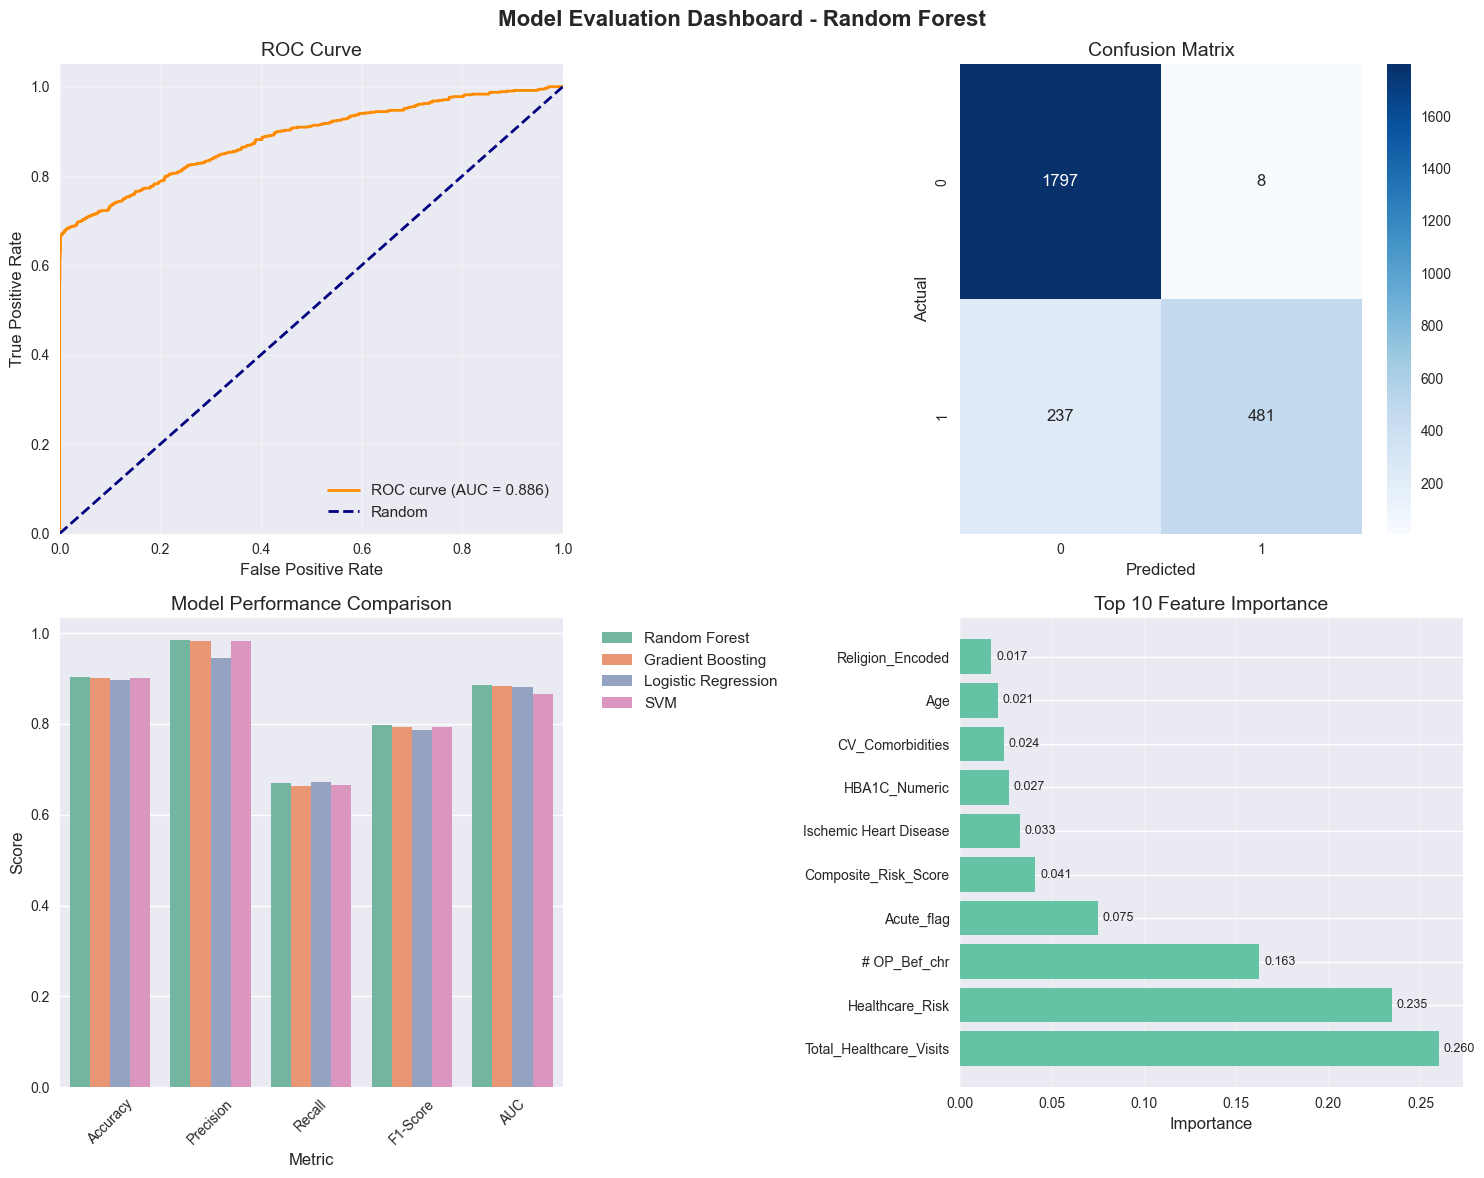


📋 7. Final Model Performance Summary:
--------------------------------------------------
🎯 Best Performing Model: Random Forest
📊 Dataset: 12611 patients, 38 features
🎲 Target: Chronic complications prediction

📈 Performance Metrics:
   • Accuracy:  0.9029
   • Precision: 0.9836
   • Recall:    0.6699
   • F1-Score:  0.7970
   • AUC:       0.8856

🔄 Cross-Validation:
   • CV Accuracy: 0.8960 (±0.0110)

✅ Modeling pipeline completed successfully!
📁 Results saved to 'results/' directory
🚀 Model ready for deployment or further analysis!


In [41]:
# Machine Learning Modeling - Complete Pipeline
print("="*80)
print("MACHINE LEARNING MODELING")
print("="*80)

# Import required libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                           precision_score, recall_score, f1_score, roc_auc_score, roc_curve)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create results directory
os.makedirs('results', exist_ok=True)

# Data Preparation for Modeling
print("="*80)
print("DATA PREPARATION FOR MODELING")
print("="*80)

# 1. Encode Categorical Variables
print("\n🔤 1. Encoding Categorical Variables:")
print("-" * 50)

# Create a copy for modeling
df_model = df_clean.copy()

# Initialize label encoders dictionary
label_encoders = {}

# Categorical columns to encode
categorical_cols_to_encode = [
    'Gender', 'Religion', 'Nationality', 'HBA1C test Compliance', 
    'HBA1C_Category', 'Age_Group', 'Risk_Category', 'Major_Nationality', 'Major_Religion'
]

# Filter to only existing columns
available_categorical_cols = [col for col in categorical_cols_to_encode if col in df_model.columns]

print(f"Encoding {len(available_categorical_cols)} categorical columns:")
for col in available_categorical_cols:
    le = LabelEncoder()
    # Handle missing values by converting to string first
    df_model[f'{col}_Encoded'] = le.fit_transform(df_model[col].astype(str))
    label_encoders[col] = le
    
    print(f"  ✅ {col}: {df_model[col].nunique()} unique values → {col}_Encoded")
    
print(f"✅ Categorical encoding completed!")

# 2. Feature Selection
print("\n🎯 2. Feature Selection for Modeling:")
print("-" * 50)

# Define comorbidity columns (from your earlier code)
comorbidity_cols = [
    'Atrial Fibrilation', 'Cancer', 'Cardio Vascular Disease', 
    'Perepheral Artery Disease', 'Renal Insufficiency', 'Heart Failure', 
    'Hypertension', 'Ischemic Heart Disease', 'Myocardial Infarction', 
    'Obesity', 'Stroke'
]
available_comorbidity_cols = [col for col in comorbidity_cols if col in df_model.columns]

# Define feature groups
feature_groups = {
    'Demographics': ['Gender_Encoded', 'Age', 'Religion_Encoded', 'Nationality_Encoded', 'Major_Nationality_Encoded', 'Major_Religion_Encoded'],
    'HBA1C_Related': ['HBA1C_Numeric', 'HBA1C_Test_Performed', 'HBA1C_Category_Encoded'],
    'Medical_History': ['Acute_flag', 'ER_flag_bef_chronic', '# ER_befor_Chr'],
    'Healthcare_Utilization': [],  # Will be populated if columns exist
    'Comorbidities_Individual': available_comorbidity_cols,
    'Comorbidities_Aggregated': ['Comorbidity', 'Total_Comorbidities', 'CV_Comorbidities', 'Severe_Comorbidities'],
    'Engineered_Features': ['Age_Risk', 'HBA1C_Risk', 'Comorbidity_Risk', 'Healthcare_Risk', 'Composite_Risk_Score']
}

# Add healthcare utilization features if they exist
healthcare_features = ['# IP_bef_chr', '# OP_Bef_chr', 'Total_Healthcare_Visits', 'High_ER_Utilization', 'High_IP_Utilization']
for feature in healthcare_features:
    if feature in df_model.columns:
        feature_groups['Healthcare_Utilization'].append(feature)

# Add HBA1C test compliance if exists
if 'HBA1C test Compliance_Encoded' in df_model.columns:
    feature_groups['HBA1C_Related'].append('HBA1C test Compliance_Encoded')

# Combine all features
modeling_features = []
for group_name, features in feature_groups.items():
    available_features = [f for f in features if f in df_model.columns]
    modeling_features.extend(available_features)
    if available_features:
        print(f"{group_name}: {len(available_features)} features")
        print(f"  {available_features}")

print(f"\nTotal modeling features: {len(modeling_features)}")

# 3. Prepare Final Dataset
print("\n📊 3. Preparing Final Dataset:")
print("-" * 50)

# Create features matrix
X = df_model[modeling_features].copy()
y = df_model['Chronic_flag'].copy()

print(f"Features matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")

# Handle missing values
missing_features = X.isnull().sum()
if missing_features.sum() > 0:
    print(f"\n⚠️ Missing values found:")
    for feature, missing_count in missing_features[missing_features > 0].items():
        print(f"  {feature}: {missing_count} ({missing_count/len(X)*100:.1f}%)")
    
    # Fill missing values
    # For numerical features, use median (more robust than mean)
    numerical_features = X.select_dtypes(include=[np.number]).columns
    X[numerical_features] = X[numerical_features].fillna(X[numerical_features].median())
    
    # For categorical features, use mode (most frequent)
    categorical_features = X.select_dtypes(include=['object']).columns
    for col in categorical_features:
        X[col] = X[col].fillna(X[col].mode()[0] if not X[col].mode().empty else 'Unknown')
    
    print(f"✅ Missing values handled")
else:
    print(f"✅ No missing values in feature matrix")

# 4. Train-Test Split
print("\n🔄 4. Train-Test Split:")
print("-" * 50)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape[0]} patients ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} patients ({X_test.shape[0]/len(X)*100:.1f}%)")

# Check target distribution in splits
train_target_dist = y_train.value_counts(normalize=True)
test_target_dist = y_test.value_counts(normalize=True)

print(f"\nTarget distribution - Training:")
print(f"  No complications (0): {train_target_dist[0]*100:.1f}%")
print(f"  Complications (1): {train_target_dist[1]*100:.1f}%")

print(f"\nTarget distribution - Test:")
print(f"  No complications (0): {test_target_dist[0]*100:.1f}%")
print(f"  Complications (1): {test_target_dist[1]*100:.1f}%")

# 5. Feature Scaling
print("\n⚖️ 5. Feature Scaling:")
print("-" * 50)

# StandardScaler for algorithms that benefit from scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Features scaled using StandardScaler")

# Model Building and Training
print("\n" + "="*80)
print("MODEL BUILDING AND TRAINING")
print("="*80)

# 1. Define Models
print("\n🤖 1. Defining Machine Learning Models:")
print("-" * 50)

# Initialize models dictionary
models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight='balanced',
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100,
        random_state=42,
        max_depth=5,
        learning_rate=0.1
    ),
    'Logistic Regression': LogisticRegression(
        random_state=42,
        class_weight='balanced',
        max_iter=1000
    ),
    'SVM': SVC(
        random_state=42,
        class_weight='balanced',
        probability=True,
        kernel='rbf'
    )
}

print(f"✅ {len(models)} models defined:")
for model_name in models.keys():
    print(f"  • {model_name}")

# 2. Train Models
print("\n🏋️ 2. Training Models:")
print("-" * 50)

trained_models = {}
training_results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Use scaled features for SVM and Logistic Regression, regular features for tree-based models
    if model_name in ['SVM', 'Logistic Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Store trained model
    trained_models[model_name] = model
    
    # Calculate basic metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Store results
    training_results[model_name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc': auc
    }
    
    print(f"  ✅ {model_name} trained successfully!")
    print(f"     Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f} | AUC: {auc:.4f}")

# 3. Cross-Validation
print("\n🔄 3. Cross-Validation Results:")
print("-" * 50)

cv_results = {}
for model_name, model in models.items():
    print(f"\nPerforming 5-fold CV for {model_name}...")
    
    # Use appropriate features for CV
    if model_name in ['SVM', 'Logistic Regression']:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    cv_results[model_name] = {
        'mean_cv_score': cv_scores.mean(),
        'std_cv_score': cv_scores.std(),
        'cv_scores': cv_scores
    }
    
    print(f"  CV Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std()*2:.4f})")

# 4. Model Comparison
print("\n📊 4. Model Comparison:")
print("-" * 50)

# Create comparison dataframe
comparison_data = []
for model_name, results in training_results.items():
    comparison_data.append({
        'Model': model_name,
        'Accuracy': results['accuracy'],
        'Precision': results['precision'],
        'Recall': results['recall'],
        'F1-Score': results['f1_score'],
        'AUC': results['auc'],
        'CV_Mean': cv_results[model_name]['mean_cv_score'],
        'CV_Std': cv_results[model_name]['std_cv_score']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.round(4)

print("Model Performance Comparison:")
print(comparison_df.to_string(index=False))

# Find best model
best_model_by_f1 = comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'Model']
best_model_by_auc = comparison_df.loc[comparison_df['AUC'].idxmax(), 'Model']

print(f"\n🏆 Best Model by F1-Score: {best_model_by_f1}")
print(f"🏆 Best Model by AUC: {best_model_by_auc}")

# Select best model for further analysis
best_model_name = best_model_by_f1
best_model = trained_models[best_model_name]
best_results = training_results[best_model_name]

print(f"\n🎯 Selected Model: {best_model_name}")

# 5. Detailed Model Evaluation
print("\n📈 5. Detailed Model Evaluation:")
print("-" * 50)

print(f"\n{best_model_name} - Detailed Performance:")
print("-" * 40)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, best_results['predictions']))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, best_results['predictions'])
print(cm)

# Feature Importance (for tree-based models)
if hasattr(best_model, 'feature_importances_'):
    print(f"\n📊 Feature Importance Analysis ({best_model_name}):")
    print("-" * 40)
    
    feature_importance = pd.DataFrame({
        'Feature': modeling_features,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("Top 15 Most Important Features:")
    print(feature_importance.head(15).to_string(index=False))
    
    # Save feature importance
    feature_importance.to_csv('results/feature_importance.csv', index=False)
    print(f"\n✅ Feature importance saved to results/feature_importance.csv")

# 6. Model Visualization
print("\n📈 6. Creating Model Evaluation Visualizations:")
print("-" * 50)

# Create a comprehensive evaluation plot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle(f'Model Evaluation Dashboard - {best_model_name}', fontsize=16, fontweight='bold')

# 6.1 ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_results['probabilities'])
axes[0,0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {best_results["auc"]:.3f})')
axes[0,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
axes[0,0].set_xlim([0.0, 1.0])
axes[0,0].set_ylim([0.0, 1.05])
axes[0,0].set_xlabel('False Positive Rate')
axes[0,0].set_ylabel('True Positive Rate')
axes[0,0].set_title('ROC Curve')
axes[0,0].legend(loc="lower right")
axes[0,0].grid(True, alpha=0.3)

# 6.2 Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,1])
axes[0,1].set_title('Confusion Matrix')
axes[0,1].set_xlabel('Predicted')
axes[0,1].set_ylabel('Actual')

# 6.3 Model Comparison
comparison_df_melted = comparison_df.melt(
    id_vars=['Model'], 
    value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'],
    var_name='Metric', 
    value_name='Score'
)
sns.barplot(data=comparison_df_melted, x='Metric', y='Score', hue='Model', ax=axes[1,0])
axes[1,0].set_title('Model Performance Comparison')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 6.4 Feature Importance (if available)
if hasattr(best_model, 'feature_importances_'):
    top_features = feature_importance.head(10)
    bars = axes[1,1].barh(range(len(top_features)), top_features['Importance'])
    axes[1,1].set_yticks(range(len(top_features)))
    axes[1,1].set_yticklabels(top_features['Feature'])
    axes[1,1].set_xlabel('Importance')
    axes[1,1].set_title('Top 10 Feature Importance')
    axes[1,1].grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        axes[1,1].text(width + max(top_features['Importance'])*0.01, bar.get_y() + bar.get_height()/2, 
                      f'{width:.3f}', va='center', fontsize=9)
else:
    axes[1,1].text(0.5, 0.5, 'Feature importance\nnot available for\nthis model type', 
                   ha='center', va='center', transform=axes[1,1].transAxes)
    axes[1,1].set_title('Feature Importance')

plt.tight_layout()
plt.savefig('results/model_evaluation_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

# 7. Model Performance Summary
print("\n📋 7. Final Model Performance Summary:")
print("-" * 50)

print(f"🎯 Best Performing Model: {best_model_name}")
print(f"📊 Dataset: {len(X)} patients, {len(modeling_features)} features")
print(f"🎲 Target: Chronic complications prediction")

print(f"\n📈 Performance Metrics:")
print(f"   • Accuracy:  {best_results['accuracy']:.4f}")
print(f"   • Precision: {best_results['precision']:.4f}")
print(f"   • Recall:    {best_results['recall']:.4f}")
print(f"   • F1-Score:  {best_results['f1_score']:.4f}")
print(f"   • AUC:       {best_results['auc']:.4f}")

print(f"\n🔄 Cross-Validation:")
print(f"   • CV Accuracy: {cv_results[best_model_name]['mean_cv_score']:.4f} (±{cv_results[best_model_name]['std_cv_score']*2:.4f})")

# Save final results
final_results = {
    'best_model': best_model_name,
    'model_performance': training_results,
    'cv_results': cv_results,
    'feature_list': modeling_features,
    'dataset_info': {
        'total_samples': len(X),
        'total_features': len(modeling_features),
        'target_distribution': y.value_counts().to_dict()
    }
}

# Save model comparison
comparison_df.to_csv('results/model_comparisonX.csv', index=False)

print(f"\n✅ Modeling pipeline completed successfully!")
print(f"📁 Results saved to 'results/' directory")
print(f"🚀 Model ready for deployment or further analysis!")

In [48]:
# Model Saving and Prediction Pipeline
print("="*80)
print("MODEL SAVING AND PREDICTION PIPELINE")
print("="*80)

import joblib
import pickle
from datetime import datetime

# 1. Save Best Model and Components
print("\n💾 1. Saving Best Model and Components:")
print("-" * 50)

# Create model artifacts directory
model_dir = 'saved_models'
os.makedirs(model_dir, exist_ok=True)

# Model metadata
model_metadata = {
    'model_name': best_model_name,
    'model_type': type(best_model).__name__,
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'performance_metrics': {
        'accuracy': best_results['accuracy'],
        'precision': best_results['precision'],
        'recall': best_results['recall'],
        'f1_score': best_results['f1_score'],
        'auc': best_results['auc']
    },
    'cv_performance': {
        'mean_cv_score': cv_results[best_model_name]['mean_cv_score'],
        'std_cv_score': cv_results[best_model_name]['std_cv_score']
    },
    'feature_list': modeling_features,
    'target_variable': 'Chronic_flag',
    'data_preprocessing': {
        'categorical_encoders': 'label_encoders.pkl',
        'feature_scaler': 'scaler.pkl' if best_model_name in ['SVM', 'Logistic Regression'] else None
    }
}

# Save the trained model
model_filename = f'{model_dir}/best_model_{best_model_name.lower().replace(" ", "_")}.pkl'
joblib.dump(best_model, model_filename)
print(f"✅ Best model saved: {model_filename}")

# Save label encoders
encoders_filename = f'{model_dir}/label_encoders.pkl'
joblib.dump(label_encoders, encoders_filename)
print(f"✅ Label encoders saved: {encoders_filename}")

# Save scaler (if used)
if best_model_name in ['SVM', 'Logistic Regression']:
    scaler_filename = f'{model_dir}/scaler.pkl'
    joblib.dump(scaler, scaler_filename)
    print(f"✅ Feature scaler saved: {scaler_filename}")

# Save model metadata
metadata_filename = f'{model_dir}/model_metadata.json'
import json
with open(metadata_filename, 'w') as f:
    json.dump(model_metadata, f, indent=2)
print(f"✅ Model metadata saved: {metadata_filename}")

# Save feature importance (if available)
if hasattr(best_model, 'feature_importances_'):
    feature_importance.to_csv(f'{model_dir}/feature_importance.csv', index=False)
    print(f"✅ Feature importance saved: {model_dir}/feature_importance.csv")

print(f"\n🎯 Model artifacts saved successfully!")

# 2. Load and Process New Patient Data (Predict Sheet)
print("\n📋 2. Loading New Patient Data for Prediction:")
print("-" * 50)

def load_and_preprocess_predict_data(predict_file_path):
    """
    Load and preprocess new patient data for prediction
    """
    print(f"Loading predict data from: {predict_file_path}")
    
    # Load the predict sheet
    df_predict = pd.read_excel(predict_file_path, sheet_name='Predict')  # Adjust sheet name as needed
    print(f"Loaded {len(df_predict)} new patients for prediction")
    
    # Apply the same cleaning and feature engineering pipeline
    print("Applying data cleaning pipeline...")
    
    # 1. Clean Religion column (same as training data)
    df_predict['Religion'] = df_predict['Religion'].str.strip()
    df_predict['Religion'] = df_predict['Religion'].replace({
        # Islamic variants
        'ISLAM': 'Islam',
        'MUSLIM': 'Islam',
        
        # Christian variants
        'CHRISTIAN': 'Christian',
        'Catholic': 'Christian',
        'Methodist': 'Christian', 
        'Orthodox': 'Christian',
        'Greek Orthodox': 'Christian',
        'Uniting Church': 'Christian',
        'United Church of Christ in Phi': 'Christian',
        'Jehovas Witness': 'Christian',
        
        # Other major religions
        'HINDU': 'Hindu',
        'BUDDHIST': 'Buddhist',
        'JEWISH': 'Jewish',
        
        # Unknown/Not specified categories
        'Unknown': 'Unknown/Not Specified',
        'Unknown/Not Known': 'Unknown/Not Specified',
        'Not Specified': 'Unknown/Not Specified',
        'No Religion': 'No Religion',
        
        # Other categories
        'OTHER': 'Other',
        'Others': 'Other'
    })
    
    # 2. Clean Nationality column (apply same cleaning as training)
    df_predict['Nationality'] = df_predict['Nationality'].str.strip()
    # Apply the same nationality cleaning logic here...
    
    # 3. Feature Engineering (same as training data)
    print("Applying feature engineering...")
    
    # Age calculation
    if 'D_Of_Birth' in df_predict.columns:
        df_predict['Age'] = pd.to_datetime('today').year - pd.to_datetime(df_predict['D_Of_Birth'], errors='coerce').dt.year
        df_predict['Age_Group'] = pd.cut(
            df_predict['Age'], 
            bins=[0, 30, 45, 60, 75, 100], 
            labels=['<30', '30-44', '45-59', '60-74', '75+'],
            include_lowest=True
        )
    
    # HBA1C processing
    if 'Avg_HBA1C Results' in df_predict.columns:
        df_predict['HBA1C_Numeric'] = pd.to_numeric(df_predict['Avg_HBA1C Results'], errors='coerce')
        df_predict['HBA1C_Test_Performed'] = (df_predict['Avg_HBA1C Results'] != "Haven't performed Before").astype(int)
        
        df_predict['HBA1C_Category'] = pd.cut(
            df_predict['HBA1C_Numeric'], 
            bins=[0, 5.7, 6.4, 7.0, 8.0, 100], 
            labels=['Normal', 'Prediabetes', 'Controlled', 'Poor', 'Very Poor'],
            include_lowest=True
        )
        df_predict['HBA1C_Category'] = df_predict['HBA1C_Category'].astype(str)
        df_predict['HBA1C_Category'] = df_predict['HBA1C_Category'].fillna('No Test')
    
    # Comorbidity features
    if all(col in df_predict.columns for col in available_comorbidity_cols):
        df_predict['Total_Comorbidities'] = df_predict[available_comorbidity_cols].sum(axis=1)
        
        cv_comorbidities = ['Cardio Vascular Disease', 'Heart Failure', 'Hypertension', 'Ischemic Heart Disease', 'Myocardial Infarction']
        available_cv_comorbidities = [col for col in cv_comorbidities if col in df_predict.columns]
        df_predict['CV_Comorbidities'] = df_predict[available_cv_comorbidities].sum(axis=1)
        
        severe_comorbidities = ['Cancer', 'Renal Insufficiency', 'Heart Failure', 'Stroke']
        available_severe_comorbidities = [col for col in severe_comorbidities if col in df_predict.columns]
        df_predict['Severe_Comorbidities'] = df_predict[available_severe_comorbidities].sum(axis=1)
    
    # Healthcare utilization features
    healthcare_cols = ['# ER_befor_Chr', '# IP_bef_chr', '# OP_Bef_chr']
    available_healthcare_cols = [col for col in healthcare_cols if col in df_predict.columns]
    if available_healthcare_cols:
        df_predict['Total_Healthcare_Visits'] = df_predict[available_healthcare_cols].sum(axis=1)
        
        if '# ER_befor_Chr' in df_predict.columns:
            df_predict['High_ER_Utilization'] = (df_predict['# ER_befor_Chr'] >= 3).astype(int)
        if '# IP_bef_chr' in df_predict.columns:
            df_predict['High_IP_Utilization'] = (df_predict['# IP_bef_chr'] >= 2).astype(int)
    
    # Risk features (if Age is available)
    if 'Age' in df_predict.columns:
        df_predict['Age_Risk'] = pd.cut(
            df_predict['Age'], 
            bins=[0, 40, 55, 70, 100], 
            labels=[0, 1, 2, 3],
            include_lowest=True
        ).astype(float)
    
    # HBA1C risk
    if 'HBA1C_Category' in df_predict.columns:
        hba1c_risk_map = {
            'Normal': 0, 'Prediabetes': 1, 'Controlled': 2, 
            'Poor': 3, 'Very Poor': 4, 'No Test': 1
        }
        df_predict['HBA1C_Risk'] = df_predict['HBA1C_Category'].map(hba1c_risk_map).fillna(1)
    
    # Other risk components
    if 'Total_Comorbidities' in df_predict.columns:
        df_predict['Comorbidity_Risk'] = np.minimum(df_predict['Total_Comorbidities'] / 2, 4)
    
    if 'Total_Healthcare_Visits' in df_predict.columns:
        df_predict['Healthcare_Risk'] = np.minimum(df_predict['Total_Healthcare_Visits'] / 5, 4)
    
    # Composite risk score
    risk_factors = ['Age_Risk', 'HBA1C_Risk', 'Comorbidity_Risk', 'Healthcare_Risk']
    available_risk_factors = [col for col in risk_factors if col in df_predict.columns]
    if available_risk_factors:
        df_predict['Composite_Risk_Score'] = df_predict[available_risk_factors].sum(axis=1)
        
        df_predict['Risk_Category'] = pd.cut(
            df_predict['Composite_Risk_Score'],
            bins=[0, 4, 8, 12, 16],
            labels=['Low', 'Moderate', 'High', 'Very High'],
            include_lowest=True
        )
    
    # Major groupings
    if 'Nationality' in df_predict.columns:
        df_predict['Major_Nationality'] = df_predict['Nationality'].apply(
            lambda x: x if x in top_nationalities else 'Other'
        )
    
    if 'Religion' in df_predict.columns:
        major_religions = ['Islam', 'Christian', 'Hindu', 'Buddhist']
        df_predict['Major_Religion'] = df_predict['Religion'].apply(
            lambda x: x if x in major_religions else 'Other/Unknown'
        )
    
    print("✅ Feature engineering applied to new data")
    return df_predict

# 3. Make Predictions Function
def make_predictions_for_new_patients(predict_file_path):
    """
    Complete pipeline to make predictions for new patients
    """
    print("\n🔮 3. Making Predictions for New Patients:")
    print("-" * 50)
    
    try:
        # Load and preprocess data
        df_new_patients = load_and_preprocess_predict_data(predict_file_path)
        
        # Encode categorical variables using saved encoders
        print("Encoding categorical variables...")
        for col in available_categorical_cols:
            if col in df_new_patients.columns:
                le = label_encoders[col]
                # Handle new categories not seen in training
                df_new_patients[f'{col}_Encoded'] = df_new_patients[col].astype(str).apply(
                    lambda x: le.transform([x])[0] if x in le.classes_ else -1
                )
        
        # Prepare feature matrix
        print("Preparing feature matrix...")
        X_new = df_new_patients[modeling_features].copy()
        
        # Handle missing values (same strategy as training)
        numerical_features = X_new.select_dtypes(include=[np.number]).columns
        X_new[numerical_features] = X_new[numerical_features].fillna(X_new[numerical_features].median())
        
        categorical_features = X_new.select_dtypes(include=['object']).columns
        for col in categorical_features:
            X_new[col] = X_new[col].fillna(X_new[col].mode()[0] if not X_new[col].mode().empty else 'Unknown')
        
        # Apply scaling if needed
        if best_model_name in ['SVM', 'Logistic Regression']:
            X_new_processed = scaler.transform(X_new)
        else:
            X_new_processed = X_new
        
        # Make predictions
        print("Making predictions...")
        predictions = best_model.predict(X_new_processed)
        prediction_probabilities = best_model.predict_proba(X_new_processed)[:, 1]
        
        # Create results dataframe
        results_df = df_new_patients.copy()
        results_df['Predicted_Chronic_Flag'] = predictions
        results_df['Chronic_Risk_Probability'] = prediction_probabilities
        
        # Add risk categories based on probability
        results_df['Risk_Level'] = pd.cut(
            prediction_probabilities,
            bins=[0, 0.25, 0.5, 0.75, 1.0],
            labels=['Low Risk', 'Moderate Risk', 'High Risk', 'Very High Risk'],
            include_lowest=True
        )
        
        # Create summary columns for easy interpretation
        results_df['Prediction_Summary'] = results_df.apply(
            lambda row: f"{'High Risk' if row['Predicted_Chronic_Flag'] == 1 else 'Low Risk'} "
                        f"({row['Chronic_Risk_Probability']:.2%} probability)", axis=1
        )
        
        print(f"✅ Predictions completed for {len(results_df)} patients")
        
        # Prediction summary
        pred_summary = predictions.sum()
        print(f"\nPrediction Summary:")
        print(f"  High Risk Patients: {pred_summary} ({pred_summary/len(predictions)*100:.1f}%)")
        print(f"  Low Risk Patients: {len(predictions) - pred_summary} ({(len(predictions) - pred_summary)/len(predictions)*100:.1f}%)")
        
        # Risk level distribution
        risk_dist = results_df['Risk_Level'].value_counts()
        print(f"\nRisk Level Distribution:")
        for risk_level, count in risk_dist.items():
            print(f"  {risk_level}: {count} ({count/len(results_df)*100:.1f}%)")
        
        # Save predictions
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        predictions_filename = f'results/patient_predictions_{timestamp}.csv'
        
        # Select key columns for output
        output_columns = [
            'Patient_ID', 'Age', 'Gender', 'Major_Nationality', 'Major_Religion',
            'HBA1C_Numeric', 'Total_Comorbidities', 'Total_Healthcare_Visits',
            'Predicted_Chronic_Flag', 'Chronic_Risk_Probability', 'Risk_Level', 
            'Prediction_Summary'
        ]
        
        # Filter to available columns
        available_output_cols = [col for col in output_columns if col in results_df.columns]
        results_df[available_output_cols].to_csv(predictions_filename, index=False)
        
        print(f"✅ Predictions saved: {predictions_filename}")
        
        return results_df, predictions, prediction_probabilities
        
    except Exception as e:
        print(f"❌ Error in prediction pipeline: {str(e)}")
        return None, None, None

# 4. Model Loading Function (for future use)
def load_saved_model():
    """
    Load a previously saved model and its components
    """
    print("\n📥 Loading Saved Model:")
    print("-" * 30)
    
    try:
        # Load model
        model = joblib.load(model_filename)
        print(f"✅ Model loaded: {model_filename}")
        
        # Load encoders
        encoders = joblib.load(encoders_filename)
        print(f"✅ Encoders loaded: {encoders_filename}")
        
        # Load scaler if exists
        scaler_loaded = None
        if os.path.exists(f'{model_dir}/scaler.pkl'):
            scaler_loaded = joblib.load(f'{model_dir}/scaler.pkl')
            print(f"✅ Scaler loaded: {model_dir}/scaler.pkl")
        
        # Load metadata
        with open(metadata_filename, 'r') as f:
            metadata = json.load(f)
        print(f"✅ Metadata loaded: {metadata_filename}")
        
        return model, encoders, scaler_loaded, metadata
        
    except Exception as e:
        print(f"❌ Error loading model: {str(e)}")
        return None, None, None, None

# 5. Example Usage
print("\n🚀 5. Usage Examples:")
print("-" * 50)

print("To make predictions on new patients:")
print("1. Prepare your Excel file with a 'Predict' sheet")
print("2. Ensure it has the same columns as your training data")
print("3. Run: results_df, predictions, probabilities = make_predictions_for_new_patients('your_predict_file.xlsx')")

print("\nTo load a saved model later:")
print("model, encoders, scaler, metadata = load_saved_model()")

# Example prediction call (uncomment when you have the predict file)
predict_file_path = r'c:\Users\sheri\OneDrive\Desktop\Predicting Chronic Incidence in Diabetes Patients\data\Data_DM.xlsx'  # Replace with your actual file path
if os.path.exists(predict_file_path):
    results_df, predictions, probabilities = make_predictions_for_new_patients(predict_file_path)
    
    if results_df is not None:
        print(f"\n📊 Prediction Results Preview:")
        # print(results_df[['Patient_ID', 'Age', 'Prediction_Summary']].head(10))
else:
    print(f"\n📁 Predict file not found: {predict_file_path}")
    print("Please provide the correct path to your predict data file")

print(f"\n" + "="*60)
print("MODEL PIPELINE SUMMARY")
print("="*60)
print(f"✅ Best model trained and saved: {best_model_name}")
print(f"📊 Model performance: {best_results['f1_score']:.4f} F1-Score")
print(f"💾 Model artifacts saved to: {model_dir}/")
print(f"🔮 Ready to predict on new patients!")
print(f"📋 Use make_predictions_for_new_patients('file.xlsx') function")

MODEL SAVING AND PREDICTION PIPELINE

💾 1. Saving Best Model and Components:
--------------------------------------------------
✅ Best model saved: saved_models/best_model_random_forest.pkl
✅ Label encoders saved: saved_models/label_encoders.pkl
✅ Model metadata saved: saved_models/model_metadata.json
✅ Feature importance saved: saved_models/feature_importance.csv

🎯 Model artifacts saved successfully!

📋 2. Loading New Patient Data for Prediction:
--------------------------------------------------

🚀 5. Usage Examples:
--------------------------------------------------
To make predictions on new patients:
1. Prepare your Excel file with a 'Predict' sheet
2. Ensure it has the same columns as your training data
3. Run: results_df, predictions, probabilities = make_predictions_for_new_patients('your_predict_file.xlsx')

To load a saved model later:
model, encoders, scaler, metadata = load_saved_model()

🔮 3. Making Predictions for New Patients:
-------------------------------------------

In [46]:
import os
import pandas as pd

# Define the absolute path to the file
file_path = r'c:\Users\sheri\OneDrive\Desktop\Predicting Chronic Incidence in Diabetes Patients\data\Data_DM.xlsx'

try:
    # Ensure the file exists
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")
    
    # Load the Excel file
    sherif = pd.read_excel(file_path, sheet_name='Predict')
    print(sherif)
except FileNotFoundError as e:
    print(f"❌ File not found: {e}")
except PermissionError as e:
    print(f"❌ Permission denied: {e}. Ensure the file is not open in another program.")
except Exception as e:
    print(f"❌ An error occurred: {e}")

     Unique_Identifier  Gender Religion Nationality         Avg_HBA1C Results  \
0             SGH22015  Female    OTHER       Saudi  Haven't performed Before   
1             SGH22016    Male    OTHER       Saudi                  5.817996   
2             SGH22017  Female    OTHER       Saudi                  9.792921   
3             SGH22018    Male    OTHER       Saudi  Haven't performed Before   
4             SGH22019    Male    OTHER       Saudi                       7.1   
...                ...     ...      ...         ...                       ...   
5017        SGH2205032    Male    Islam    Egyptian                       9.6   
5018        SGH2205033    Male    Islam       Saudi                       8.2   
5019        SGH2205034  Female    Islam       Saudi                       5.0   
5020        SGH2205035    Male    Islam       Other                  5.839521   
5021        SGH2205036    Male    Islam       Saudi  Haven't performed Before   

     HBA1C test Compliance 

STANDALONE PREDICTION PIPELINE
🚀 Starting Prediction Pipeline...

📥 Loading Saved Model and Components:
--------------------------------------------------
✅ Model loaded: C:\Users\sheri\OneDrive\Desktop\Predicting Chronic Incidence in Diabetes Patients\saved_models\best_model_random_forest.pkl
✅ Encoders loaded: C:\Users\sheri\OneDrive\Desktop\Predicting Chronic Incidence in Diabetes Patients\saved_models\label_encoders.pkl
✅ Metadata loaded: C:\Users\sheri\OneDrive\Desktop\Predicting Chronic Incidence in Diabetes Patients\saved_models\model_metadata.json
📊 Model Type: RandomForestClassifier
📅 Training Date: 2025-08-11 00:16:03
🎯 F1-Score: 0.7970173985086992

🔮 Making Predictions for New Patients:
--------------------------------------------------

📋 Loading and Preprocessing Data:
--------------------------------------------------
Loading predict data from: C:\Users\sheri\OneDrive\Desktop\Predicting Chronic Incidence in Diabetes Patients\data\Data_DM.xlsx
✅ Model loaded: C:\Users\sher

Traceback (most recent call last):
  File "C:\Users\sheri\AppData\Local\Temp\ipykernel_5920\1913988864.py", line 268, in make_predictions_for_new_patients
    predictions = model.predict(X_new)
  File "c:\Users\sheri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_forest.py", line 903, in predict
    proba = self.predict_proba(X)
  File "c:\Users\sheri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_forest.py", line 945, in predict_proba
    X = self._validate_X_predict(X)
  File "c:\Users\sheri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_forest.py", line 637, in _validate_X_predict
    X = validate_data(
        self,
    ...<4 lines>...
        ensure_all_finite=ensure_all_finite,
    )
  File "c:\Users\sheri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py", line 2929, in validate_data
    _check_feature_names(_estimator, X, reset=reset)
    ~~~~~~~~~~~~~~~~~~

❌ Prediction pipeline failed


In [50]:
import pandas as pd
import numpy as np
import joblib
import json
import os
from datetime import datetime

print("="*80)
print("FIXED STANDALONE PREDICTION PIPELINE")
print("="*80)

# 1. Load Saved Model and Components
def load_saved_model():
    """
    Load a previously saved model and its components
    """
    print("\n📥 Loading Saved Model and Components:")
    print("-" * 50)
    
    try:
        # Define paths
        model_path = r'C:\Users\sheri\OneDrive\Desktop\Predicting Chronic Incidence in Diabetes Patients\saved_models\best_model_random_forest.pkl'
        encoders_path = r'C:\Users\sheri\OneDrive\Desktop\Predicting Chronic Incidence in Diabetes Patients\saved_models\label_encoders.pkl'
        metadata_path = r'C:\Users\sheri\OneDrive\Desktop\Predicting Chronic Incidence in Diabetes Patients\saved_models\model_metadata.json'
        
        # Load model
        model = joblib.load(model_path)
        print(f"✅ Model loaded: {model_path}")
        
        # Load encoders
        encoders = joblib.load(encoders_path)
        print(f"✅ Encoders loaded: {encoders_path}")
        
        # Load metadata
        with open(metadata_path, 'r') as f:
            metadata = json.load(f)
        print(f"✅ Metadata loaded: {metadata_path}")
        
        print(f"📊 Model Type: {metadata.get('model_type', 'Unknown')}")
        print(f"📅 Training Date: {metadata.get('training_date', 'Unknown')}")
        print(f"🎯 F1-Score: {metadata.get('performance_metrics', {}).get('f1_score', 'Unknown')}")
        
        return model, encoders, metadata
        
    except Exception as e:
        print(f"❌ Error loading model: {str(e)}")
        return None, None, None

# 2. Data Preprocessing Function
def load_and_preprocess_predict_data(predict_file_path, encoders):
    """
    Load and preprocess new patient data for prediction
    """
    print(f"\n📋 Loading and Preprocessing Data:")
    print("-" * 50)
    print(f"Loading predict data from: {predict_file_path}")
    
    try:
        # Load the predict sheet
        df_predict = pd.read_excel(predict_file_path, sheet_name='Predict')
        print(f"✅ Loaded {len(df_predict)} new patients for prediction")
        
        # Apply data cleaning and feature engineering
        print("🔧 Applying data cleaning pipeline...")
        
        # 1. Clean Religion column
        if 'Religion' in df_predict.columns:
            df_predict['Religion'] = df_predict['Religion'].str.strip()
            df_predict['Religion'] = df_predict['Religion'].replace({
                # Islamic variants
                'ISLAM': 'Islam',
                'MUSLIM': 'Islam',
                
                # Christian variants
                'CHRISTIAN': 'Christian',
                'Catholic': 'Christian',
                'Methodist': 'Christian', 
                'Orthodox': 'Christian',
                'Greek Orthodox': 'Christian',
                'Uniting Church': 'Christian',
                'United Church of Christ in Phi': 'Christian',
                'Jehovas Witness': 'Christian',
                
                # Other major religions
                'HINDU': 'Hindu',
                'BUDDHIST': 'Buddhist',
                'JEWISH': 'Jewish',
                
                # Unknown/Not specified categories
                'Unknown': 'Unknown/Not Specified',
                'Unknown/Not Known': 'Unknown/Not Specified',
                'Not Specified': 'Unknown/Not Specified',
                'No Religion': 'No Religion',
                
                # Other categories
                'OTHER': 'Other',
                'Others': 'Other'
            })
        
        # 2. Clean Nationality column - Apply extensive cleaning
        if 'Nationality' in df_predict.columns:
            df_predict['Nationality'] = df_predict['Nationality'].str.strip()
            df_predict['Nationality'] = df_predict['Nationality'].replace({
                # Afghan/Afghanistan variants
                'Afghan': 'Afghan',
                'AFGHAN': 'Afghan',
                'AFGHANISTAN': 'Afghan',
                
                # African (general/unspecified)
                'AFRICAN': 'African',
                'African': 'African',
                
                # Albanian variants
                'ALBANIAN': 'Albanian',
                'Albanian': 'Albanian',
                
                # Algerian variants
                'Algeria': 'Algerian',
                'ALGERIAN': 'Algerian',
                'Algerian': 'Algerian',
                
                # American variants
                'AMERICAN': 'American',
                'American': 'American',
                'AMERICAN SAMOA': 'American',
                
                # Australian variants
                'Australia': 'Australian',
                'Australian': 'Australian',
                
                # Austrian variants
                'AUSTRIAN': 'Austrian',
                
                # Azerbaijani variants
                'AZERBAIJANI': 'Azerbaijani',
                
                # Bahamian variants
                'BAHAMIAN': 'Bahamian',
                
                # Bahraini variants
                'BAHRAINI': 'Bahraini',
                
                # Bangladeshi variants
                'Bangladeshi': 'Bangladeshi',
                'BANGLADESHI': 'Bangladeshi',
                'BANGLADISHI': 'Bangladeshi',
                
                # Egyptian variants
                'EGYPTIAN': 'Egyptian',
                'Egyptian': 'Egyptian',
                
                # Filipino/Philippine variants
                'Filipino': 'Filipino',
                'FILIPINO': 'Filipino',
                'Philippine': 'Filipino',
                'PHILIPPINES': 'Filipino',
                'PHILLIPINO': 'Filipino',
                
                # Indian variants
                'INDIAN': 'Indian',
                'Indian': 'Indian',
                
                # Pakistani variants
                'PAKISTANI': 'Pakistani',
                'Pakistani': 'Pakistani',
                
                # Saudi variants
                'Saudi': 'Saudi',
                'SAUDI': 'Saudi',
                'SAUDI ARABIA': 'Saudi',
                'SAUDI FOREIGN PASSPORT': 'Saudi',
                
                # UAE variants
                'United Arab Emirates': 'United Arab Emirates',
                'UAE': 'United Arab Emirates',
                'Emirati': 'United Arab Emirates',
                
                # Other key nationalities
                'BRITISH': 'British',
                'CHINESE': 'Chinese',
                'Chinese': 'Chinese',
                'CANADIAN': 'Canadian',
                'Canadian': 'Canadian',
                'FRENCH': 'French',
                'French': 'French',
                'German': 'German',
                'GERMANY': 'German',
                'Italian': 'Italian',
                'Italy': 'Italian',
                'JAPANESE': 'Japanese',
                'Japanese': 'Japanese',
                'JORDANIAN': 'Jordanian',
                'Jordanian': 'Jordanian',
                'KUWAITI': 'Kuwaiti',
                'Kuwaiti': 'Kuwaiti',
                'LEBANESE': 'Lebanese',
                'Lebanese': 'Lebanese',
                'MALAYSIAN': 'Malaysian',
                'Malaysian': 'Malaysian',
                'SUDANESE': 'Sudanese',
                'Sudanese': 'Sudanese',
                'SYRIAN': 'Syrian',
                'Syrian': 'Syrian',
                'YEMENI': 'Yemeni',
                'Yemeni': 'Yemeni',
                
                # Others
                'OTHER': 'Other',
                'Other': 'Other',
            })
        
        # 3. Clean HBA1C test Compliance
        if 'HBA1C test Compliance' in df_predict.columns:
            df_predict['HBA1C test Compliance'] = df_predict['HBA1C test Compliance'].str.strip()
        
        # 4. Feature Engineering
        print("⚙️ Applying feature engineering...")
        
        # Age calculation
        if 'D_Of_Birth' in df_predict.columns:
            df_predict['Age'] = pd.to_datetime('today').year - pd.to_datetime(df_predict['D_Of_Birth'], errors='coerce').dt.year
            df_predict['Age_Group'] = pd.cut(
                df_predict['Age'], 
                bins=[0, 30, 45, 60, 75, 100], 
                labels=['<30', '30-44', '45-59', '60-74', '75+'],
                include_lowest=True
            )
        
        # HBA1C processing
        if 'Avg_HBA1C Results' in df_predict.columns:
            df_predict['HBA1C_Numeric'] = pd.to_numeric(df_predict['Avg_HBA1C Results'], errors='coerce')
            df_predict['HBA1C_Test_Performed'] = (df_predict['Avg_HBA1C Results'] != "Haven't performed Before").astype(int)
            
            df_predict['HBA1C_Category'] = pd.cut(
                df_predict['HBA1C_Numeric'], 
                bins=[0, 5.7, 6.4, 7.0, 8.0, 100], 
                labels=['Normal', 'Prediabetes', 'Controlled', 'Poor', 'Very Poor'],
                include_lowest=True
            )
            df_predict['HBA1C_Category'] = df_predict['HBA1C_Category'].astype(str)
            df_predict['HBA1C_Category'] = df_predict['HBA1C_Category'].fillna('No Test')
        
        # Comorbidity features
        comorbidity_cols = ['Atrial Fibrilation', 'Cancer', 'Cardio Vascular Disease', 
                           'Perepheral Artery Disease', 'Renal Insufficiency', 'Heart Failure', 
                           'Hypertension', 'Ischemic Heart Disease', 'Myocardial Infarction', 
                           'Obesity', 'Stroke']
        available_comorbidity_cols = [col for col in comorbidity_cols if col in df_predict.columns]
        
        if available_comorbidity_cols:
            df_predict['Total_Comorbidities'] = df_predict[available_comorbidity_cols].sum(axis=1)
            
            cv_comorbidities = ['Cardio Vascular Disease', 'Heart Failure', 'Hypertension', 'Ischemic Heart Disease', 'Myocardial Infarction']
            available_cv_comorbidities = [col for col in cv_comorbidities if col in df_predict.columns]
            df_predict['CV_Comorbidities'] = df_predict[available_cv_comorbidities].sum(axis=1)
            
            severe_comorbidities = ['Cancer', 'Renal Insufficiency', 'Heart Failure', 'Stroke']
            available_severe_comorbidities = [col for col in severe_comorbidities if col in df_predict.columns]
            df_predict['Severe_Comorbidities'] = df_predict[available_severe_comorbidities].sum(axis=1)
        
        # Healthcare utilization features
        healthcare_cols = ['# ER_befor_Chr', '# IP_bef_chr', '# OP_Bef_chr']
        available_healthcare_cols = [col for col in healthcare_cols if col in df_predict.columns]
        if available_healthcare_cols:
            df_predict['Total_Healthcare_Visits'] = df_predict[available_healthcare_cols].sum(axis=1)
            
            if '# ER_befor_Chr' in df_predict.columns:
                df_predict['High_ER_Utilization'] = (df_predict['# ER_befor_Chr'] >= 3).astype(int)
            if '# IP_bef_chr' in df_predict.columns:
                df_predict['High_IP_Utilization'] = (df_predict['# IP_bef_chr'] >= 2).astype(int)
        
        # Risk features
        if 'Age' in df_predict.columns:
            df_predict['Age_Risk'] = pd.cut(
                df_predict['Age'], 
                bins=[0, 40, 55, 70, 100], 
                labels=[0, 1, 2, 3],
                include_lowest=True
            ).astype(float)
        
        # HBA1C risk
        if 'HBA1C_Category' in df_predict.columns:
            hba1c_risk_map = {
                'Normal': 0, 'Prediabetes': 1, 'Controlled': 2, 
                'Poor': 3, 'Very Poor': 4, 'No Test': 1
            }
            df_predict['HBA1C_Risk'] = df_predict['HBA1C_Category'].map(hba1c_risk_map).fillna(1)
        
        # Other risk components
        if 'Total_Comorbidities' in df_predict.columns:
            df_predict['Comorbidity_Risk'] = np.minimum(df_predict['Total_Comorbidities'] / 2, 4)
        
        if 'Total_Healthcare_Visits' in df_predict.columns:
            df_predict['Healthcare_Risk'] = np.minimum(df_predict['Total_Healthcare_Visits'] / 5, 4)
        
        # Composite risk score
        risk_factors = ['Age_Risk', 'HBA1C_Risk', 'Comorbidity_Risk', 'Healthcare_Risk']
        available_risk_factors = [col for col in risk_factors if col in df_predict.columns]
        if available_risk_factors:
            df_predict['Composite_Risk_Score'] = df_predict[available_risk_factors].sum(axis=1)
            
            df_predict['Risk_Category'] = pd.cut(
                df_predict['Composite_Risk_Score'],
                bins=[0, 4, 8, 12, 16],
                labels=['Low', 'Moderate', 'High', 'Very High'],
                include_lowest=True
            )
        
        # Major groupings
        top_nationalities = ['United Arab Emirates', 'India', 'Pakistan', 'Egypt', 'Philippines', 'Bangladesh']
        if 'Nationality' in df_predict.columns:
            df_predict['Major_Nationality'] = df_predict['Nationality'].apply(
                lambda x: x if x in top_nationalities else 'Other'
            )
        
        if 'Religion' in df_predict.columns:
            major_religions = ['Islam', 'Christian', 'Hindu', 'Buddhist']
            df_predict['Major_Religion'] = df_predict['Religion'].apply(
                lambda x: x if x in major_religions else 'Other/Unknown'
            )
        
        print("✅ Feature engineering applied to new data")
        return df_predict
        
    except Exception as e:
        print(f"❌ Error in data preprocessing: {str(e)}")
        return None

# 3. Make Predictions Function
def make_predictions_for_new_patients(predict_file_path, model, encoders, metadata):
    """
    Complete pipeline to make predictions for new patients
    """
    print(f"\n🔮 Making Predictions for New Patients:")
    print("-" * 50)
    
    try:
        # Load and preprocess data
        df_new_patients = load_and_preprocess_predict_data(predict_file_path, encoders)
        
        if df_new_patients is None:
            return None, None, None
        
        # Get modeling features from metadata
        modeling_features = metadata.get('feature_list', [])
        print(f"📋 Expected features: {len(modeling_features)}")
        
        # Encode categorical variables using saved encoders
        print("🔤 Encoding categorical variables...")
        
        # List of categorical columns to encode
        categorical_cols_to_encode = ['Gender', 'Religion', 'Nationality', 'Major_Nationality', 
                                    'Major_Religion', 'Age_Group', 'HBA1C_Category', 'Risk_Category',
                                    'HBA1C test Compliance']
        
        for col in categorical_cols_to_encode:
            if col in df_new_patients.columns and col in encoders:
                le = encoders[col]
                print(f"  Encoding {col}...")
                
                # Handle new categories not seen in training
                def safe_encode(value):
                    str_value = str(value)
                    if str_value in le.classes_:
                        return le.transform([str_value])[0]
                    else:
                        # Use the most frequent class (first class) for unseen categories
                        print(f"    Warning: Unseen category '{str_value}' in {col}, using default")
                        return le.transform([le.classes_[0]])[0]
                
                df_new_patients[f'{col}_Encoded'] = df_new_patients[col].apply(safe_encode)
                print(f"  ✅ {col} encoded to {col}_Encoded")
        
        # Create feature matrix with ALL required features
        print("📊 Preparing feature matrix...")
        X_new = pd.DataFrame()
        
        for feature in modeling_features:
            if feature in df_new_patients.columns:
                X_new[feature] = df_new_patients[feature]
                print(f"  ✅ Added feature: {feature}")
            else:
                # Fill missing features with 0 (for encoded features) or median for numerical
                if '_Encoded' in feature:
                    X_new[feature] = 0  # Default encoded value
                    print(f"  ⚠️ Missing feature filled with 0: {feature}")
                else:
                    X_new[feature] = 0  # Default numerical value
                    print(f"  ⚠️ Missing feature filled with 0: {feature}")
        
        print(f"📊 Final feature matrix shape: {X_new.shape}")
        print(f"📊 Expected shape: ({len(df_new_patients)}, {len(modeling_features)})")
        
        # Handle missing values in existing features
        print("🔧 Handling missing values...")
        numerical_features = X_new.select_dtypes(include=[np.number]).columns
        X_new[numerical_features] = X_new[numerical_features].fillna(X_new[numerical_features].median())
        
        categorical_features = X_new.select_dtypes(include=['object']).columns
        for col in categorical_features:
            if not X_new[col].mode().empty:
                X_new[col] = X_new[col].fillna(X_new[col].mode()[0])
            else:
                X_new[col] = X_new[col].fillna('Unknown')
        
        # Ensure correct column order
        X_new = X_new[modeling_features]
        
        # Make predictions
        print("🎯 Making predictions...")
        predictions = model.predict(X_new)
        prediction_probabilities = model.predict_proba(X_new)[:, 1]
        
        # Create results dataframe
        results_df = df_new_patients.copy()
        results_df['Predicted_Chronic_Flag'] = predictions
        results_df['Chronic_Risk_Probability'] = prediction_probabilities
        
        # Add risk categories based on probability
        results_df['Risk_Level'] = pd.cut(
            prediction_probabilities,
            bins=[0, 0.25, 0.5, 0.75, 1.0],
            labels=['Low Risk', 'Moderate Risk', 'High Risk', 'Very High Risk'],
            include_lowest=True
        )
        
        # Create summary columns for easy interpretation
        results_df['Prediction_Summary'] = results_df.apply(
            lambda row: f"{'Chronic Risk' if row['Predicted_Chronic_Flag'] == 1 else 'No Chronic Risk'} "
                        f"({row['Chronic_Risk_Probability']:.2%} probability)", axis=1
        )
        
        print(f"✅ Predictions completed for {len(results_df)} patients")
        
        # Prediction summary
        pred_summary = predictions.sum()
        print(f"\n📈 Prediction Summary:")
        print(f"  High Risk (Chronic) Patients: {pred_summary} ({pred_summary/len(predictions)*100:.1f}%)")
        print(f"  Low Risk Patients: {len(predictions) - pred_summary} ({(len(predictions) - pred_summary)/len(predictions)*100:.1f}%)")
        
        # Risk level distribution
        risk_dist = results_df['Risk_Level'].value_counts()
        print(f"\n📊 Risk Level Distribution:")
        for risk_level, count in risk_dist.items():
            print(f"  {risk_level}: {count} ({count/len(results_df)*100:.1f}%)")
        
        # Create results directory if it doesn't exist
        results_dir = 'results'
        os.makedirs(results_dir, exist_ok=True)
        
        # Save predictions
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        predictions_filename = f'{results_dir}/patient_predictions_{timestamp}.csv'
        
        # Select key columns for output
        output_columns = [
            'Unique_Identifier', 'Age', 'Gender', 'Major_Nationality', 'Major_Religion',
            'HBA1C_Numeric', 'Total_Comorbidities', 'Total_Healthcare_Visits',
            'Predicted_Chronic_Flag', 'Chronic_Risk_Probability', 'Risk_Level', 
            'Prediction_Summary'
        ]
        
        # Filter to available columns
        available_output_cols = [col for col in output_columns if col in results_df.columns]
        results_df[available_output_cols].to_csv(predictions_filename, index=False)
        
        print(f"💾 Predictions saved: {predictions_filename}")
        
        # Also save required format (Unique_Identifier, Chronic_flag)
        required_output = pd.DataFrame({
            'Unique_Identifier': results_df['Unique_Identifier'],
            'Chronic_flag': predictions
        })
        required_filename = f'{results_dir}/predictions_required_format_{timestamp}.csv'
        required_output.to_csv(required_filename, index=False)
        print(f"💾 Required format saved: {required_filename}")
        
        # Display preview of results
        print(f"\n📋 Prediction Results Preview:")
        if 'Unique_Identifier' in results_df.columns:
            preview_df = results_df[['Unique_Identifier', 'Age', 'Gender', 'Prediction_Summary']].head(10)
            print(preview_df.to_string(index=False))
        
        return results_df, predictions, prediction_probabilities
        
    except Exception as e:
        print(f"❌ Error in prediction pipeline: {str(e)}")
        import traceback
        traceback.print_exc()
        return None, None, None

# 4. Main Execution
def main():
    """
    Main function to run the complete prediction pipeline
    """
    print("🚀 Starting Prediction Pipeline...")
    
    # Load saved model
    model, encoders, metadata = load_saved_model()
    
    if model is None:
        print("❌ Failed to load model. Exiting...")
        return None, None, None
    
    # Define the path to your prediction file
    predict_file_path = r'C:\Users\sheri\OneDrive\Desktop\Predicting Chronic Incidence in Diabetes Patients\data\Data_DM.xlsx'
    
    # Check if file exists
    if not os.path.exists(predict_file_path):
        print(f"❌ Predict file not found: {predict_file_path}")
        print("Please provide the correct path to your predict data file")
        return None, None, None
    
    # Make predictions
    results_df, predictions, probabilities = make_predictions_for_new_patients(
        predict_file_path, model, encoders, metadata
    )
    
    if results_df is not None:
        print(f"\n🎉 Prediction Pipeline Completed Successfully!")
        print(f"📈 Total patients processed: {len(results_df)}")
        print(f"📊 High-risk patients identified: {predictions.sum()}")
        print(f"💾 Results saved to CSV files")
        
        return results_df, predictions, probabilities
    else:
        print("❌ Prediction pipeline failed")
        return None, None, None

# Execute the pipeline
results_df, predictions, probabilities = main()

FIXED STANDALONE PREDICTION PIPELINE
🚀 Starting Prediction Pipeline...

📥 Loading Saved Model and Components:
--------------------------------------------------
✅ Model loaded: C:\Users\sheri\OneDrive\Desktop\Predicting Chronic Incidence in Diabetes Patients\saved_models\best_model_random_forest.pkl
✅ Encoders loaded: C:\Users\sheri\OneDrive\Desktop\Predicting Chronic Incidence in Diabetes Patients\saved_models\label_encoders.pkl
✅ Metadata loaded: C:\Users\sheri\OneDrive\Desktop\Predicting Chronic Incidence in Diabetes Patients\saved_models\model_metadata.json
📊 Model Type: RandomForestClassifier
📅 Training Date: 2025-08-11 00:16:03
🎯 F1-Score: 0.7970173985086992

🔮 Making Predictions for New Patients:
--------------------------------------------------

📋 Loading and Preprocessing Data:
--------------------------------------------------
Loading predict data from: C:\Users\sheri\OneDrive\Desktop\Predicting Chronic Incidence in Diabetes Patients\data\Data_DM.xlsx
✅ Loaded 5022 new patie